In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pylab import mpl
import re

# 使matplotlib模块能显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

   Unnamed: 0    公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求    薪资水平  \
0           0    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  30-60K   
1           1    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  25-50K   
2           2  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  18-30K   
3           3      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  25-35K   
4           4    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  22-44K   

          工作地点  
0  深圳 宝安区 宝安中心  
1    深圳 福田区 梅林  
2    深圳 罗湖区 国贸  
3   深圳 南山区 科技园  
4  深圳 宝安区 宝安中心  


In [26]:
data_all.drop('Unnamed: 0',axis=1,inplace=True)


融资情况分析

In [27]:
#看看获得得原始数据结构
data_all.loc[:5,]

公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求    薪资水平         工作地点
0    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  30-60K  深圳 宝安区 宝安中心
1    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  25-50K    深圳 福田区 梅林
2  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  18-30K    深圳 罗湖区 国贸
3      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  25-35K   深圳 南山区 科技园
4    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  22-44K  深圳 宝安区 宝安中心
5    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  15-25K    深圳 福田区 梅林

In [28]:
data_all['薪资水平']=data_all['薪资水平'].str.extract(r'(.*)K')
data_all.insert(8,'薪资下限',data_all['薪资水平'].str.extract(r'(.*)-'))
data_all.insert(8,'薪资上限',data_all['薪资水平'].str.extract(r'-(.*)'))
print(data_all.info())
data_all['薪资上限']= data_all['薪资上限'].astype('float')
data_all['薪资下限']= data_all['薪资下限'].astype('float')
data_all['薪资水平'] = data_all['薪资下限']+(data_all['薪资上限']-data_all['薪资下限'])/2
print(data_all.info())
data_all.drop('薪资上限',axis=1,inplace=True)
data_all.drop('薪资下限',axis=1,inplace=True)

data_all.insert(0,'工作区域',data_all['工作地点'].str.extract('\s(.{2}区)\s'))
data_all.insert(1,'具体工作地点',data_all['工作地点'].str.extract(r'区 (.*)'))
data_all.drop('工作地点',axis=1,inplace=True)

#查看是否有重复项
data_all.duplicated().value_counts()
data_all.drop_duplicates(inplace=True)
data_all.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
公司名称    300 non-null object
融资情况    291 non-null object
公司规模    300 non-null object
所属行业    291 non-null object
岗位名称    300 non-null object
经验年限    299 non-null object
学历要求    298 non-null object
薪资水平    299 non-null object
薪资上限    299 non-null object
薪资下限    299 non-null object
工作地点    299 non-null object
dtypes: object(11)
memory usage: 25.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
公司名称    300 non-null object
融资情况    291 non-null object
公司规模    300 non-null object
所属行业    291 non-null object
岗位名称    300 non-null object
经验年限    299 non-null object
学历要求    298 non-null object
薪资水平    299 non-null float64
薪资上限    299 non-null float64
薪资下限    299 non-null float64
工作地点    299 non-null object
dtypes: float64(3), object(8)
memory usage: 25.9+ KB
None


False    296
dtype: int64

In [6]:
#看看清洗过的数据
data_all.loc[:5,]

工作区域 具体工作地点    公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求  薪资水平
0  宝安区   宝安中心    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  45.0
1  福田区     梅林    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  37.5
2  罗湖区     国贸  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  24.0
3  南山区    科技园      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  30.0
4  宝安区   宝安中心    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  33.0
5  福田区     梅林    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  20.0

In [48]:
data_all['岗位职责']=data_all['岗位职责'].map(str.strip)

#看看清洗过的数据
data_all.loc[:5,]

工作区域 具体工作地点    公司名称   融资情况      公司规模   所属行业     岗位名称   经验年限 学历要求  薪资水平  \
0  龙华区     龙华    童程童美    已上市  10000人以上   培训机构     数据分析   1-3年   大专   7.0   
1  龙岗区     坂田    软通动力    已上市  10000人以上  计算机软件     数据分析   1-3年   本科  12.5   
2  南山区    科技园    中软国际    已上市  10000人以上  计算机软件   腾讯数据分析   1-3年   本科  10.5   
3  福田区     梅林    vivo  不需要融资  10000人以上  移动互联网    数据分析师   3-5年   本科  30.0   
4  南山区    科技园  新浪爱问普惠    未融资  500-999人  互联网金融  高级数据分析师   3-5年   本科  17.5   
5  宝安区   宝安中心    vivo  不需要融资  10000人以上  移动互联网   数据分析经理  5-10年   本科  45.0   

                                                岗位职责  \
0  技能要求：Word，Excel，数据报表1. 依据收集范围定期进行各类数据资料的收集，并进行...   
1  1、本科及以上学历，计算机、数学、统计学及相关专业；2、两年以上数据分析相关工作经验，有互联...   
2  腾讯数据分析师【外包岗】岗位要求：1.能熟练使用数据分析软件（R/PYTHON等其中之一）进...   
3  1、负责AI相关产品及业务的数据统计分析、数学模型的规划、设计等工作； 2、负责AI领域的增...   
4  数据分析师(策略)工作职责1、基于行为数据、文本数据、关系数据等进行机器学习相关算法的架构设...   
5  岗位职责1、负责互联网营销相关业务重要商业分析命题的挖掘、梳理及规划工作；2、通过数据分析和...   

                                                待遇标签  
0                    \n五险一金股票期权带薪年假员工旅游餐补节日福利零食下午茶\n  
1               \n五险一金定期体检年终奖带薪年假免费班车节日福利零食下午茶绩效奖金\n  
2         \n五险一金补充医疗保险定期体检加班补助年终奖带薪年假交通补助节日福利零食下午茶\n  
3  \n五险一金定期体检年终奖股票期权带薪年假员工旅游免费班车餐补通讯补贴交通补助节日福利住房补...  
4                  \n五险一金定期体检年终奖带薪年假员工旅游免费班车餐补节日福利\n  
5  \n五险一金定期体检年终奖股票期权带薪年假员工旅游免费班车餐补通讯补贴交通补助节日福利住房补...

In [51]:
data_all['待遇标签']=data_all['待遇标签'].map(str.strip)

#看看清洗过的数据
data_all.loc[:5,]

工作区域 具体工作地点    公司名称   融资情况      公司规模   所属行业     岗位名称   经验年限 学历要求  薪资水平  \
0  龙华区     龙华    童程童美    已上市  10000人以上   培训机构     数据分析   1-3年   大专   7.0   
1  龙岗区     坂田    软通动力    已上市  10000人以上  计算机软件     数据分析   1-3年   本科  12.5   
2  南山区    科技园    中软国际    已上市  10000人以上  计算机软件   腾讯数据分析   1-3年   本科  10.5   
3  福田区     梅林    vivo  不需要融资  10000人以上  移动互联网    数据分析师   3-5年   本科  30.0   
4  南山区    科技园  新浪爱问普惠    未融资  500-999人  互联网金融  高级数据分析师   3-5年   本科  17.5   
5  宝安区   宝安中心    vivo  不需要融资  10000人以上  移动互联网   数据分析经理  5-10年   本科  45.0   

                                                岗位职责  \
0  技能要求：Word，Excel，数据报表1. 依据收集范围定期进行各类数据资料的收集，并进行...   
1  1、本科及以上学历，计算机、数学、统计学及相关专业；2、两年以上数据分析相关工作经验，有互联...   
2  腾讯数据分析师【外包岗】岗位要求：1.能熟练使用数据分析软件（R/PYTHON等其中之一）进...   
3  1、负责AI相关产品及业务的数据统计分析、数学模型的规划、设计等工作； 2、负责AI领域的增...   
4  数据分析师(策略)工作职责1、基于行为数据、文本数据、关系数据等进行机器学习相关算法的架构设...   
5  岗位职责1、负责互联网营销相关业务重要商业分析命题的挖掘、梳理及规划工作；2、通过数据分析和...   

                                                待遇标签  
0                        五险一金股票期权带薪年假员工旅游餐补节日福利零食下午茶  
1                   五险一金定期体检年终奖带薪年假免费班车节日福利零食下午茶绩效奖金  
2             五险一金补充医疗保险定期体检加班补助年终奖带薪年假交通补助节日福利零食下午茶  
3  五险一金定期体检年终奖股票期权带薪年假员工旅游免费班车餐补通讯补贴交通补助节日福利住房补贴零...  
4                      五险一金定期体检年终奖带薪年假员工旅游免费班车餐补节日福利  
5  五险一金定期体检年终奖股票期权带薪年假员工旅游免费班车餐补通讯补贴交通补助节日福利住房补贴零...

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

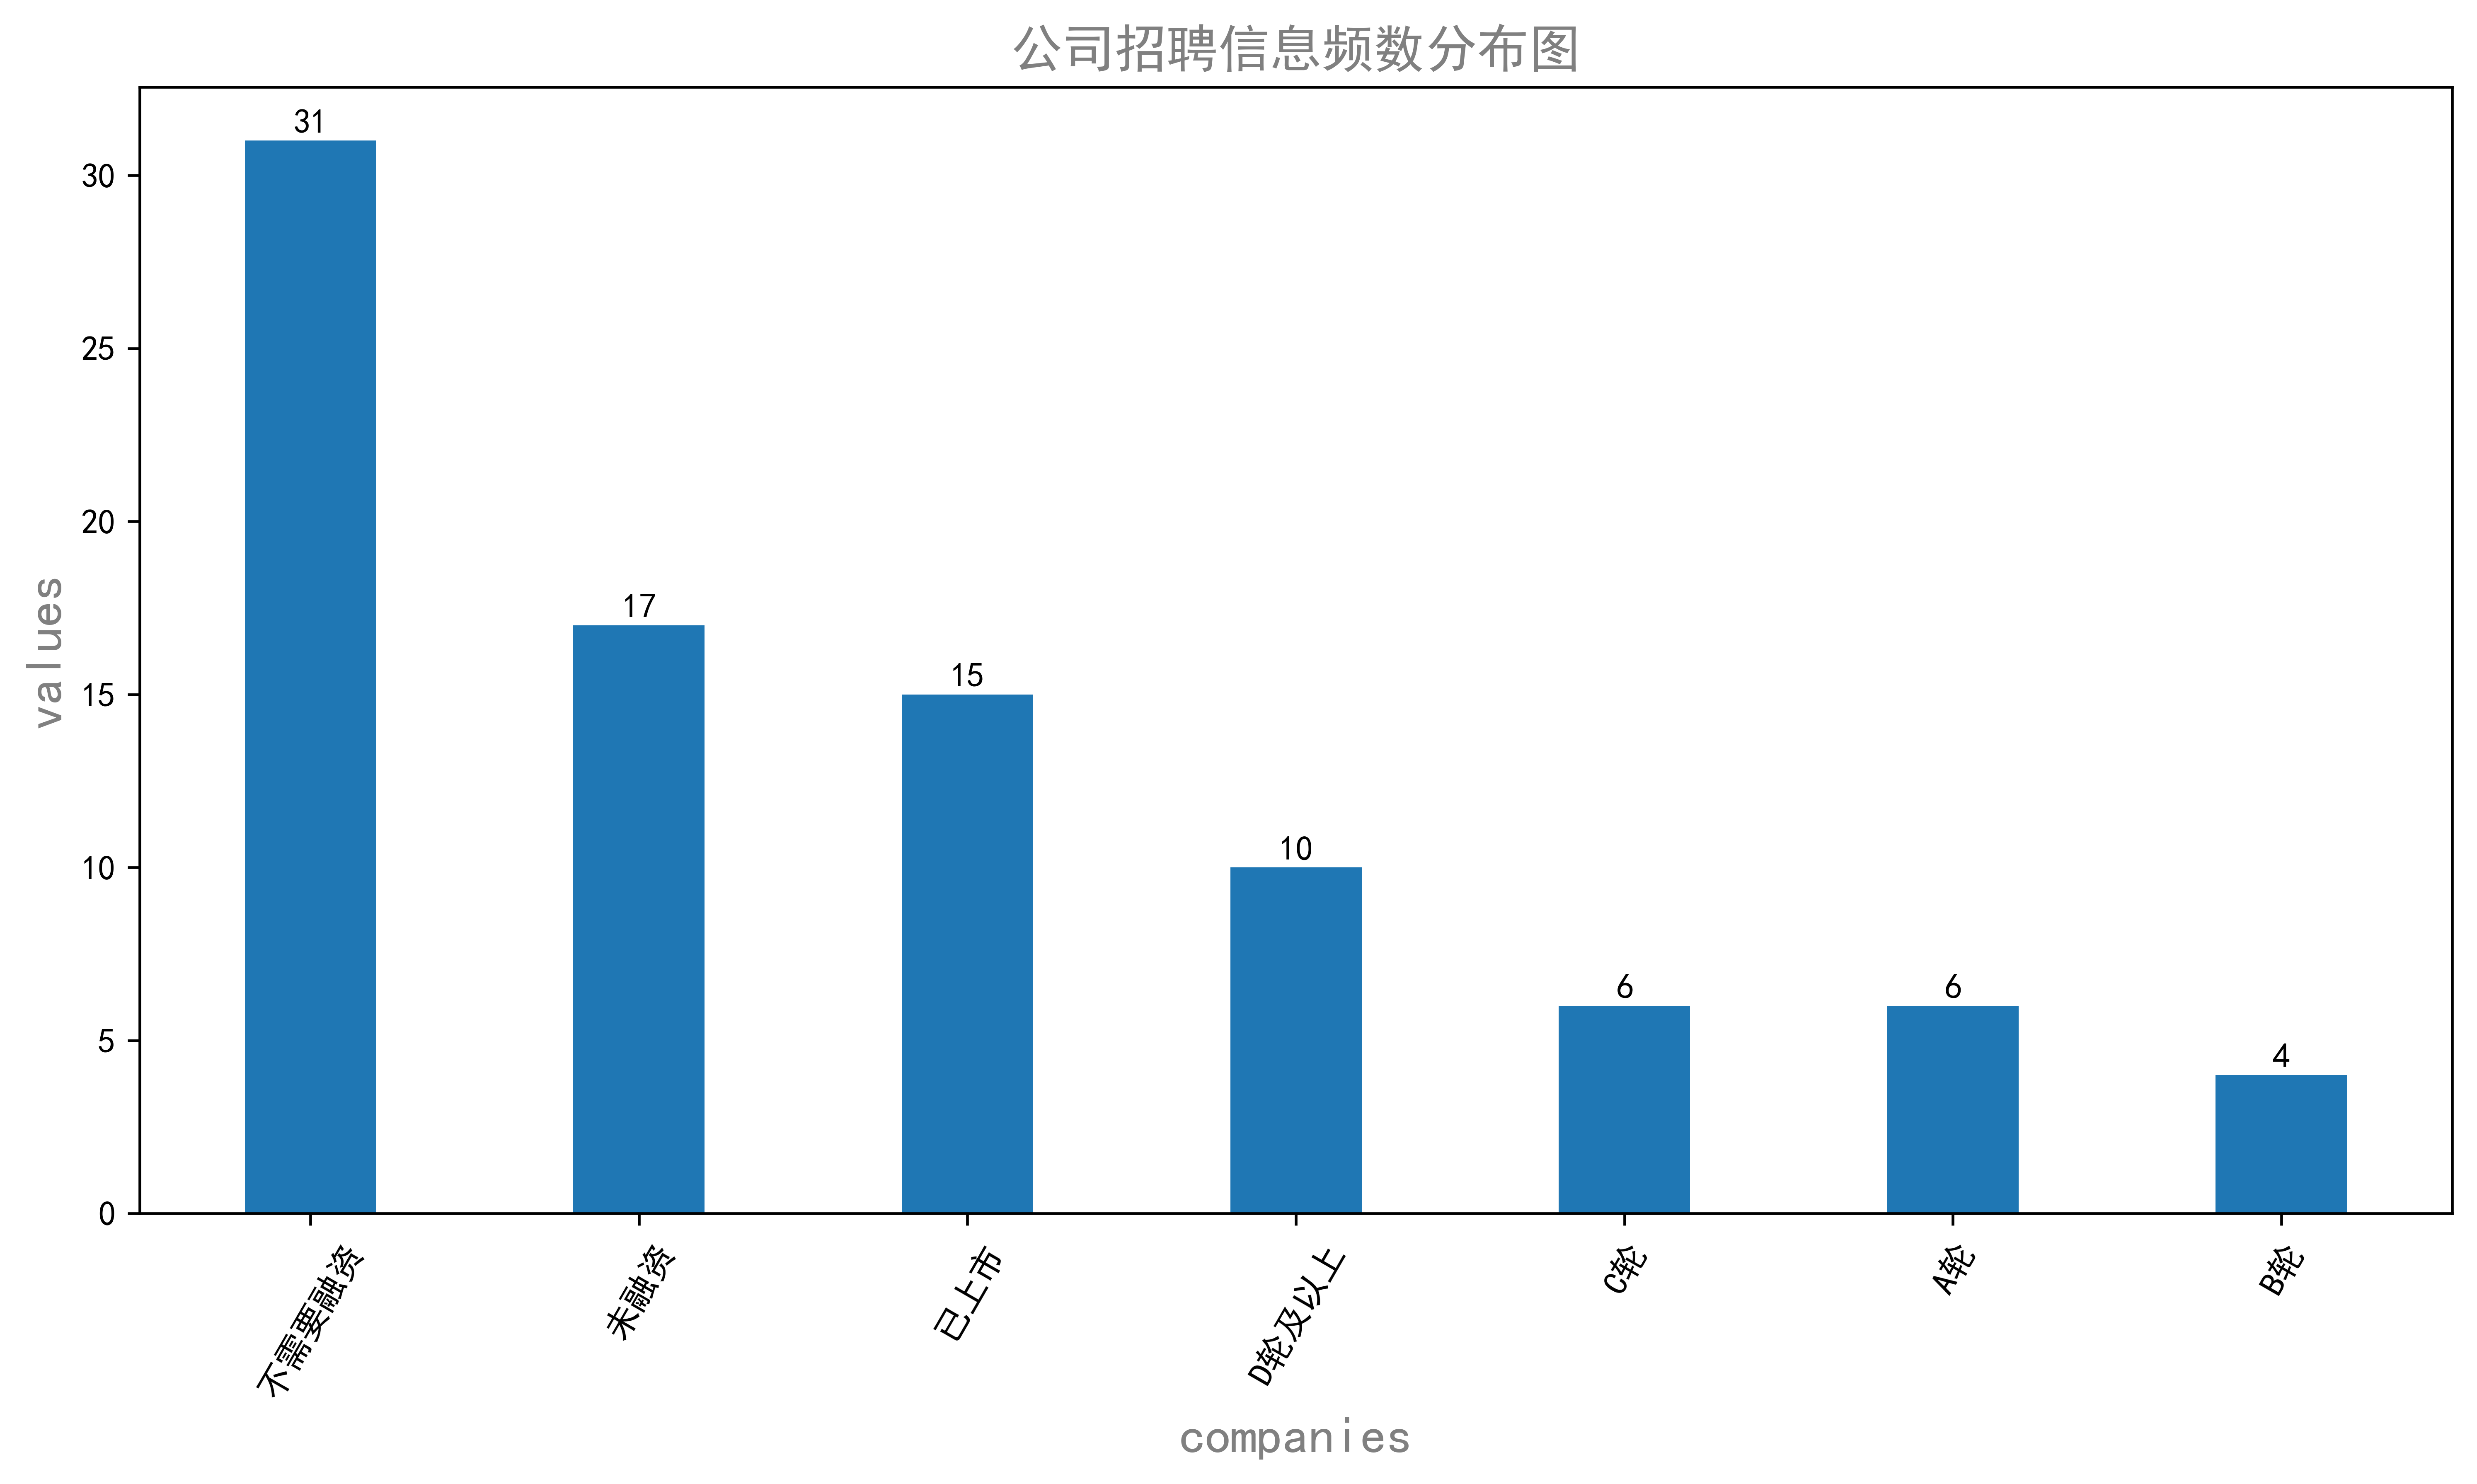

In [61]:

data_all.isnull()['融资情况'].value_counts()
x1=list(data_all['融资情况'].value_counts().index)
y1=list(data_all['融资情况'].value_counts().values)
plt.close()
plt.figure(figsize=(12, 6),dpi=600)
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.title("公司招聘信息频数分布图",font2)
plt.xlabel('companies',font2)
plt.ylabel('values',font2)
plt.bar(x1,y1,width=0.4)
for x1,y1 in zip(x1,y1):
    plt.text(x1,y1+0.1,y1, ha='center',va='bottom')
plt.xticks(rotation=60)

In [7]:
def bar_plot(column_name):
    x=list(data_all[column_name].value_counts().index)
    y=list(data_all[column_name].value_counts().values)
    plt.figure(figsize=(12, 6),dpi=500)
    font = {
    'weight' : 'normal',
    'color':'#808080',
    'size'   : 15}
    a = column_name+"频数分布图"
    path_file = "D:\\githubProject\\bosszhipin\\data\\"+str(a)+".png"
    plt.title(a,font)
    plt.xlabel(a,font)
    plt.ylabel('values',font)
    plt.bar(x,y,width=0.4)
    plt.xticks(rotation=60)
    for x,y in zip(x,y):
        plt.text(x,y+0.1,y, ha='center',va='bottom') 
    plt.savefig(path_file)
    plt.close()
    


In [8]:
def pie_plot(column_name,explode):
    plt.figure(dpi=600)
    x=list(data_all[column_name].value_counts().index)
    y=list(data_all[column_name].value_counts().values)
    a = column_name+"占比图"
    path_file = "D:\\githubProject\\bosszhipin\\data\\"+str(a)+".png"
    font2 = {
    'weight' : 'normal',
    'size'   : 10}
    plt.pie(y,explode=explode,labels=x,autopct='%1.1f%%',shadow=False,startangle=150,textprops=font2)
    plt.savefig(path_file)

In [29]:
print(data_all.head())

  工作区域 具体工作地点    公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求  薪资水平
0  宝安区   宝安中心    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  45.0
1  福田区     梅林    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  37.5
2  罗湖区     国贸  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  24.0
3  南山区    科技园      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  30.0
4  宝安区   宝安中心    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  33.0


   工作区域  具体工作地点  融资情况  公司规模  所属行业  经验年限  学历要求  薪资水平
0     0       0     0     0     0     0     0  45.0
1     1       1     0     0     0     1     0  37.5
2     2       2     1     1     1     1     0  24.0
3     3       3     2     0     2     0     0  30.0
4     0       0     0     0     0     1     0  33.0
            工作区域    具体工作地点      融资情况      公司规模      所属行业      经验年限      学历要求  \
工作区域    1.000000  0.065612  0.004232  0.005836  0.138948  0.061874  0.018682   
具体工作地点  0.065612  1.000000  0.002931  0.135089  0.178502  0.107155  0.133585   
融资情况    0.004232  0.002931  1.000000  0.403948  0.285307  0.178836  0.048218   
公司规模    0.005836  0.135089  0.403948  1.000000  0.235080  0.188293  0.066712   
所属行业    0.138948  0.178502  0.285307  0.235080  1.000000  0.181018  0.018473   

            薪资水平  
工作区域    0.079941  
具体工作地点  0.252771  
融资情况    0.222679  
公司规模    0.438151  
所属行业    0.285088  


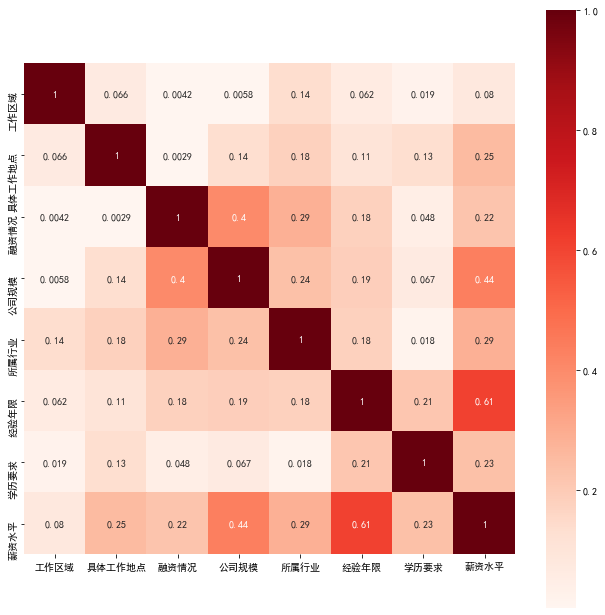

In [32]:
import seaborn as sns
import numpy
a = data_all.apply(lambda x: x.factorize()[0])
a['薪资水平'] = data_all['薪资水平']
a.drop('公司名称',axis=1,inplace=True)
a.drop('岗位名称',axis=1,inplace=True)
print(a.head())

def test(df):
    dfData = numpy.abs(df.corr(method='spearman'))
    print(dfData.head())
    plt.subplots(figsize=(11, 11)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Reds")
    plt.savefig('D:\\githubProject\\bosszhipin\\data\\BluesStateRelation_s.png')
    plt.show()
    
test(a)


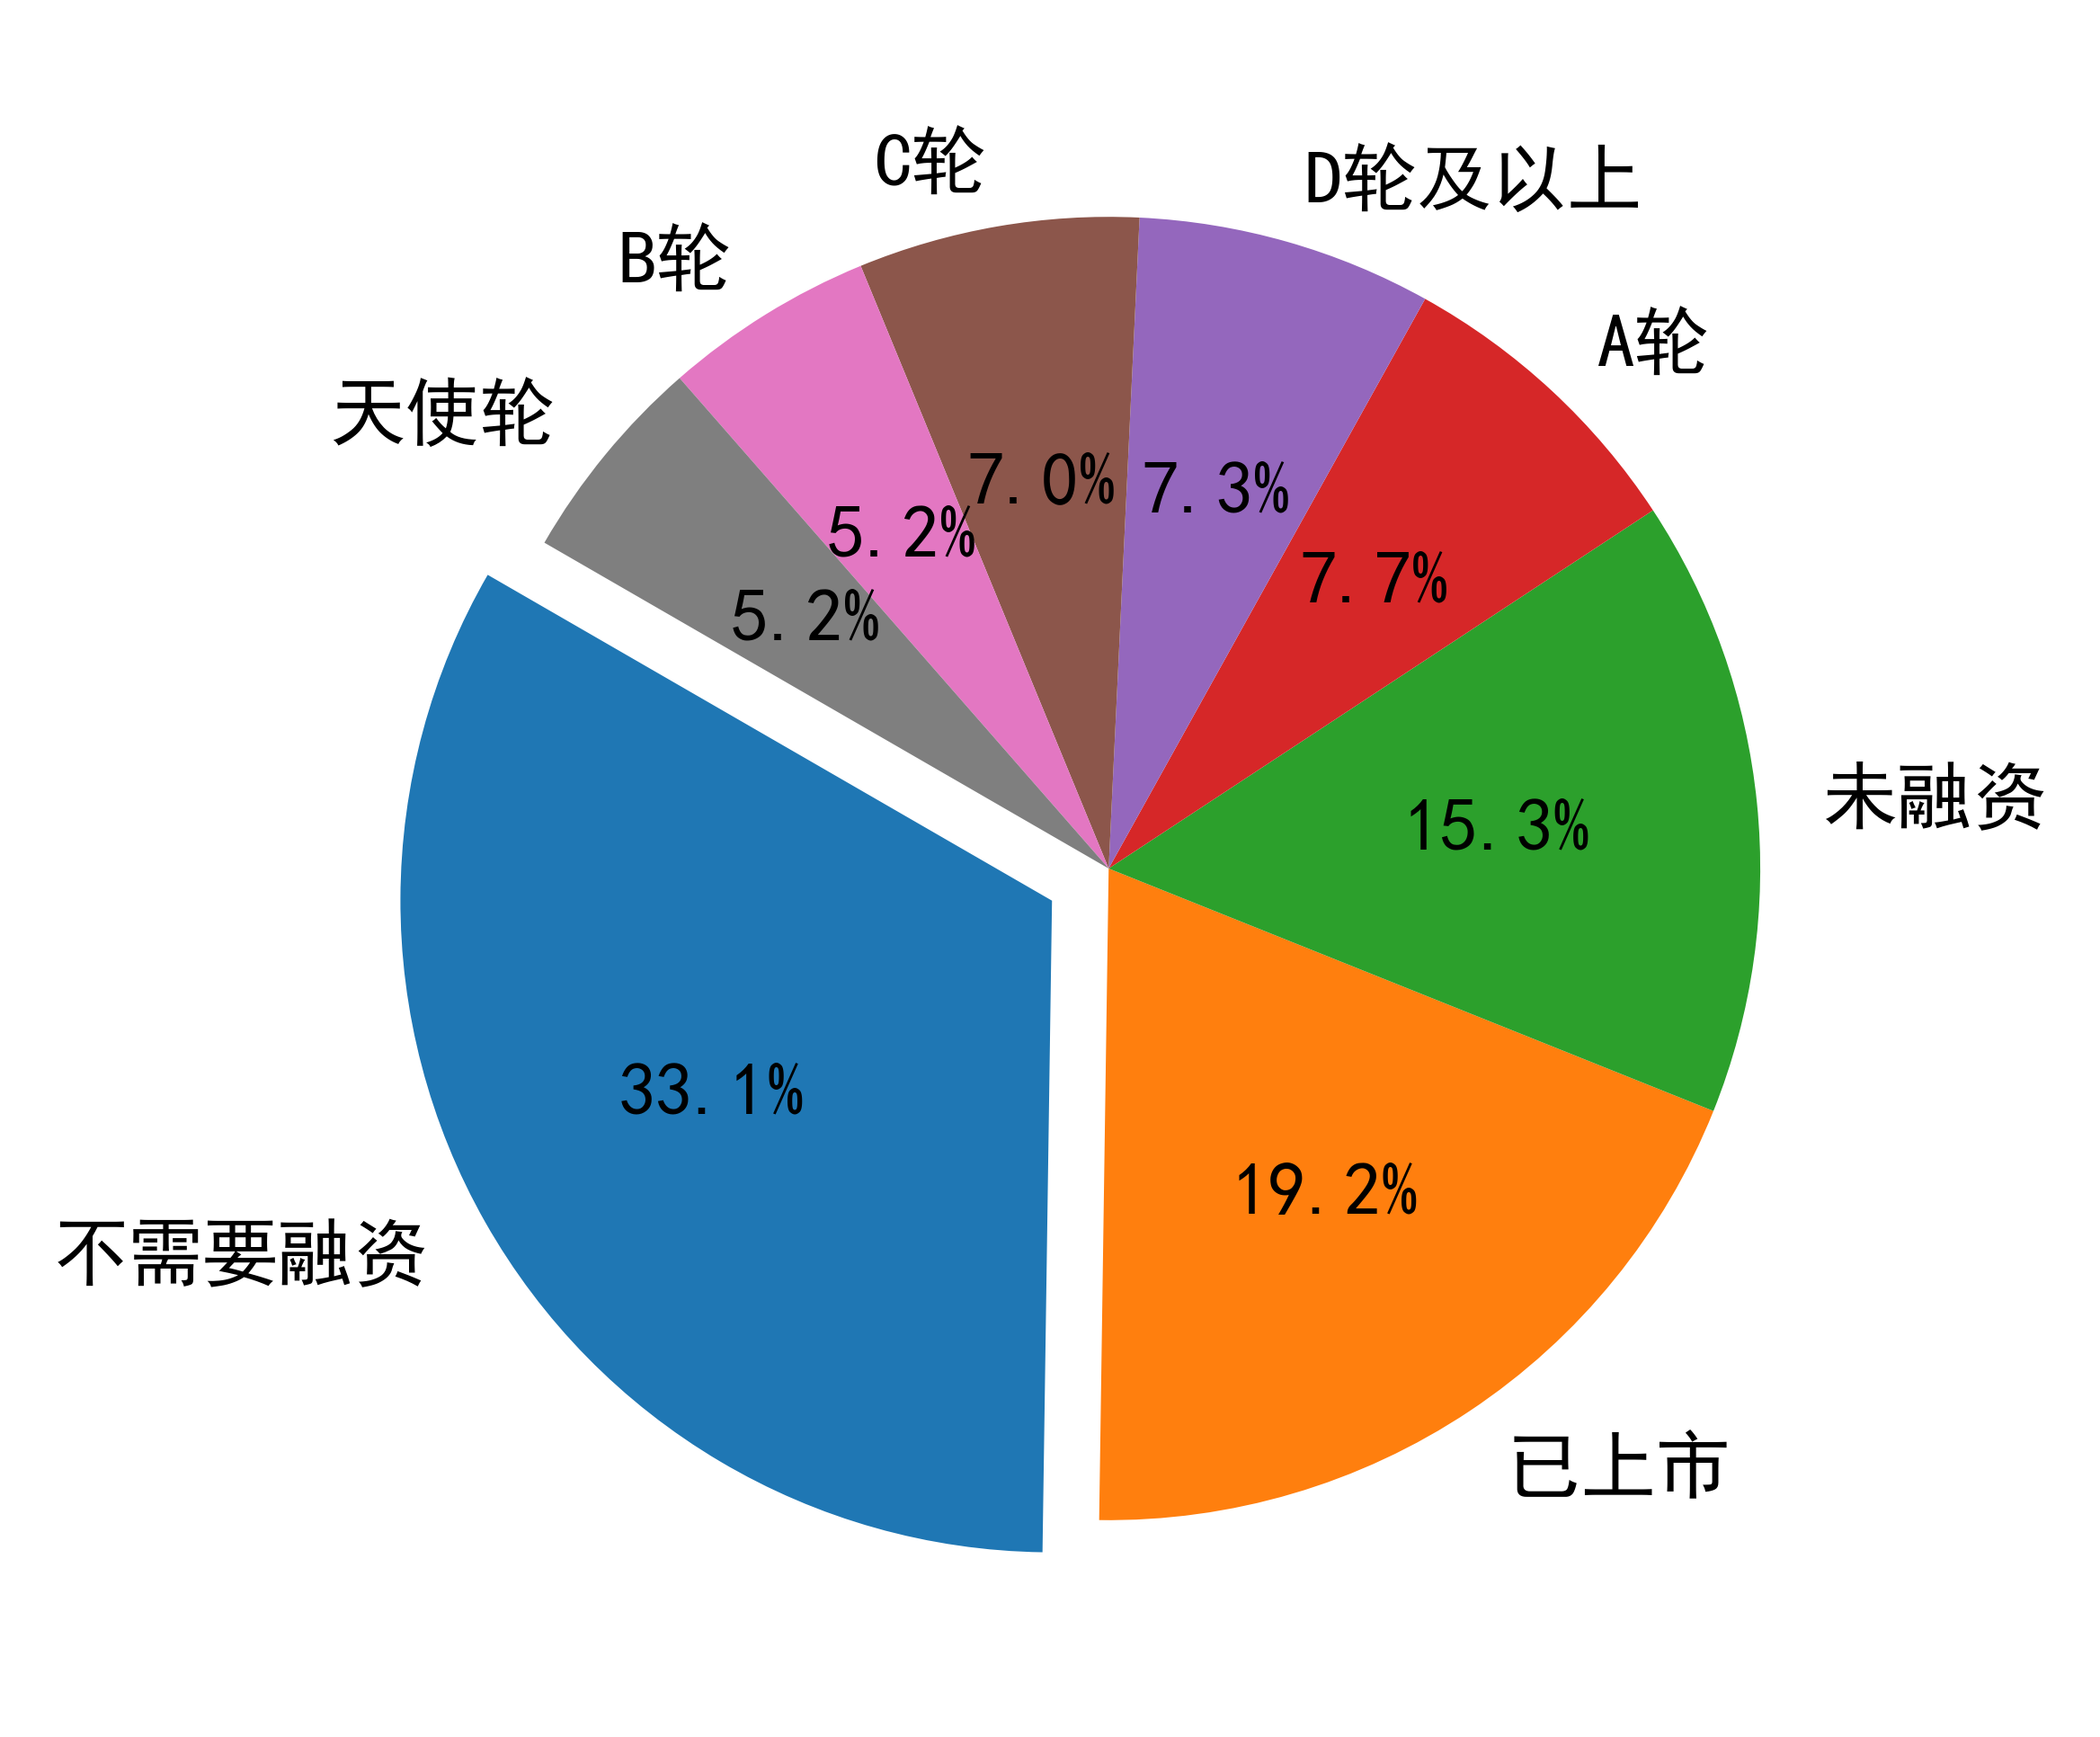

In [122]:
data_all['融资情况'].value_counts()
bar_plot('融资情况')
pie_plot('融资情况',(0.1,0,0,0,0,0,0,0))

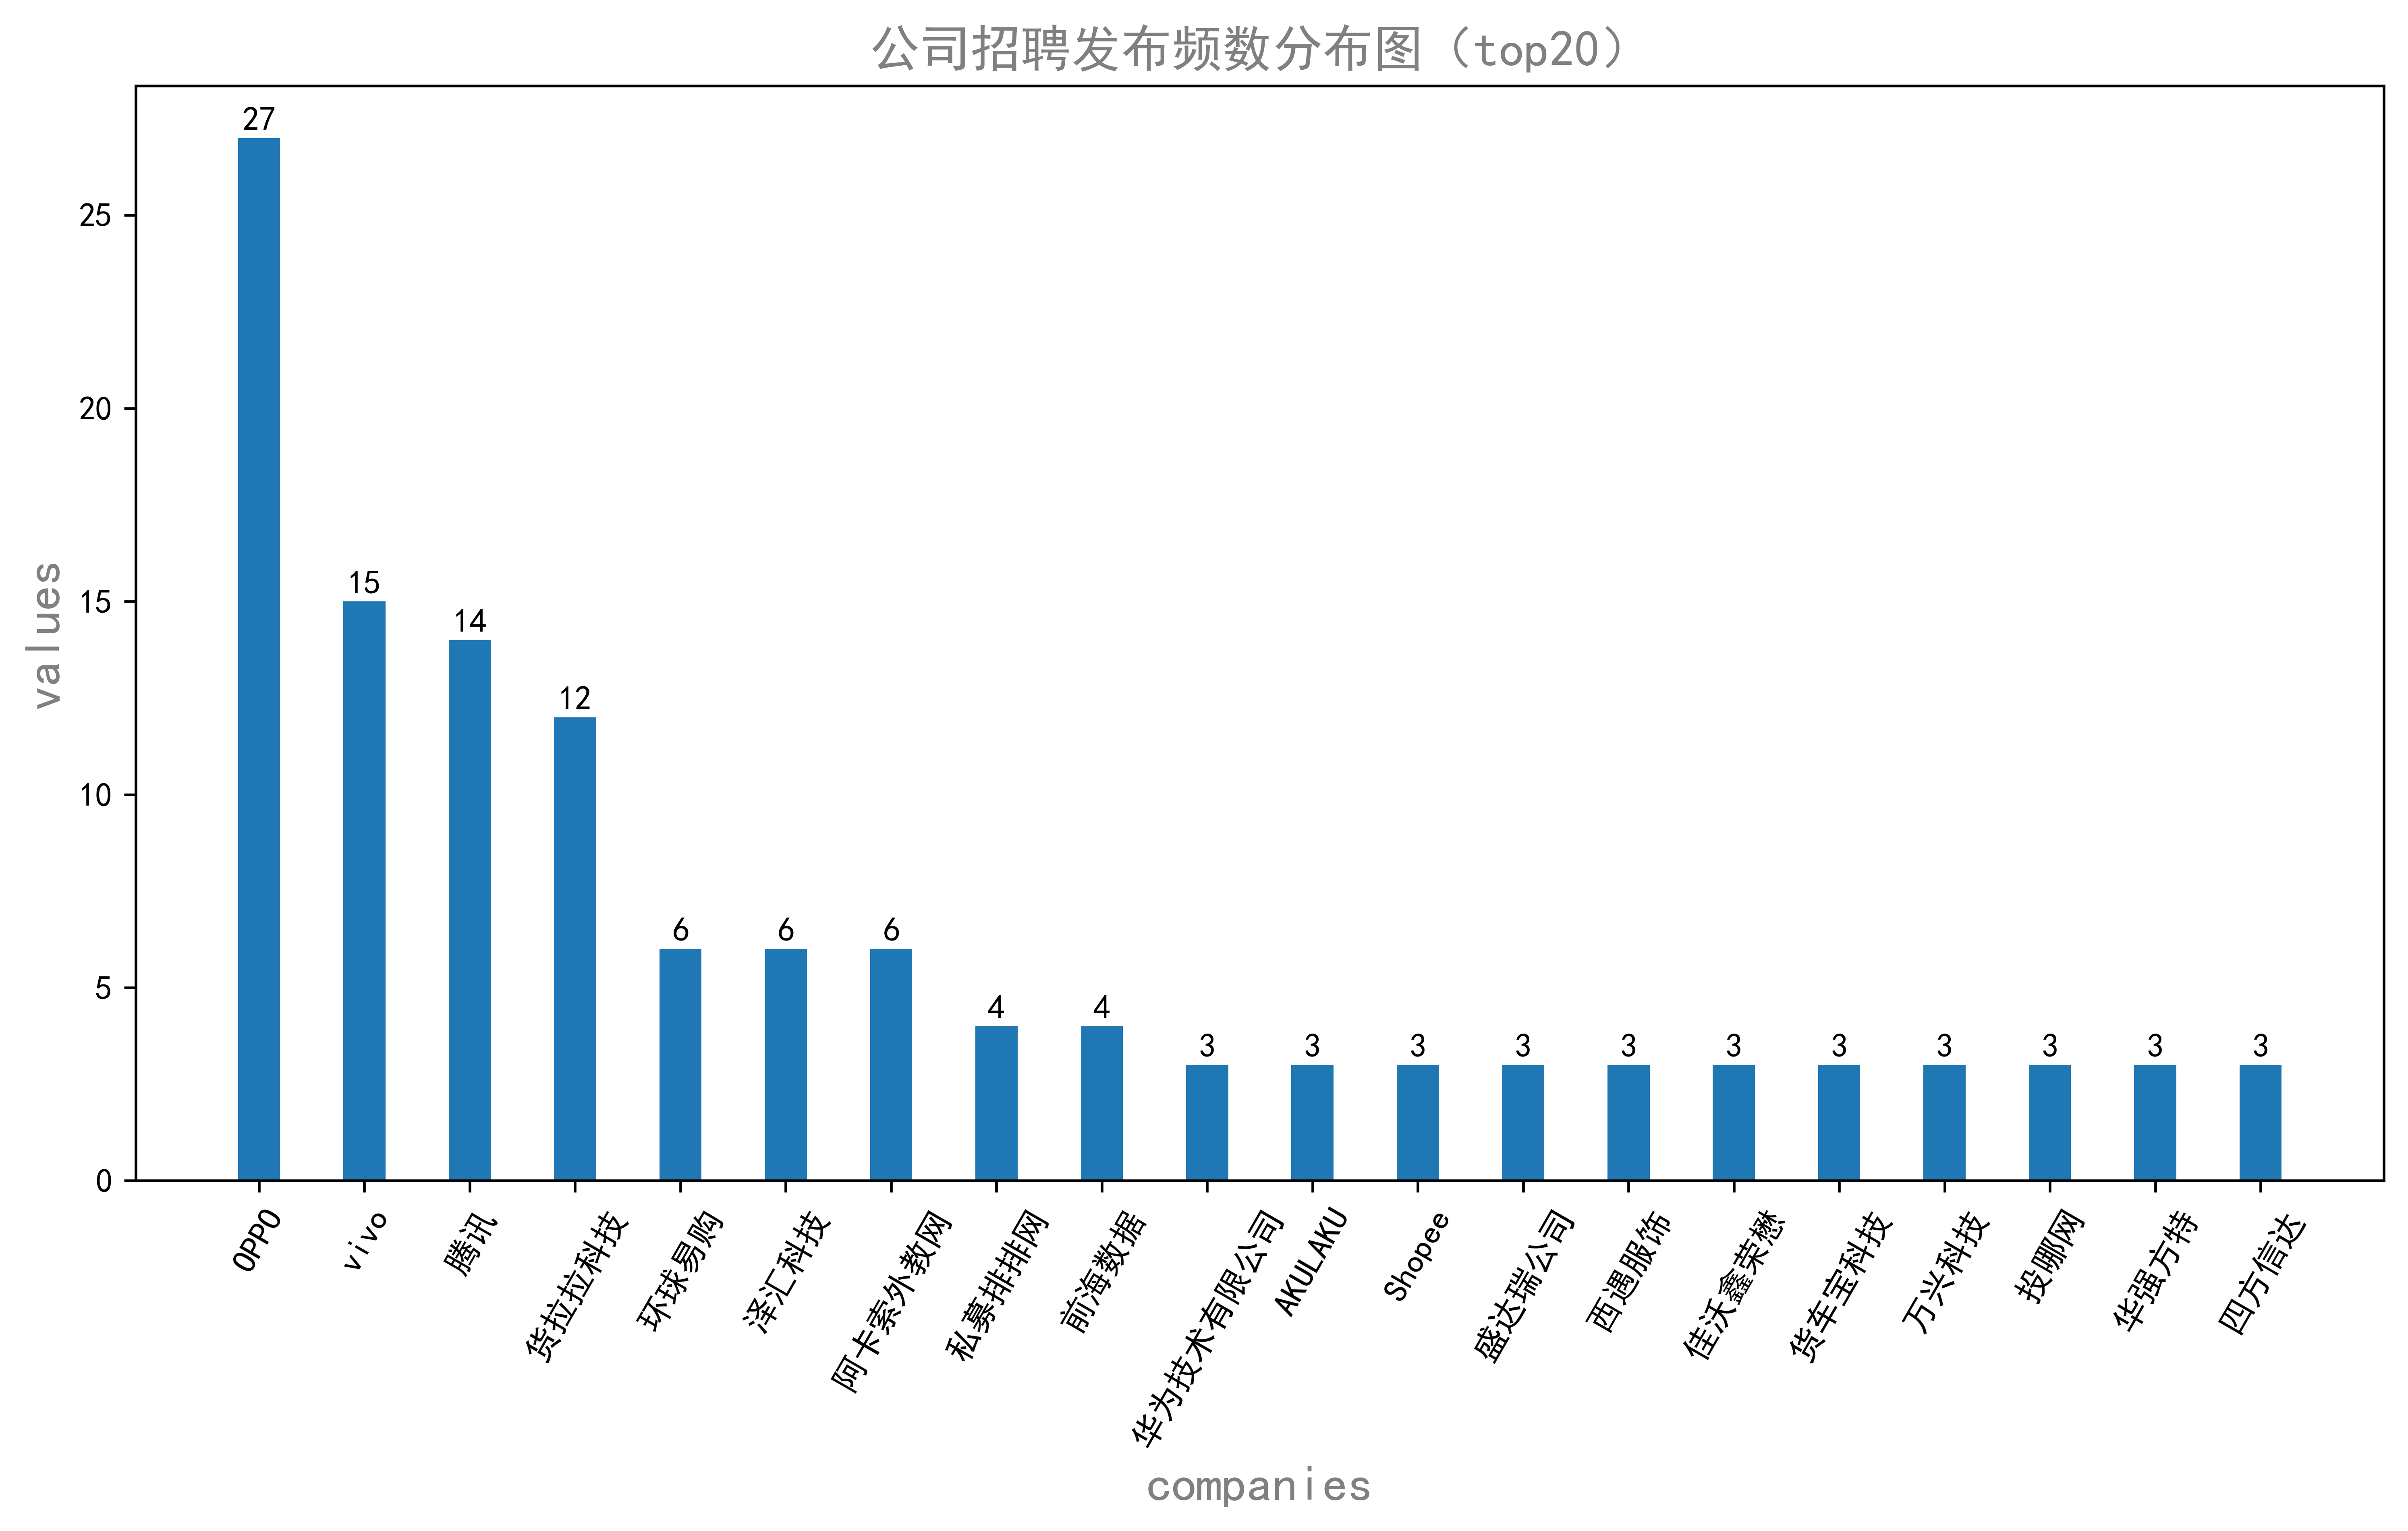

In [123]:
x1=list(data_all['公司名称'].value_counts().index[0:20])
y1=list(data_all['公司名称'].value_counts().values[0:20])
plt.close()
plt.figure(figsize=(12, 6),dpi=600)
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.title("公司招聘信息频数分布图（top20）",font2)
plt.xlabel('companies',font2)
plt.ylabel('values',font2)
plt.bar(x1,y1,width=0.4)
for x1,y1 in zip(x1,y1):
    plt.text(x1,y1+0.1,y1, ha='center',va='bottom')
plt.xticks(rotation=60)
plt.savefig(r"D:\githubProject\bosszhipin\data\公司招聘信息频数分布图.png")

In [128]:

pd.DataFrame(data_all['公司名称'].value_counts()).describe()

公司名称
count  172.000000
mean     1.720930
std      2.680452
min      1.000000
25%      1.000000
50%      1.000000
75%      1.000000
max     27.000000

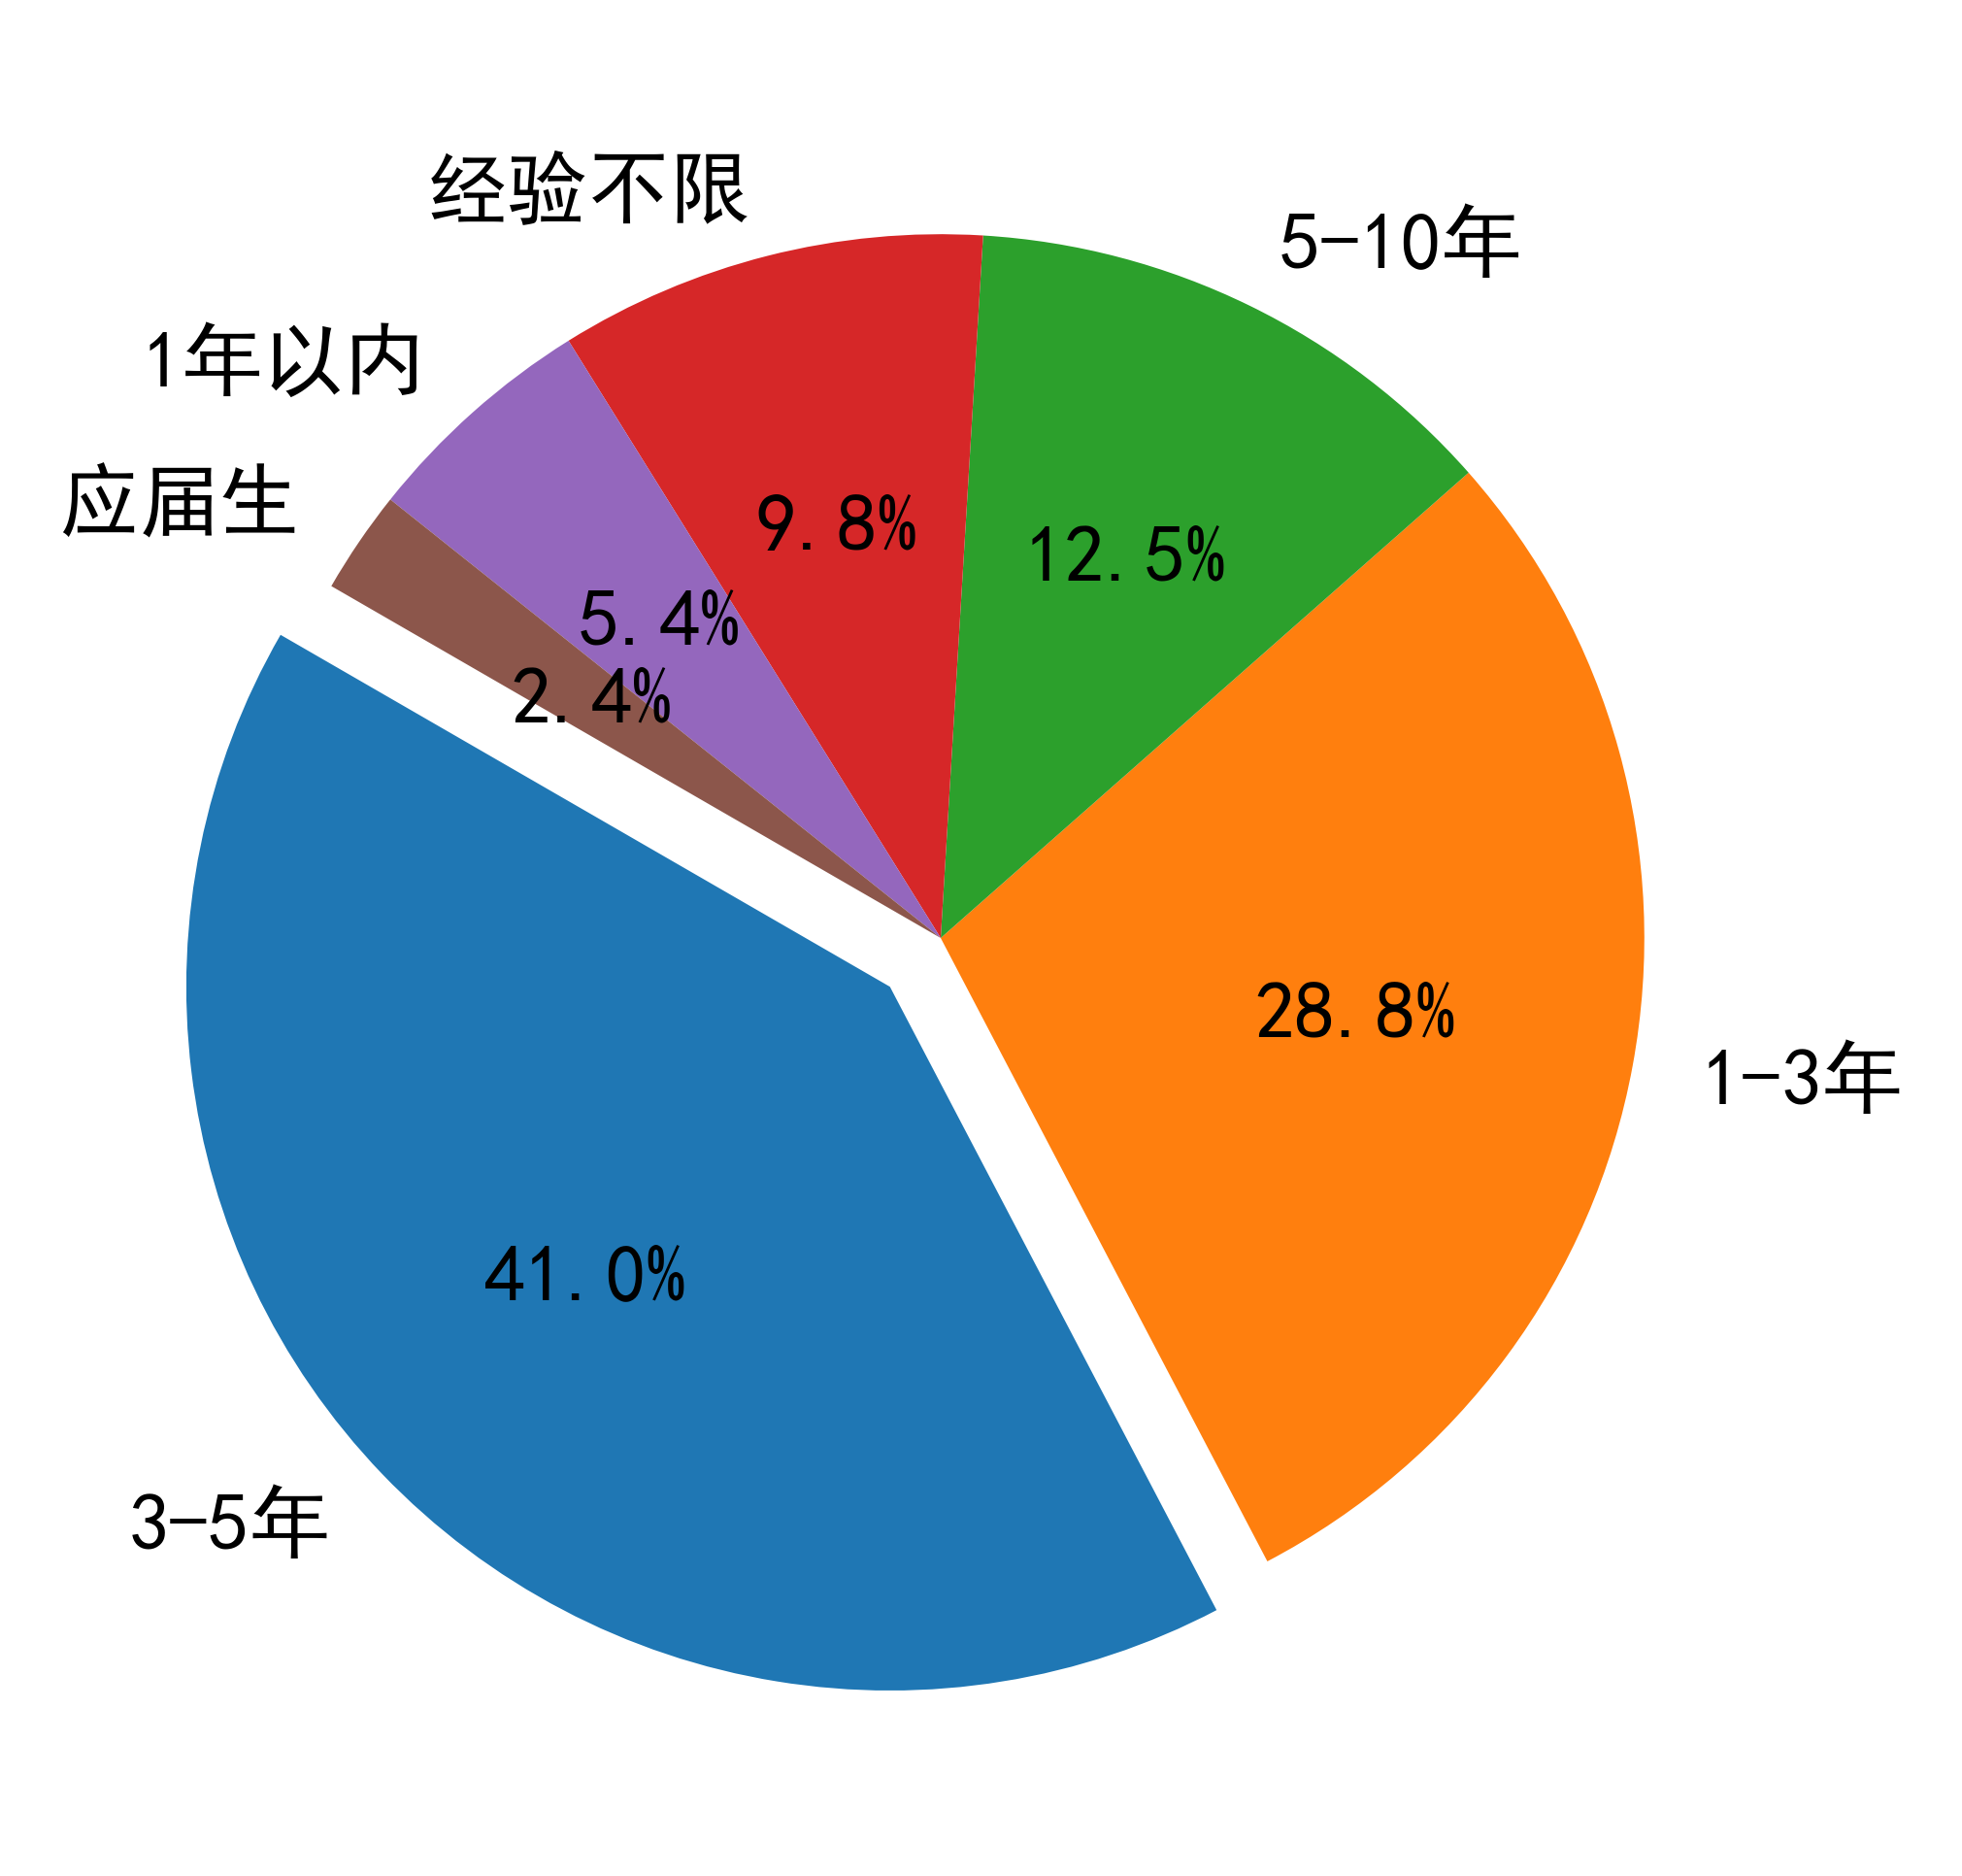

In [143]:
data_all['经验年限'].value_counts()
bar_plot('经验年限')
pie_plot('经验年限',(0.1,0,0,0,0,0))


In [62]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 9 columns):
公司名称    299 non-null object
融资情况    290 non-null object
公司规模    299 non-null object
所属行业    290 non-null object
岗位名称    299 non-null object
经验年限    298 non-null object
学历要求    297 non-null object
薪资水平    299 non-null object
工作地点    298 non-null object
dtypes: object(9)
memory usage: 23.4+ KB


In [65]:
tuple(data_all['融资情况'].value_counts())

(97, 56, 44, 22, 21, 20, 15, 15)

# 公司分布分析

In [77]:
data_all['公司名称'].value_counts()

OPPO            29
vivo            15
腾讯              14
货拉拉科技           12
环球易购             7
泽汇科技             6
阿卡索外教网           6
前海数据             4
私募排排网            4
货车宝科技            3
投哪网              3
佳沃鑫荣懋            3
四方信达             3
盛达瑞公司            3
长亭易购             3
AKULAKU          3
Shopee           3
华为技术有限公司         3
万兴科技             3
西遇服饰             3
华强方特             3
顺丰科技             2
乐信集团             2
PKFARE比客         2
白骑士              2
百度               2
BDS大数易           2
百丽               2
Ricequant        2
丰巢科技             2
                ..
深圳云创智慧空间         1
佰赢               1
路通网络             1
华为               1
中软国际             1
SHEIN（深圳）        1
第一卫              1
丰e足食             1
跨海侠              1
中科闻歌             1
神州信息             1
中天安驰             1
安天               1
智在咨询             1
傲雷科技             1
融臻               1
LocalGravity     1
深圳中金国礼文化金        1
元气弹              1
大卖车              1
Ugoccam          1
合众融         

In [92]:
x1=list(data_all['公司名称'].value_counts().index[0:20])
y1=list(data_all['公司名称'].value_counts().values[0:20])
print(x1,'\n',y1)

['OPPO', 'vivo', '腾讯', '货拉拉科技', '环球易购', '泽汇科技', '阿卡索外教网', '前海数据', '私募排排网', '货车宝科技', '投哪网', '佳沃鑫荣懋', '四方信达', '盛达瑞公司', '长亭易购', 'AKULAKU', 'Shopee', '华为技术有限公司', '万兴科技', '西遇服饰'] 
 [29, 15, 14, 12, 7, 6, 6, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


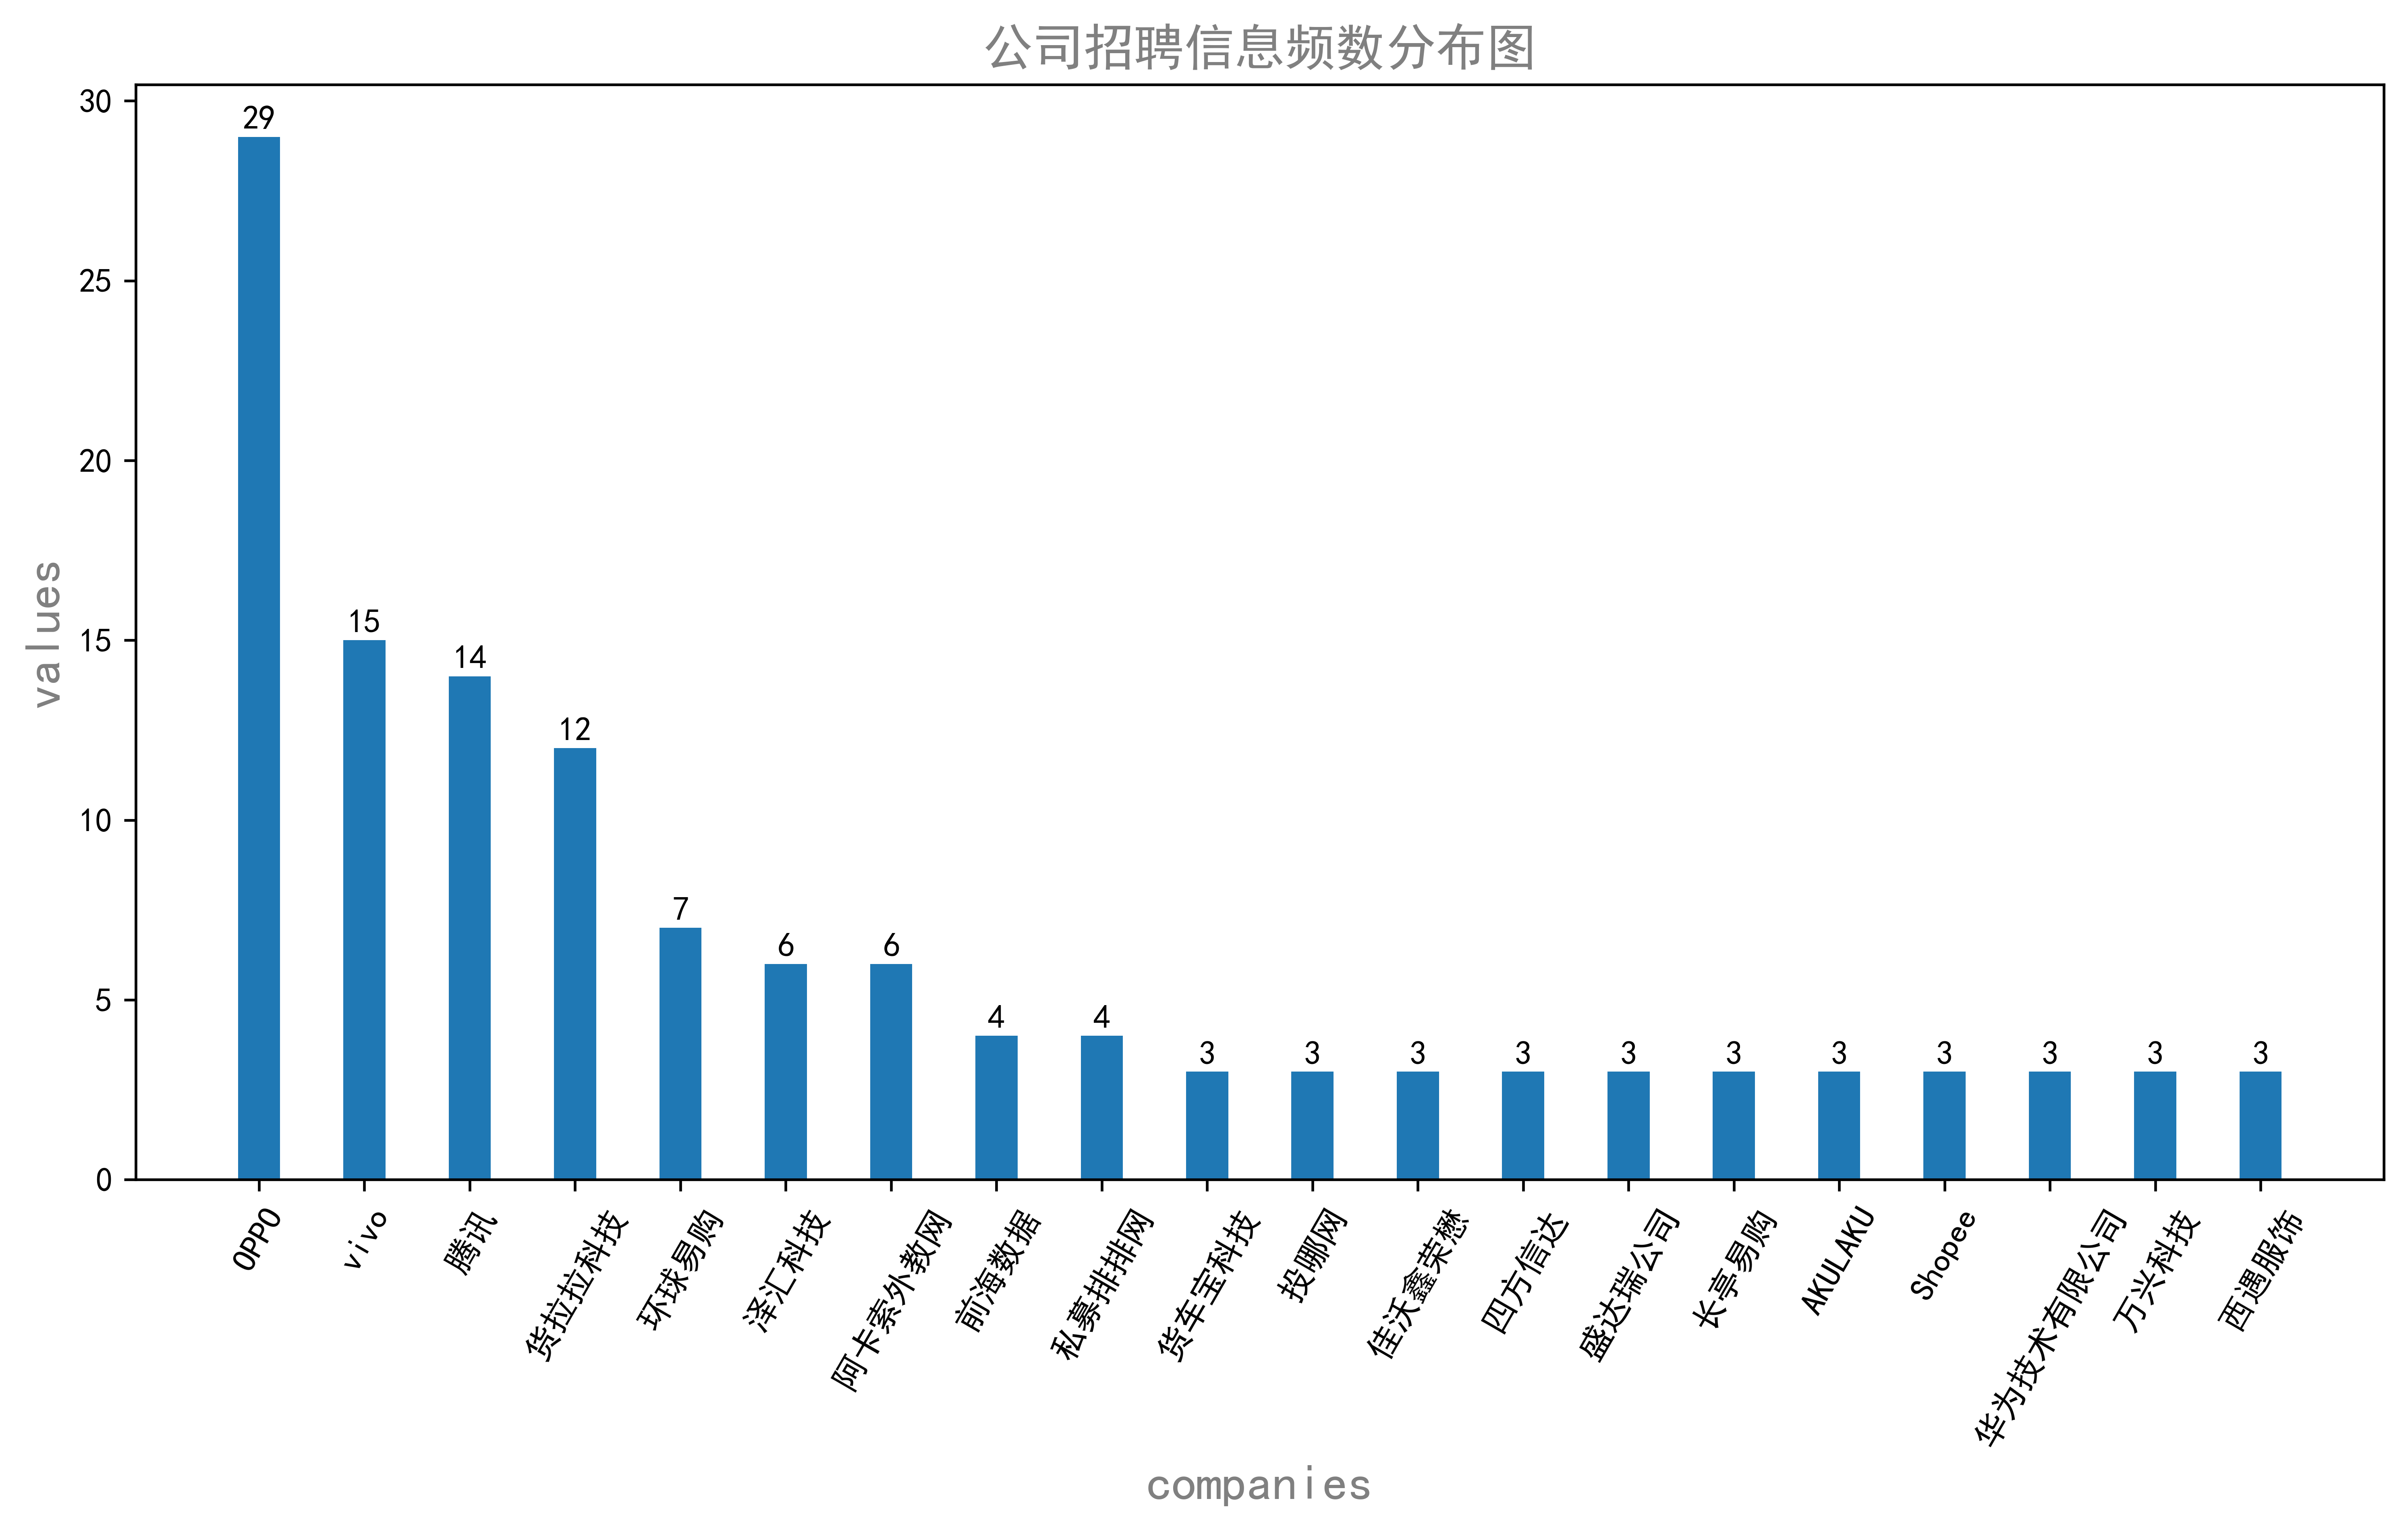

In [110]:

x1=list(data_all['公司名称'].value_counts().index[0:20])
y1=list(data_all['公司名称'].value_counts().values[0:20])
plt.close()
plt.figure(figsize=(12, 6),dpi=600)
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.title("公司招聘信息频数分布图",font2)
plt.xlabel('companies',font2)
plt.ylabel('values',font2)
plt.bar(x1,y1,width=0.4)
for x1,y1 in zip(x1,y1):
    plt.text(x1,y1+0.1,y1, ha='center',va='bottom')
plt.xticks(rotation=60)
plt.savefig(r"D:\githubProject\bosszhipin\公司招聘信息频数分布图.png")

# 公司规模分布

In [112]:
data_all['公司规模'].value_counts()


10000人以上      89
1000-9999人    82
20-99人        50
100-499人      46
500-999人      20
0-20人         12
Name: 公司规模, dtype: int64

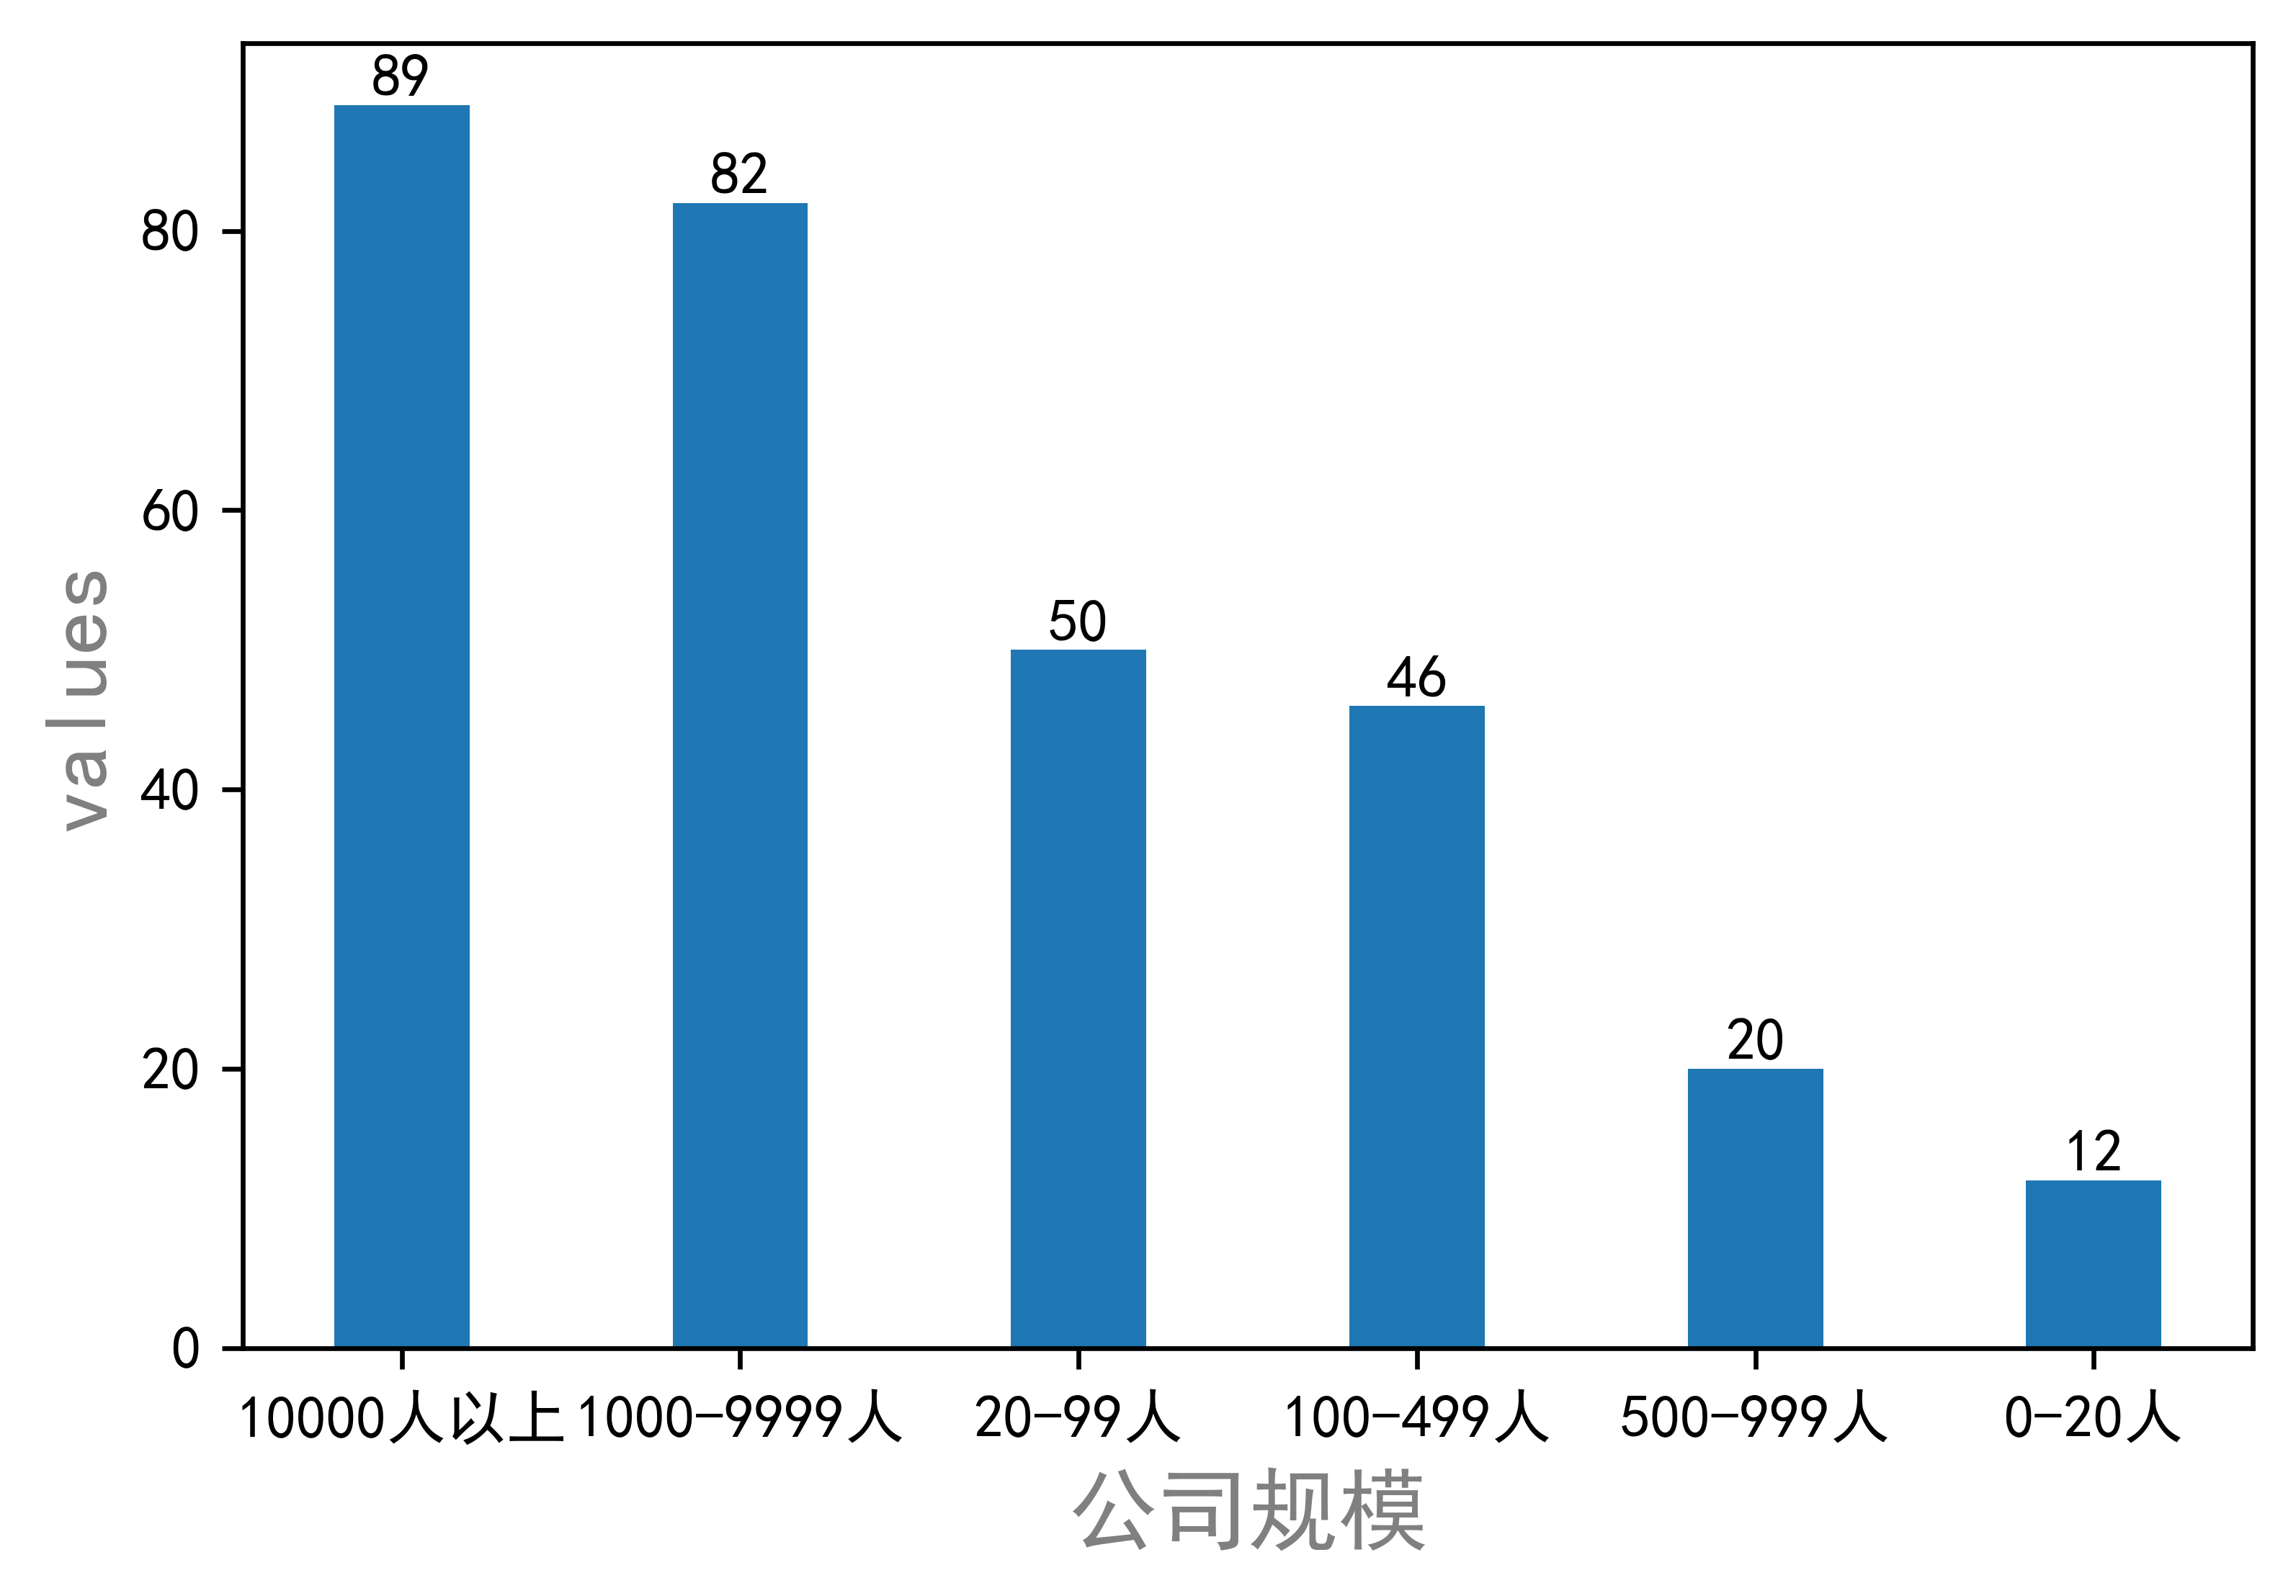

In [137]:
x2=list(data_all['公司规模'].value_counts().index)
y2=list(data_all['公司规模'].value_counts().values)
plt.close()
plt.figure(dpi=600)
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.xlabel('公司规模',font2)
plt.ylabel('values',font2)
plt.bar(x2,y2,width=0.4)
for x2,y2 in zip(x2,y2):
    plt.text(x2,y2+0.1,y2, ha='center',va='bottom')
plt.savefig(r"D:\githubProject\bosszhipin\公司规模分布图分布图.png")

# 所属行业分布情况 

In [116]:
data_all['所属行业'].value_counts()

互联网         94
移动互联网       36
电子商务        33
互联网金融       33
计算机软件       18
数据服务        12
企业服务        10
贸易/进出口       6
在线教育         6
旅游           6
其他行业         6
游戏           5
咨询           4
通信/网络设备      3
生活服务         2
O2O          2
智能硬件         2
物流/仓储        2
投资/融资        2
医疗健康         2
音乐/视频/阅读     1
培训机构         1
社交网络         1
广告营销         1
信息安全         1
工程施工         1
Name: 所属行业, dtype: int64

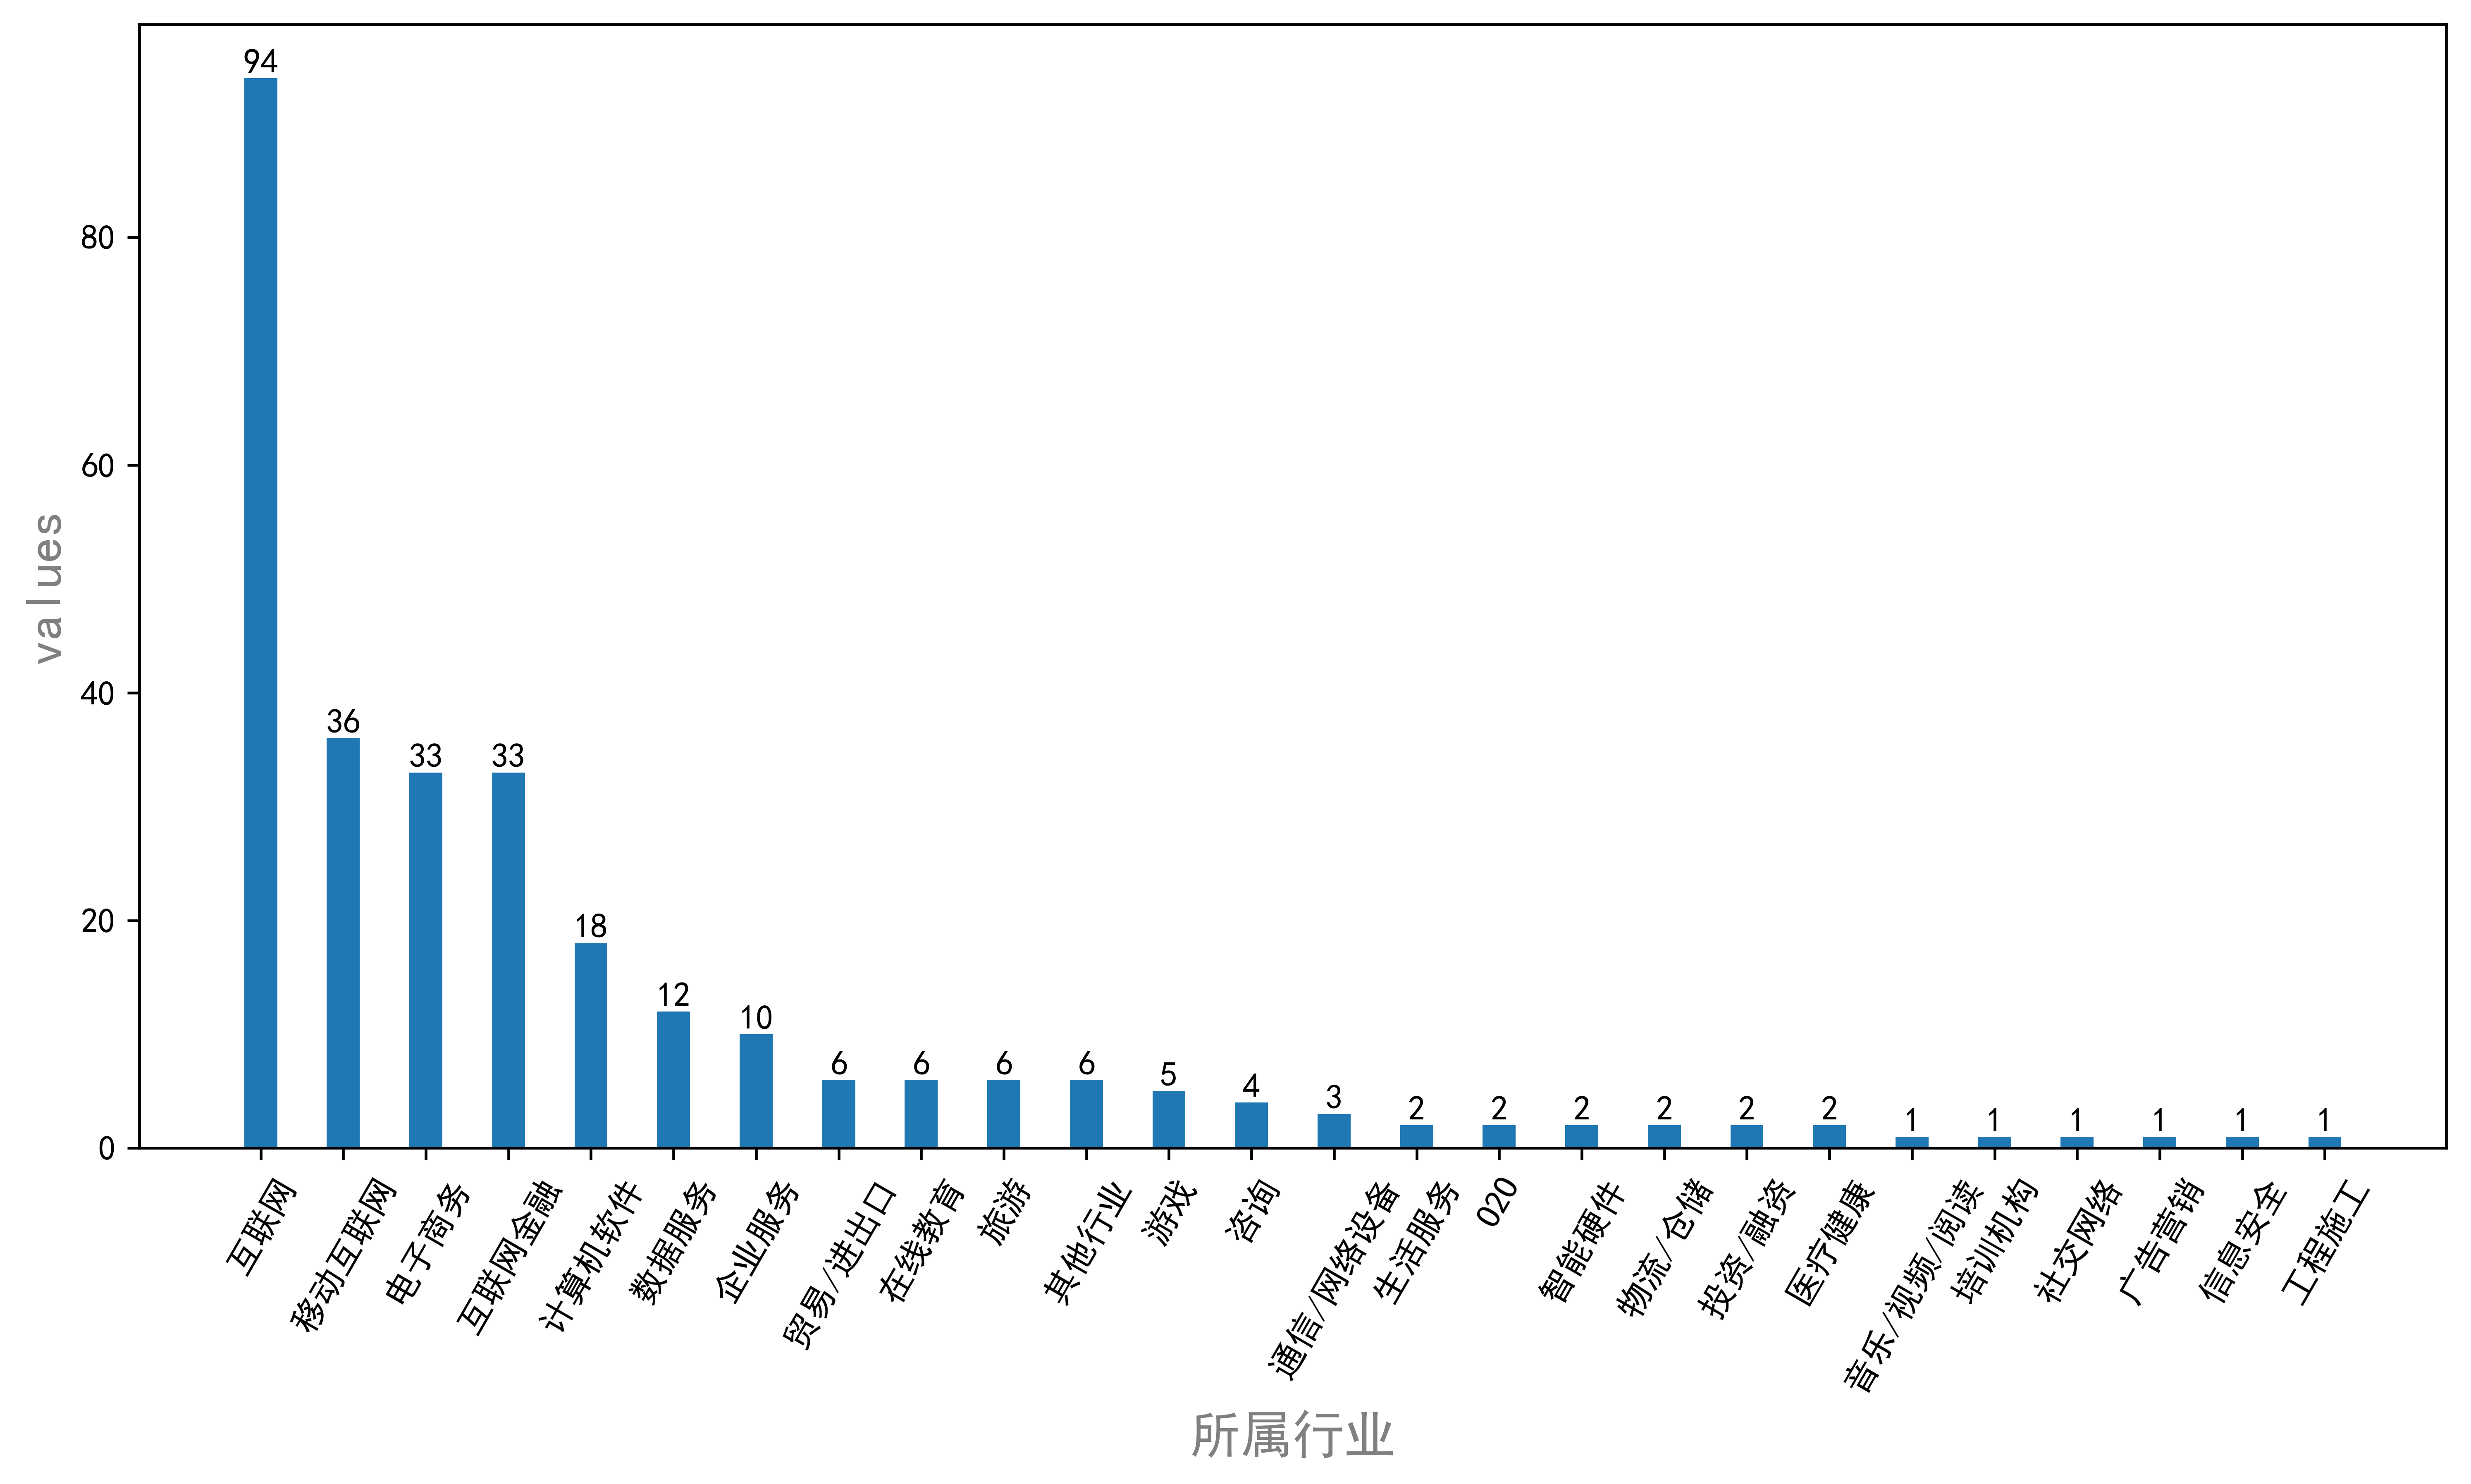

In [136]:
x3=list(data_all['所属行业'].value_counts().index)
y3=list(data_all['所属行业'].value_counts().values)
plt.close()
plt.figure(figsize=(12, 6),dpi=600)
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.xlabel('所属行业',font2)
plt.ylabel('values',font2)
plt.bar(x3,y3,width=0.4)
for x3,y3 in zip(x3,y3):
    plt.text(x3,y3+0.1,y3, ha='center',va='bottom')
plt.xticks(rotation=60)
plt.savefig(r"D:\githubProject\bosszhipin\公司所属行业分布图.png")

# 经验年限分布

In [123]:
data_all['经验年限'].value_counts()

3-5年     124
1-3年      85
5-10年     37
经验不限      29
1年以内      16
应届生        7
Name: 经验年限, dtype: int64

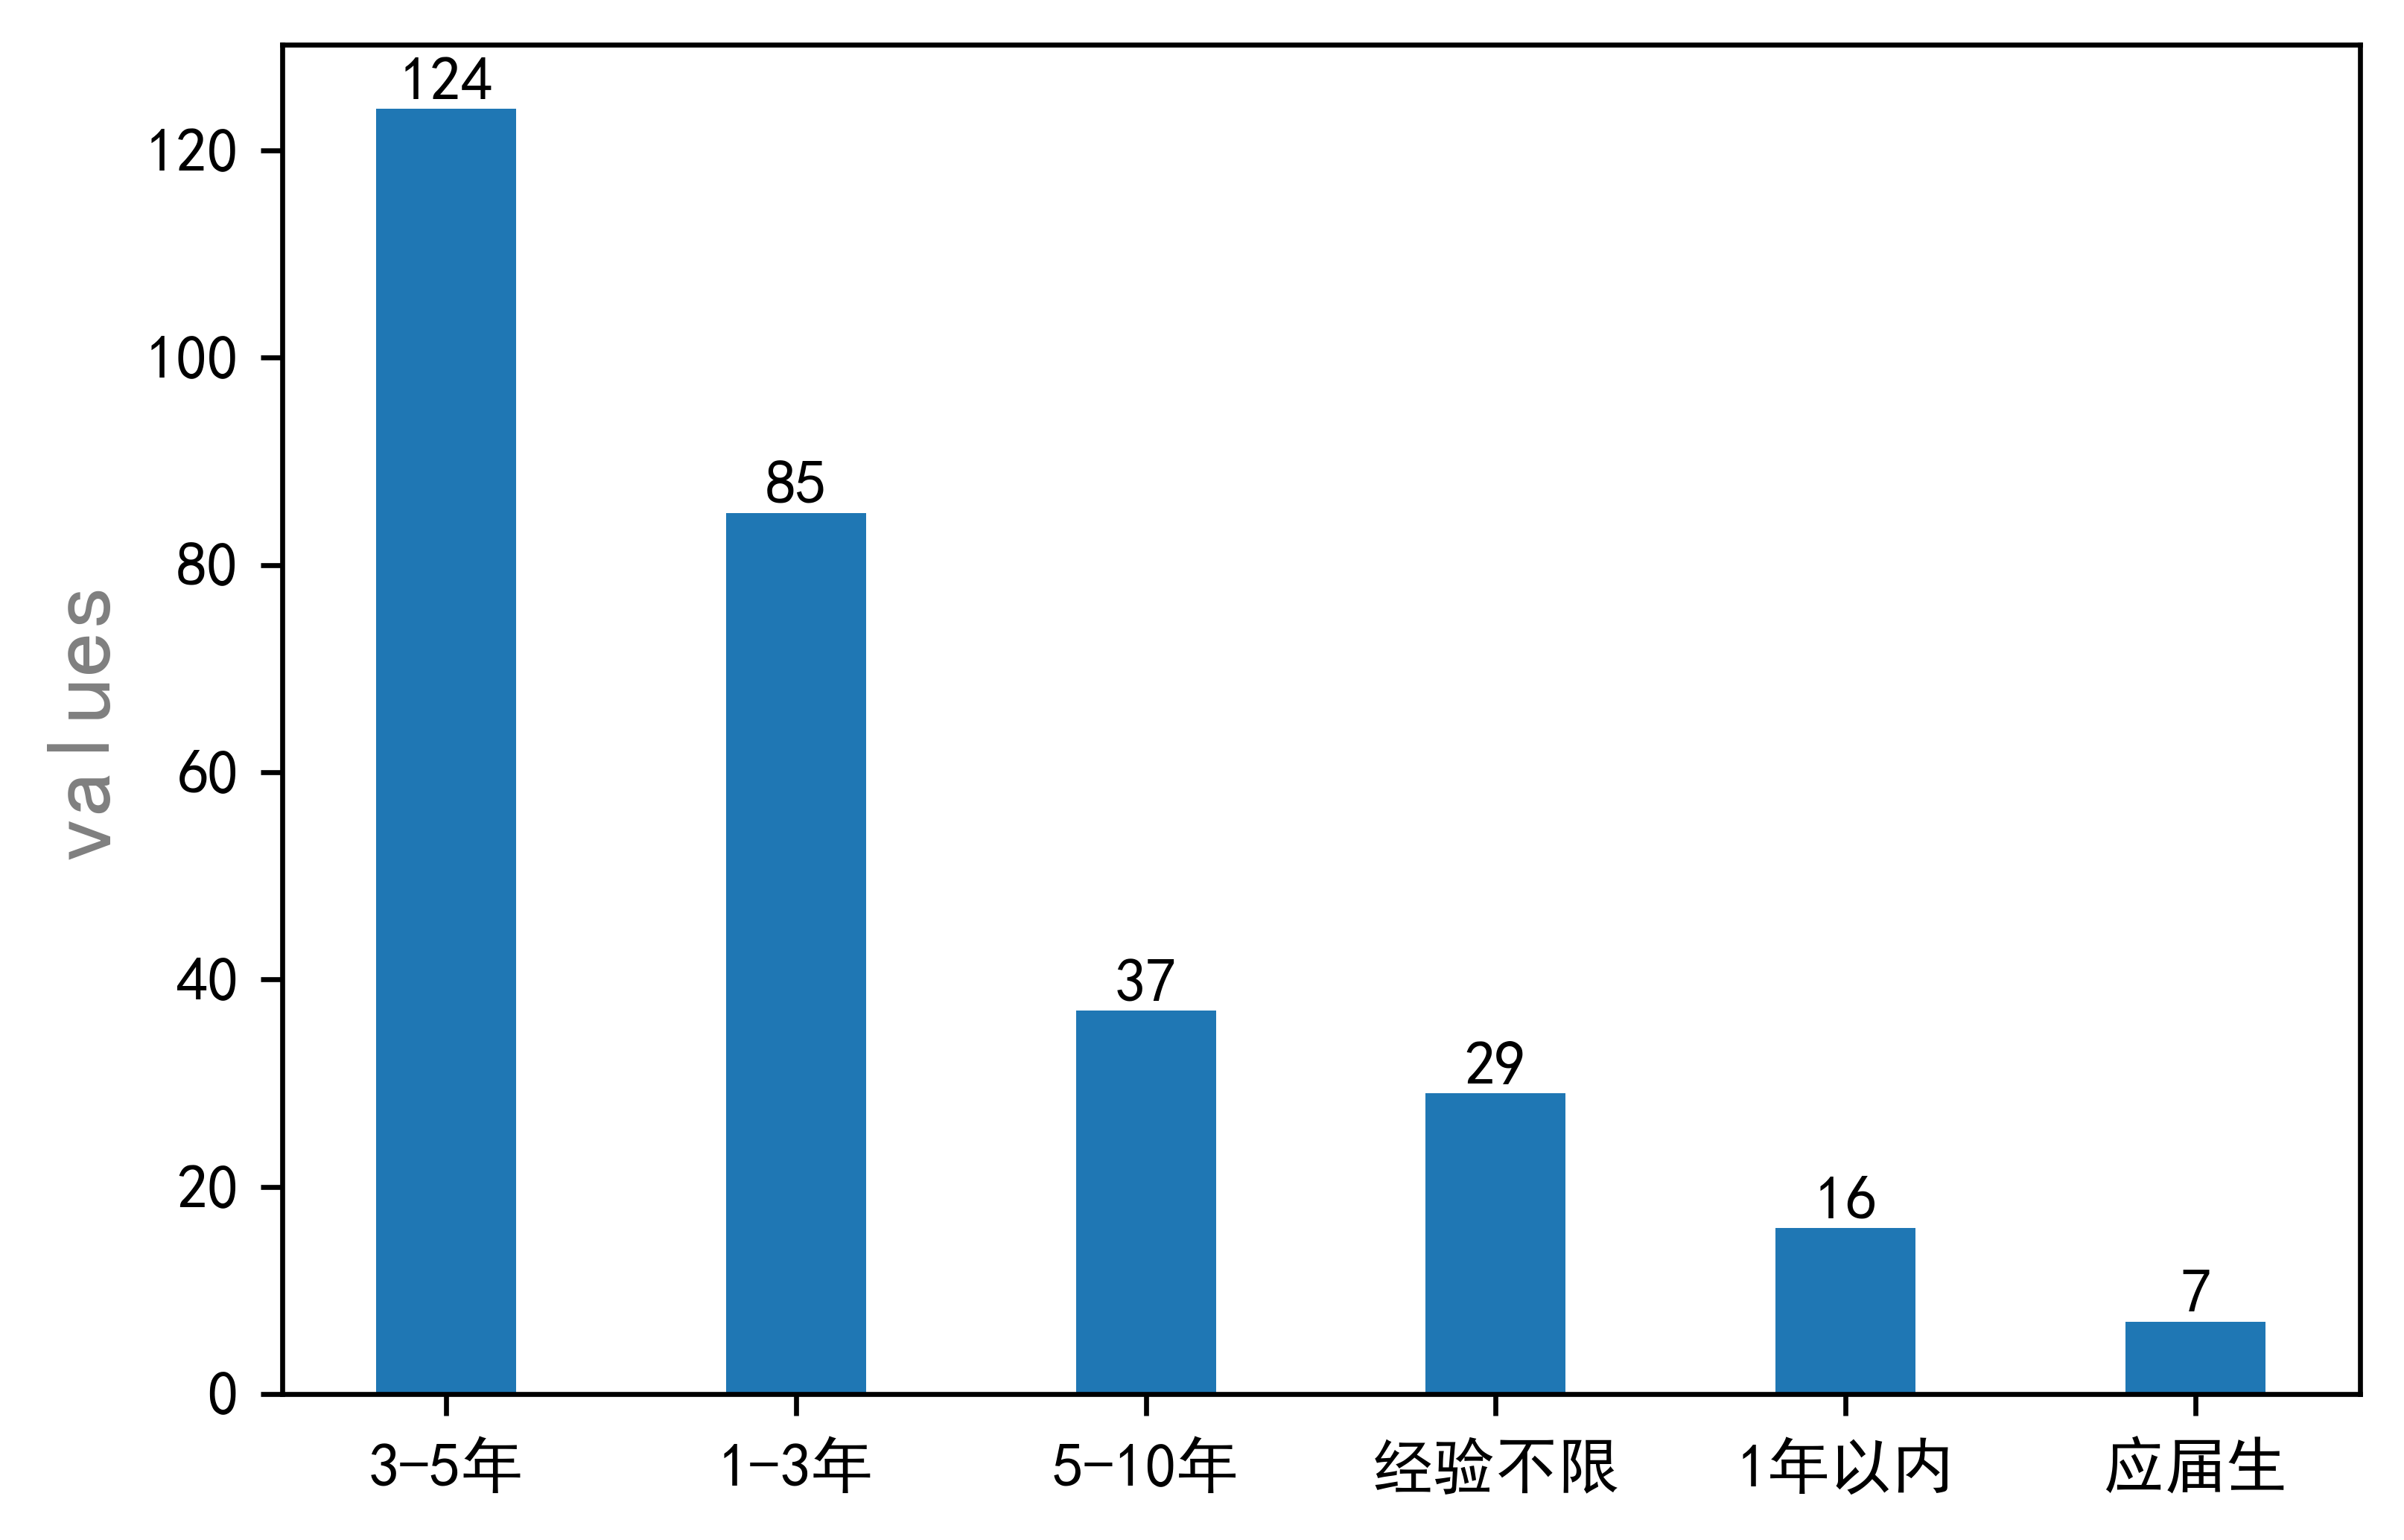

In [135]:
x4=list(data_all['经验年限'].value_counts().index)
y4=list(data_all['经验年限'].value_counts().values)
plt.close()
plt.figure(dpi=600)
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.ylabel('values',font2)
plt.bar(x4,y4,width=0.4)
for x4,y4 in zip(x4,y4):
    plt.text(x4,y4+0.1,y4, ha='center',va='bottom')
plt.savefig(r"D:\githubProject\bosszhipin\经验年限要求分布图.png")

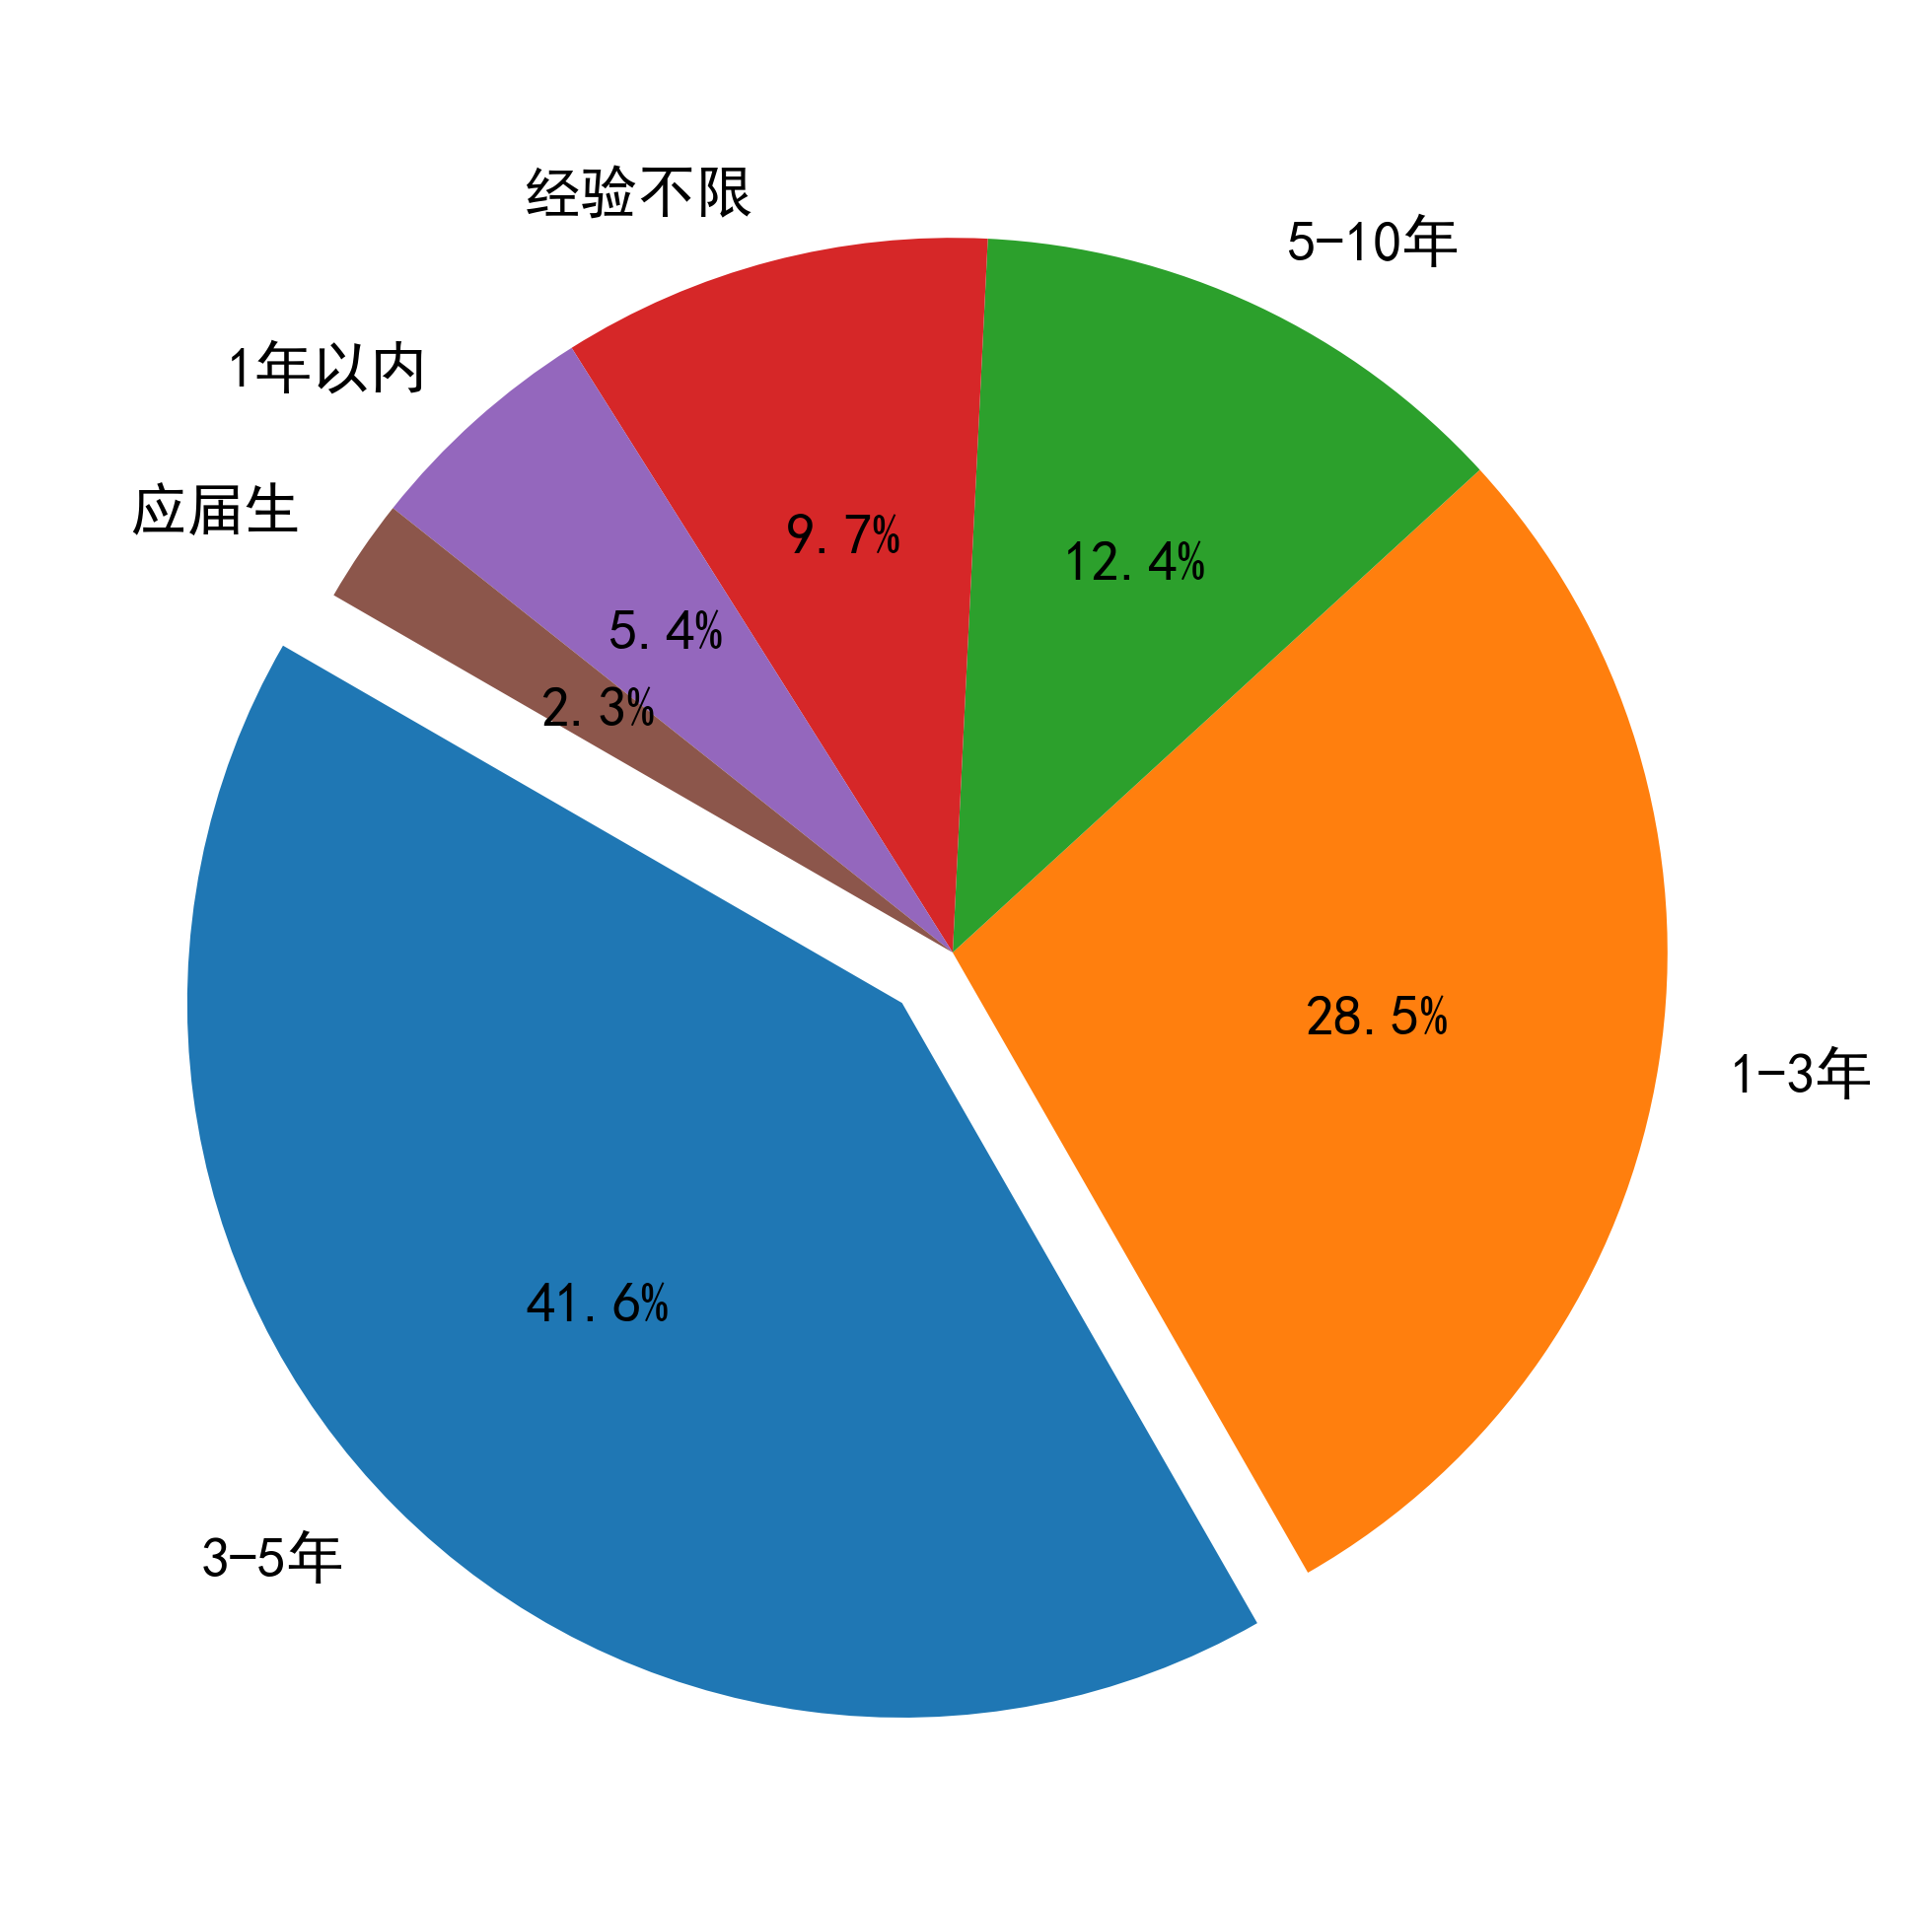

In [134]:
plt.close()

plt.figure(dpi=600)
x4=list(data_all['经验年限'].value_counts().index)
y4=list(data_all['经验年限'].value_counts().values)
font2 = {
'weight' : 'normal',
'size'   : 10}
explode = (0.1,0,0,0,0,0)
plt.pie(y4,explode=explode,labels=x4,autopct='%1.1f%%',shadow=False,startangle=150,textprops=font2)
plt.savefig(r"D:\githubProject\bosszhipin\经验年限要求占比图-饼图.png")

# 学历要求分析

In [139]:
data_all['学历要求'].value_counts()

本科      231
大专       36
硕士       17
学历不限     13
Name: 学历要求, dtype: int64

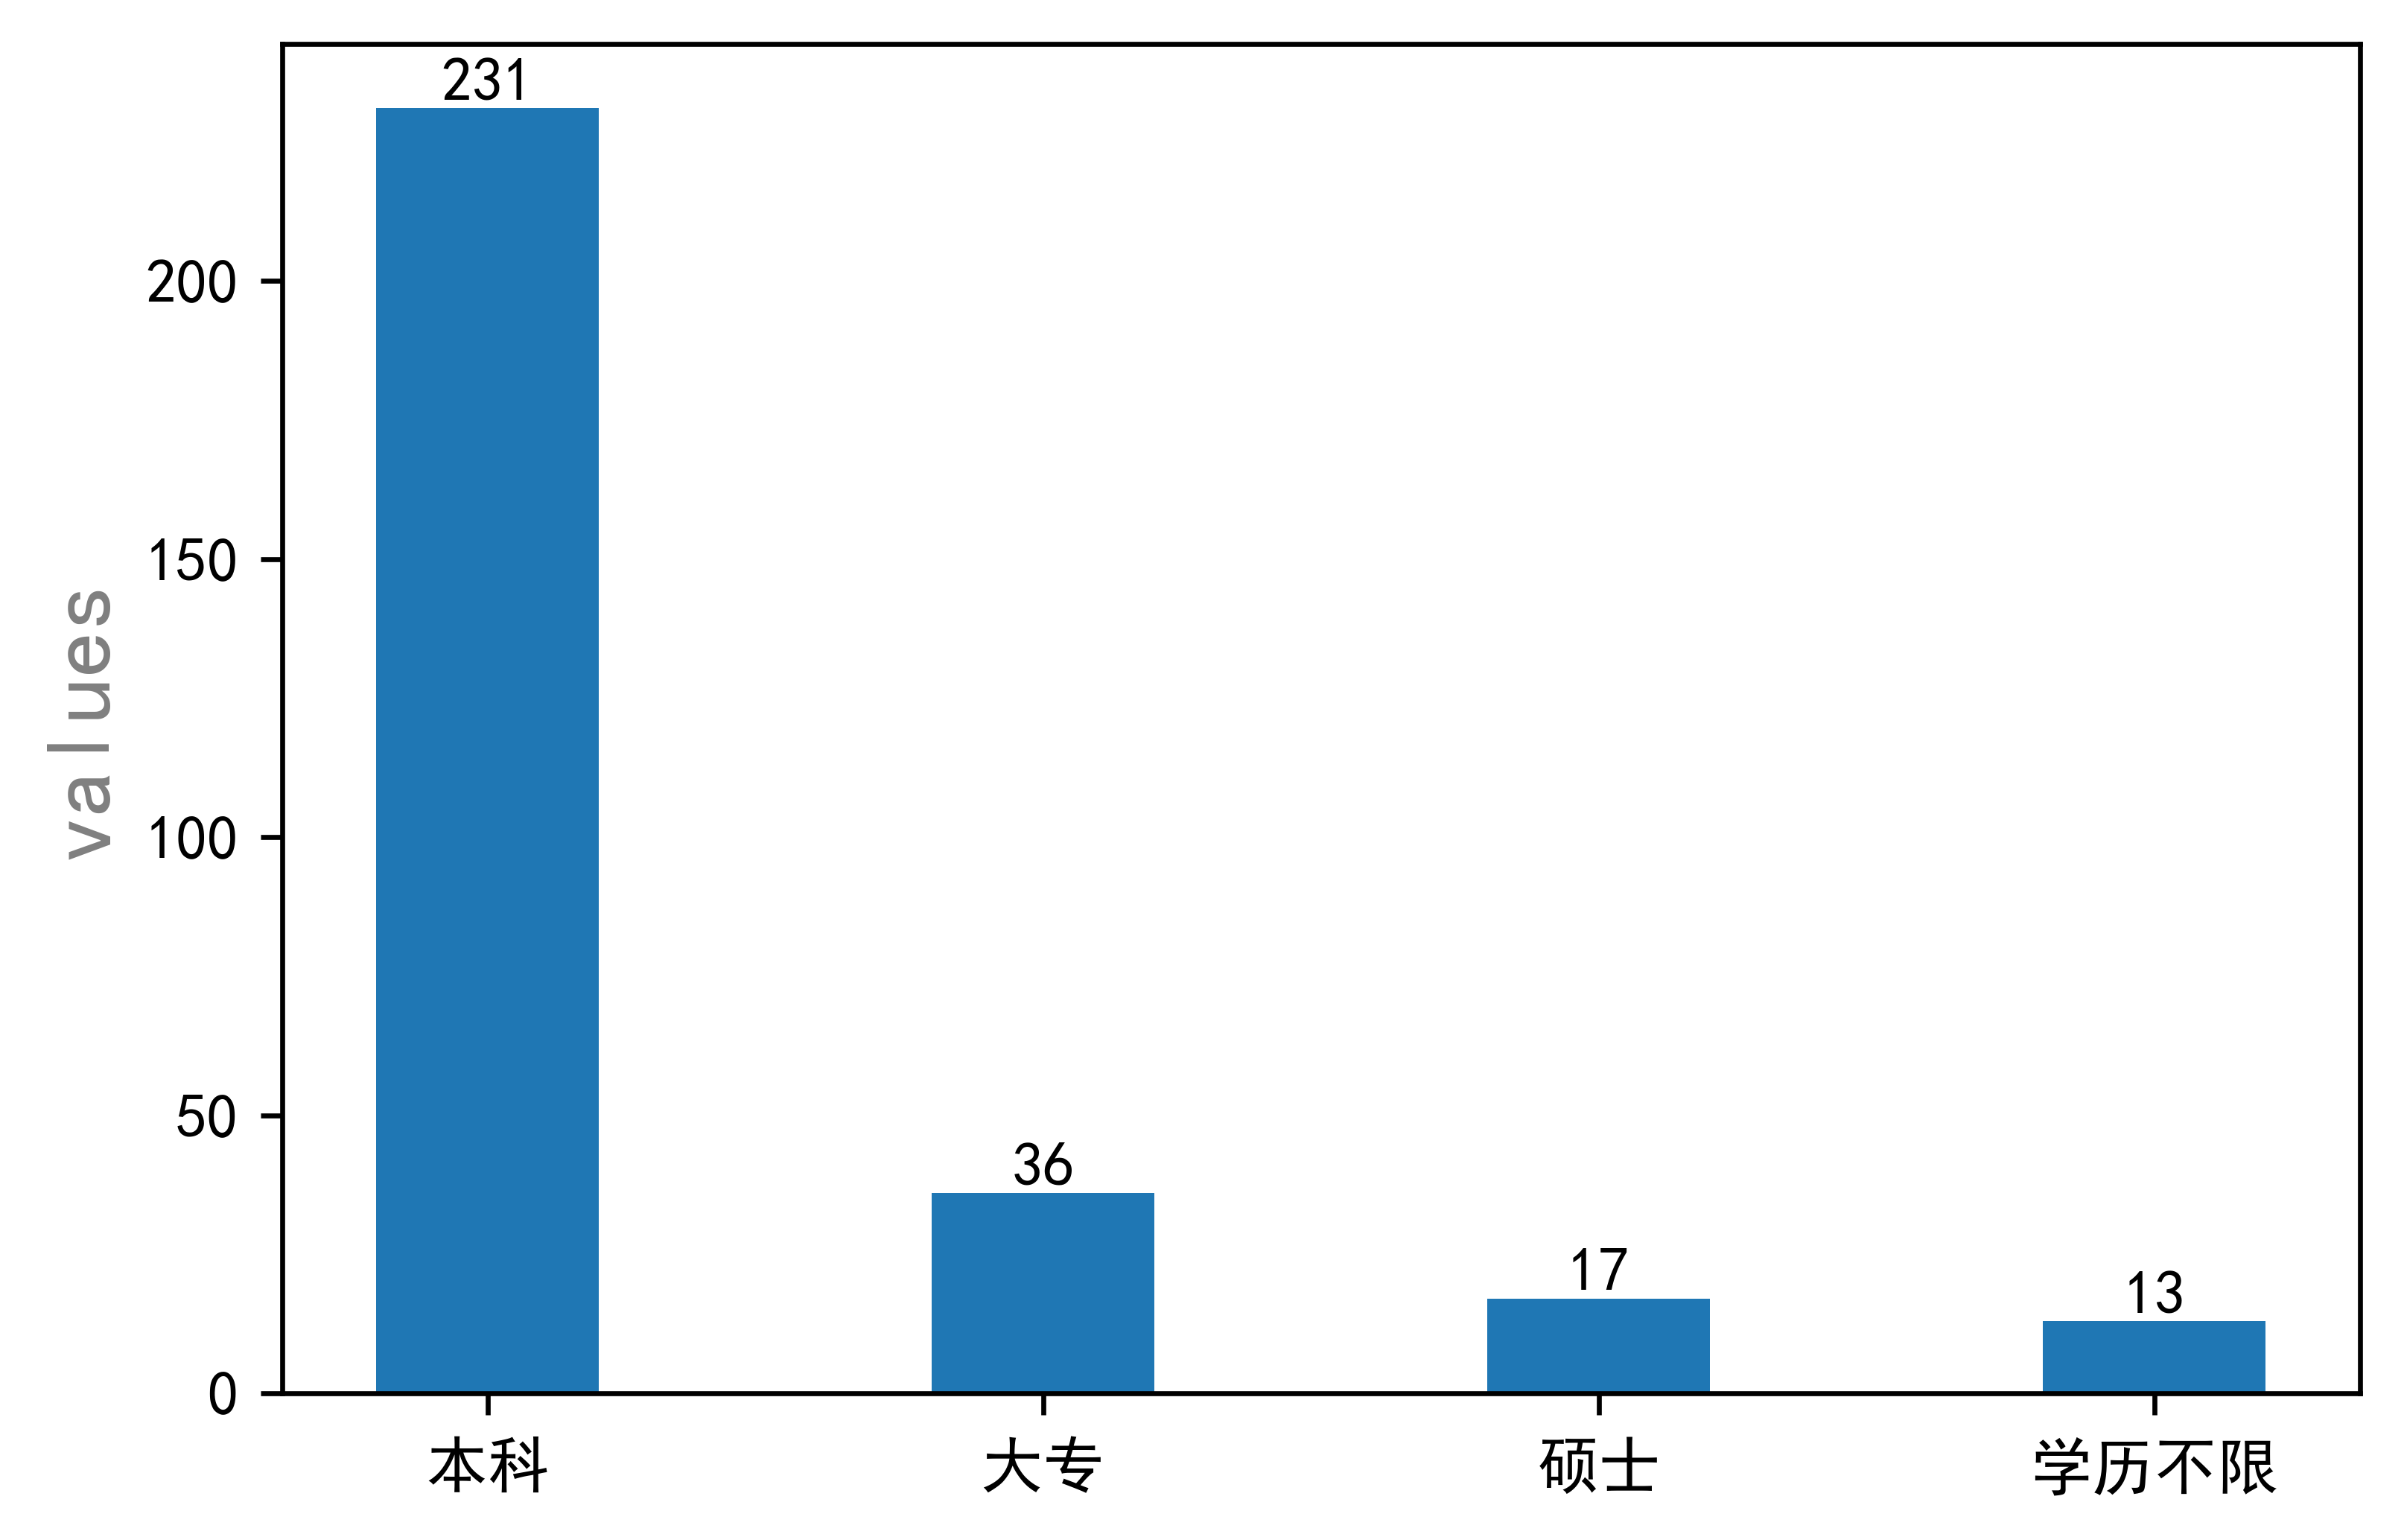

In [140]:
x4=list(data_all['学历要求'].value_counts().index)
y4=list(data_all['学历要求'].value_counts().values)
plt.close()
plt.figure(dpi=600)
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.ylabel('values',font2)
plt.bar(x4,y4,width=0.4)
for x4,y4 in zip(x4,y4):
    plt.text(x4,y4+0.1,y4, ha='center',va='bottom')
plt.savefig(r"D:\githubProject\bosszhipin\学历要求分布图.png")

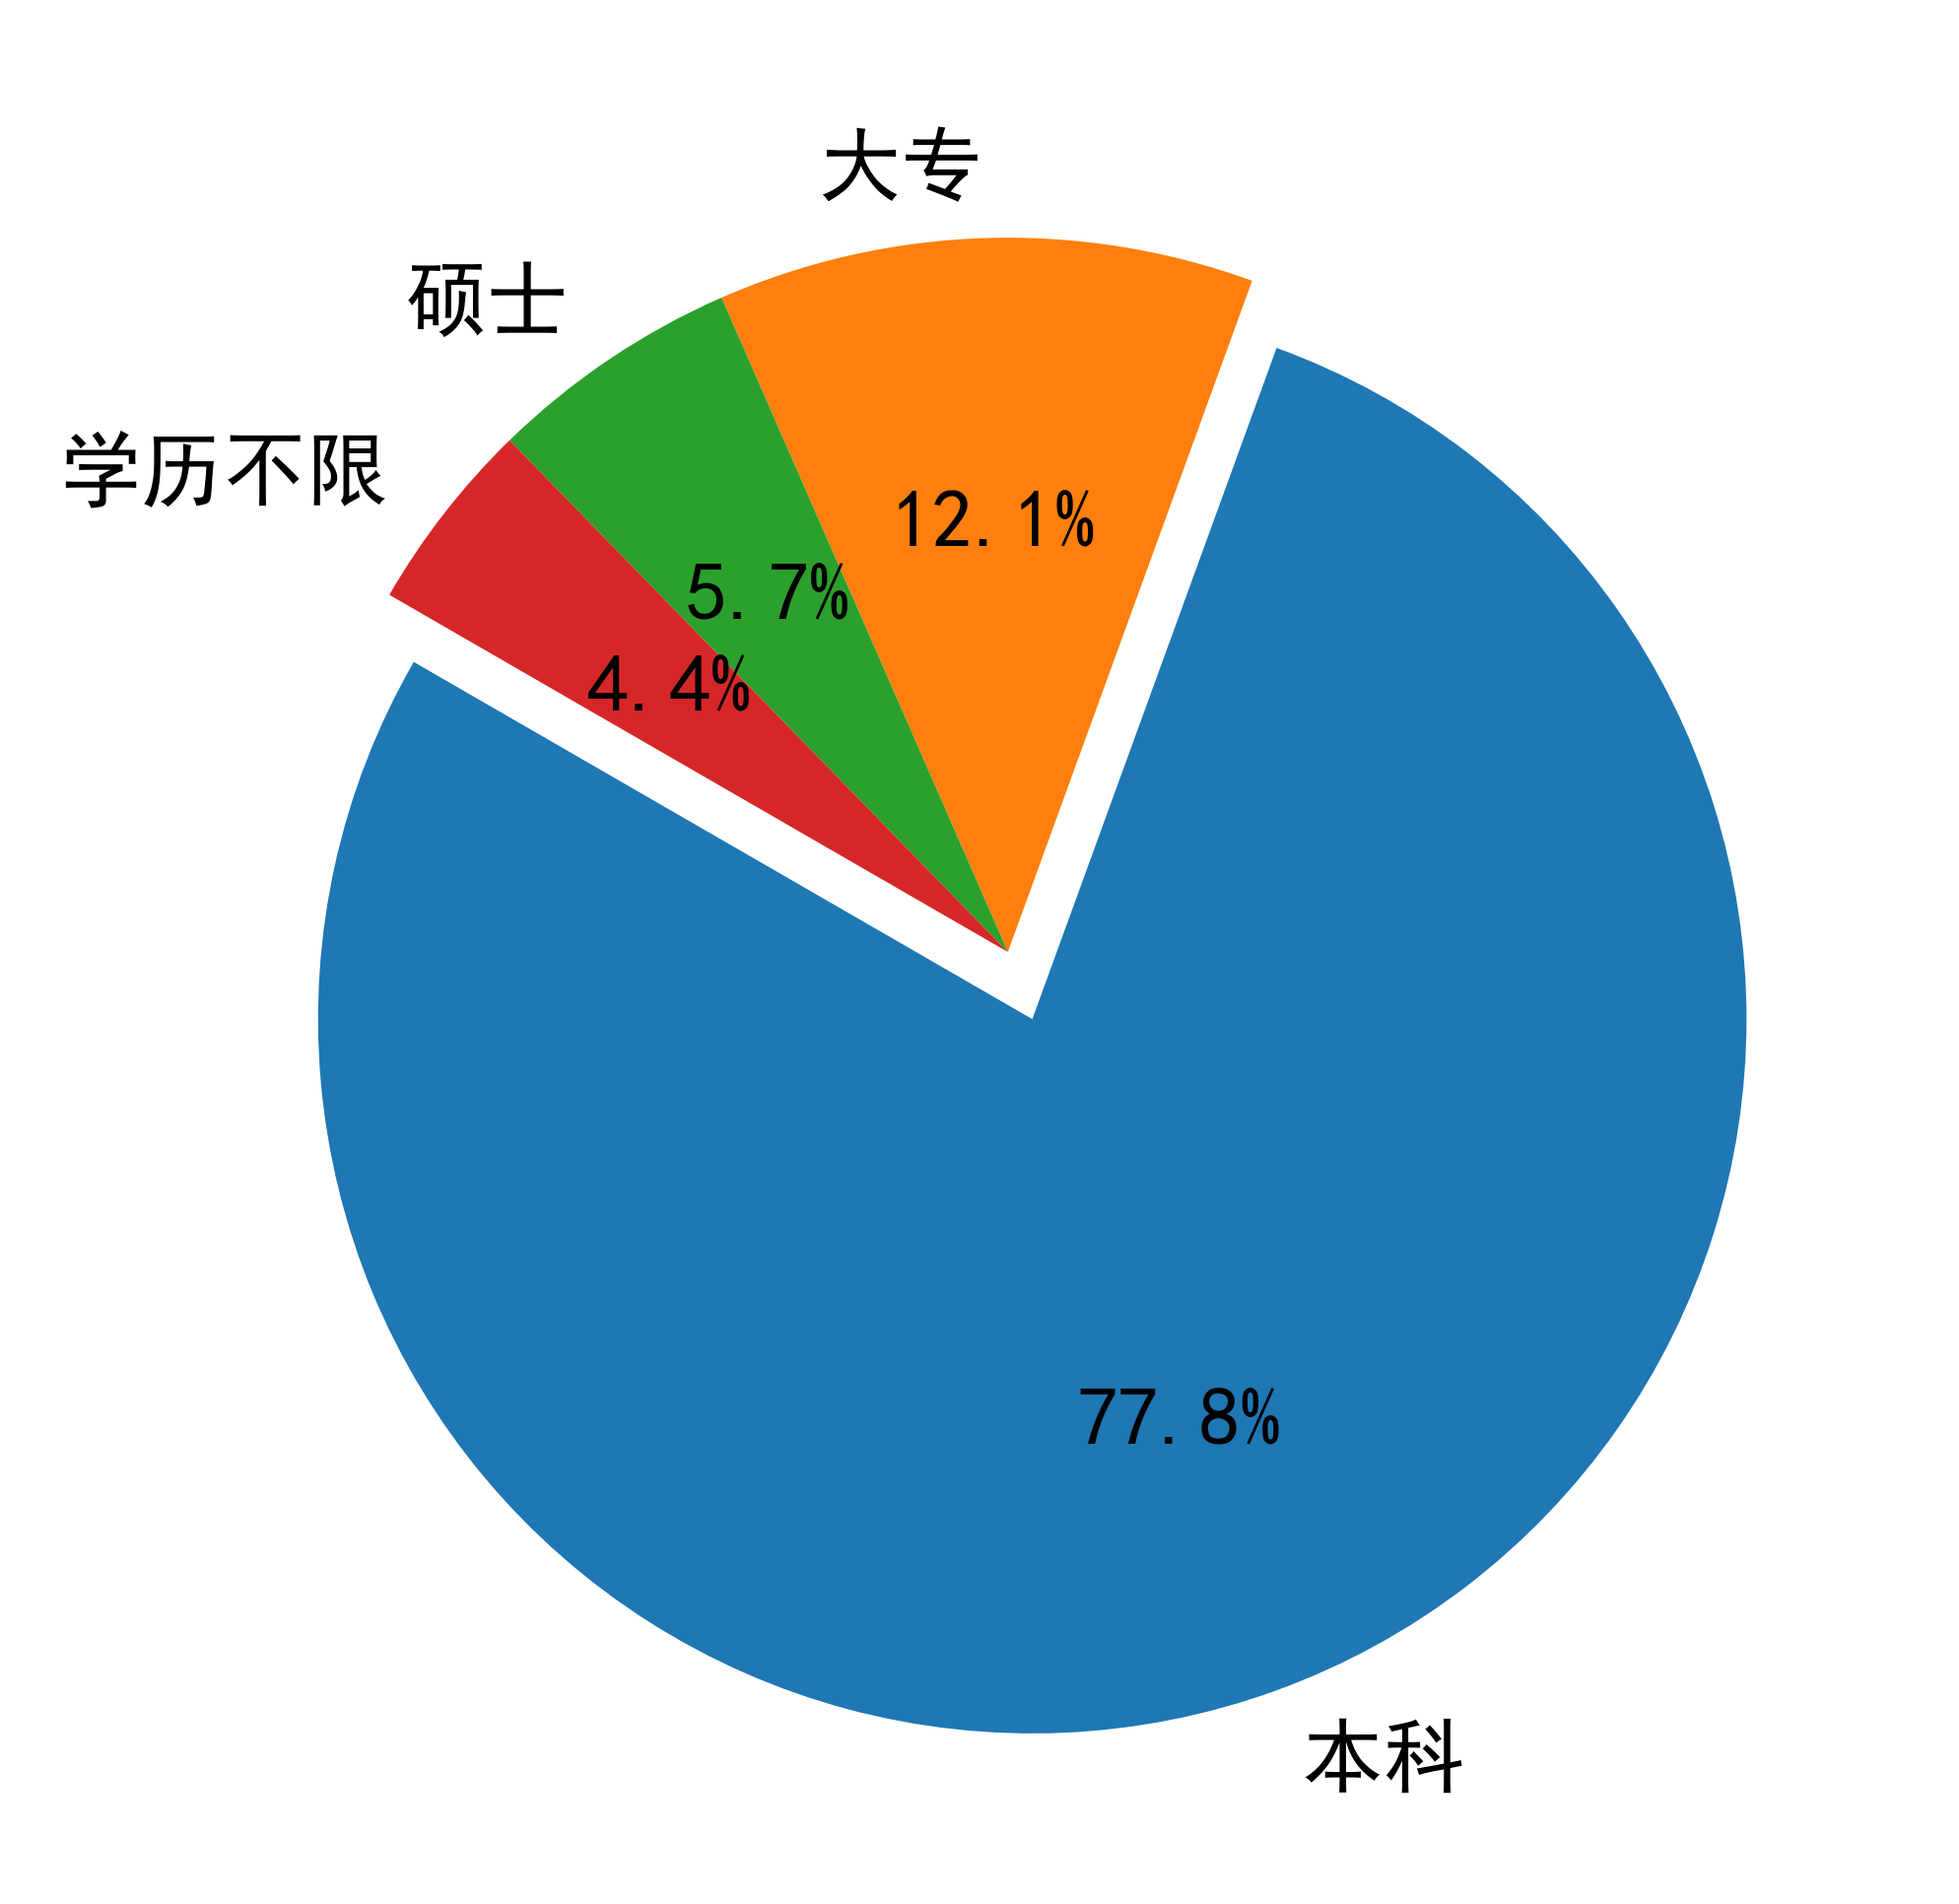

In [141]:
plt.close()

plt.figure(dpi=600)
x4=list(data_all['学历要求'].value_counts().index)
y4=list(data_all['学历要求'].value_counts().values)
font2 = {
'weight' : 'normal',
'size'   : 10}
explode = (0.1,0,0,0)
plt.pie(y4,explode=explode,labels=x4,autopct='%1.1f%%',shadow=False,startangle=150,textprops=font2)
plt.savefig(r"D:\githubProject\bosszhipin\学历要求占比图-饼图.png")

# 薪资

In [246]:
data_all['薪资水平']

0          30-60K
1          25-50K
2          18-30K
3          25-35K
4          22-44K
5          15-25K
6          40-60K
7          20-40K
8          20-40K
9      20-30K·13薪
10          6-10K
11          6-10K
12           7-9K
13         20-40K
14         25-40K
15         16-30K
16         25-30K
17         15-30K
18           6-8K
19         30-60K
20          8-15K
21         15-30K
22          7-14K
23         30-60K
24          8-16K
25         24-40K
26         15-25K
27         20-35K
28     11-20K·13薪
29          5-10K
          ...    
270        15-27K
271         8-16K
272         8-16K
273        10-20K
274        10-20K
275        25-30K
276        15-25K
277        10-15K
278          8-9K
279        20-40K
280        15-22K
281         8-15K
282        18-35K
283        15-30K
284        20-30K
285        15-25K
286        12-20K
287        30-60K
288         7-10K
289        20-40K
290          4-6K
291        25-35K
292         9-13K
293        16-22K
294       

In [247]:
data_all['薪资水平']=data_all['薪资水平'].str.extract(r'(.*)K')

print(data_all.head())

     公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求   薪资水平         工作地点
0    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  30-60  深圳 宝安区 宝安中心
1    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  25-50    深圳 福田区 梅林
2  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  18-30    深圳 罗湖区 国贸
3      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  25-35   深圳 南山区 科技园
4    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  22-44  深圳 宝安区 宝安中心


In [248]:
data_all.insert(8,'薪资下限',data_all['薪资水平'].str.extract(r'(.*)-'))
print(data_all.head())

     公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求   薪资水平 薪资下限  \
0    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  30-60   30   
1    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  25-50   25   
2  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  18-30   18   
3      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  25-35   25   
4    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  22-44   22   

          工作地点  
0  深圳 宝安区 宝安中心  
1    深圳 福田区 梅林  
2    深圳 罗湖区 国贸  
3   深圳 南山区 科技园  
4  深圳 宝安区 宝安中心  


In [249]:
data_all.insert(8,'薪资上限',data_all['薪资水平'].str.extract(r'-(.*)'))
print(data_all.head())

     公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求   薪资水平 薪资上限 薪资下限  \
0    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  30-60   60   30   
1    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  25-50   50   25   
2  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  18-30   30   18   
3      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  25-35   35   25   
4    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  22-44   44   22   

          工作地点  
0  深圳 宝安区 宝安中心  
1    深圳 福田区 梅林  
2    深圳 罗湖区 国贸  
3   深圳 南山区 科技园  
4  深圳 宝安区 宝安中心  


In [251]:
print(data_all.info())
data_all['薪资上限']= data_all['薪资上限'].astype('float')
data_all['薪资下限']= data_all['薪资下限'].astype('float')
data_all['薪资水平'] = (data_all['薪资上限']+data_all['薪资下限'])/2
print(data_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
公司名称    300 non-null object
融资情况    291 non-null object
公司规模    300 non-null object
所属行业    291 non-null object
岗位名称    300 non-null object
经验年限    299 non-null object
学历要求    298 non-null object
薪资水平    299 non-null object
薪资上限    299 non-null object
薪资下限    299 non-null object
工作地点    299 non-null object
dtypes: object(11)
memory usage: 25.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
公司名称    300 non-null object
融资情况    291 non-null object
公司规模    300 non-null object
所属行业    291 non-null object
岗位名称    300 non-null object
经验年限    299 non-null object
学历要求    298 non-null object
薪资水平    299 non-null float64
薪资上限    299 non-null float64
薪资下限    299 non-null float64
工作地点    299 non-null object
dtypes: float64(3), object(8)
memory usage: 25.9+ KB
None


     公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求  薪资水平  薪资上限  薪资下限  \
0    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  75.0  60.0  30.0   
1    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  62.5  50.0  25.0   
2  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  39.0  30.0  18.0   
3      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  47.5  35.0  25.0   
4    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  55.0  44.0  22.0   

          工作地点  
0  深圳 宝安区 宝安中心  
1    深圳 福田区 梅林  
2    深圳 罗湖区 国贸  
3   深圳 南山区 科技园  
4  深圳 宝安区 宝安中心  


In [145]:
a = pd.DataFrame(data_all['薪资水平'])
a.describe()

薪资水平
count  295.000000
mean    19.208475
std     11.115646
min      4.000000
25%     10.500000
50%     17.500000
75%     25.750000
max     60.000000

In [146]:
bins = [min(data_all['薪资水平'])-1,5,10,15,20,25,30,35,40,45,50,max(data_all['薪资水平']+1)]
labels = ['(0-5]k','(5-10]k','(10-15]k','(15-20]k','(20-25]k','(25-30]k','(30-35]k','(35-40]k','(40-45]k','(25-0]k','50+k']
data_all['薪资分层'] = pd.cut(data_all.薪资水平,bins,labels=labels)
print(data_all.head())




  工作区域 具体工作地点    公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求  薪资水平  \
0  宝安区   宝安中心    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  45.0   
1  福田区     梅林    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  37.5   
2  罗湖区     国贸  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  24.0   
3  南山区    科技园      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  30.0   
4  宝安区   宝安中心    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  33.0   

       薪资分层  
0  (40-45]k  
1  (35-40]k  
2  (20-25]k  
3  (25-30]k  
4  (30-35]k  


(10-15]k    59
(5-10]k     55
(15-20]k    54
(25-30]k    37
(20-25]k    35
(0-5]k      18
(40-45]k    14
(35-40]k    12
(30-35]k     8
(25-0]k      2
50+k         1
Name: 薪资分层, dtype: int64


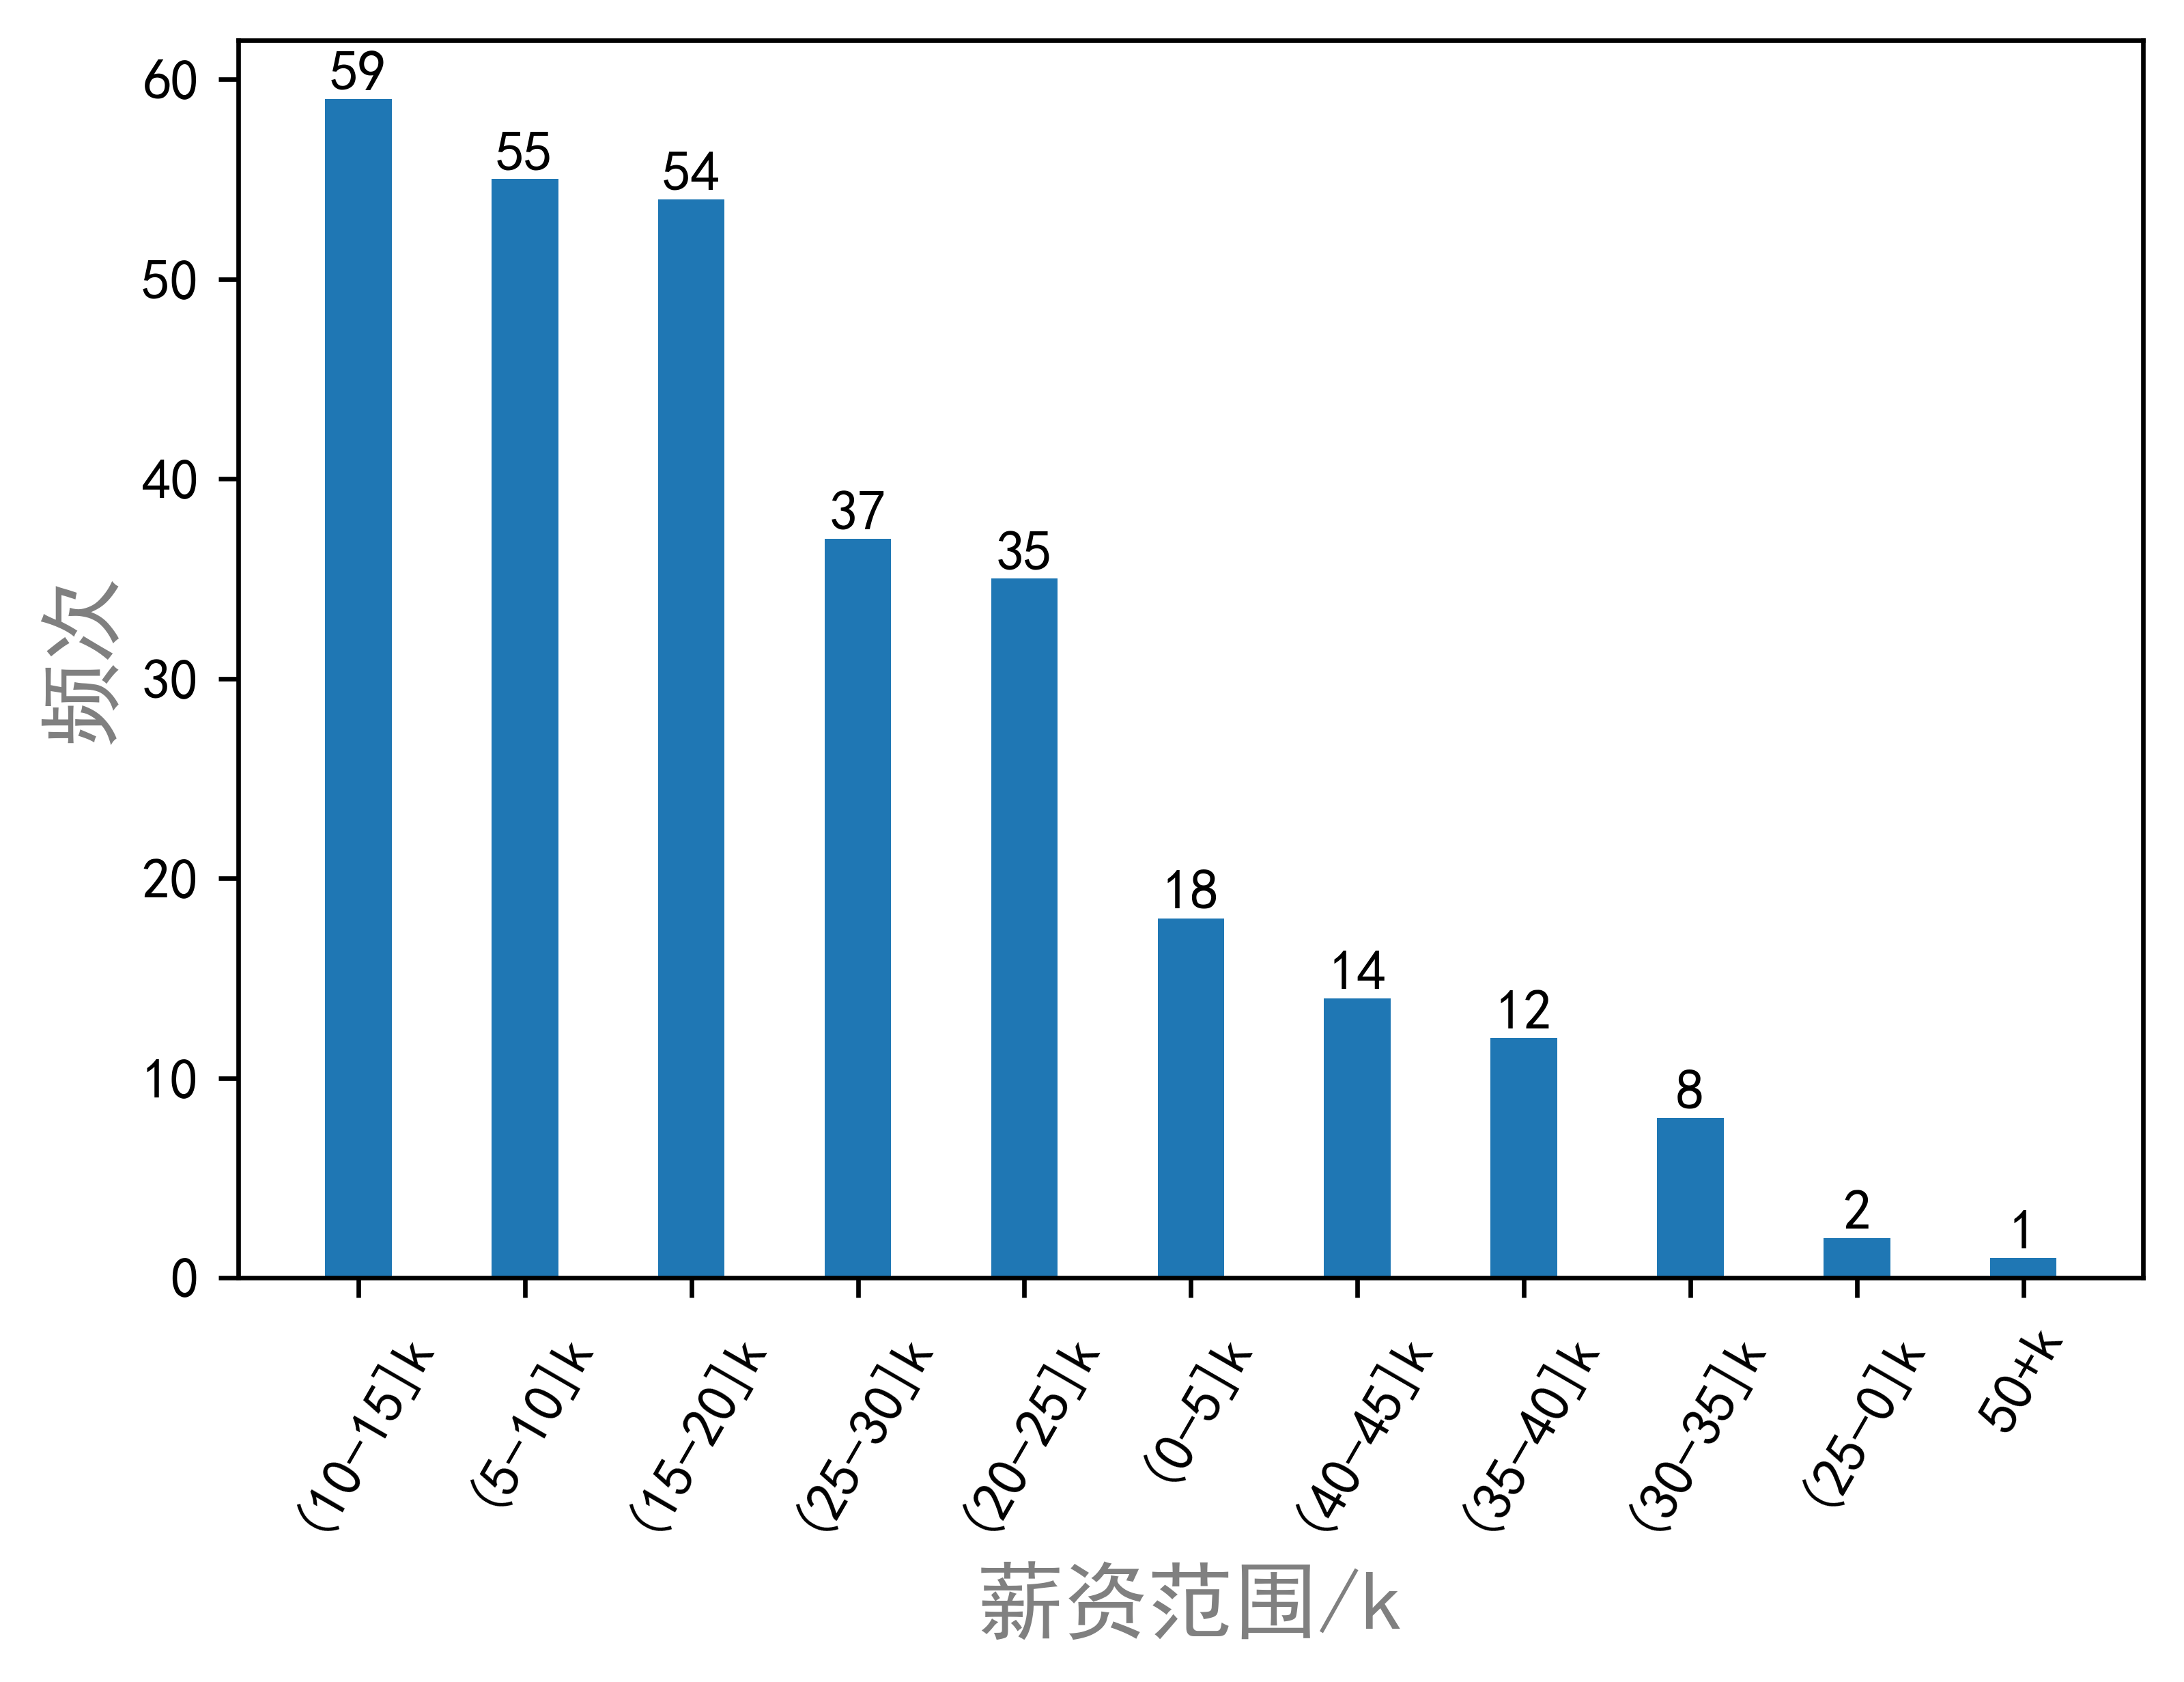

In [148]:
plt.figure(dpi=600)
x4=list(data_all['薪资分层'].value_counts().index)
y4=list(data_all['薪资分层'].value_counts().values)
print(data_all['薪资分层'].value_counts())
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.ylabel('频次',font2)
plt.xlabel('薪资范围/k',font2)
plt.bar(x4,y4,width=0.4)
for x4,y4 in zip(x4,y4):
    plt.text(x4,y4+0.1,y4, ha='center',va='bottom')
plt.xticks(rotation=60)
plt.savefig(r"D:\githubProject\bosszhipin\data\薪资水平分布图.png")


In [161]:
data_all.loc[data_all['薪资分层'] == '50+k']


工作区域 具体工作地点   公司名称   融资情况        公司规模 所属行业             岗位名称   经验年限 学历要求  \
168  福田区     梅林  货拉拉科技  D轮及以上  1000-9999人  互联网  资深数据分析师(J11772)  5-10年   本科   

     薪资水平  薪资分层  
168  60.0  50+k

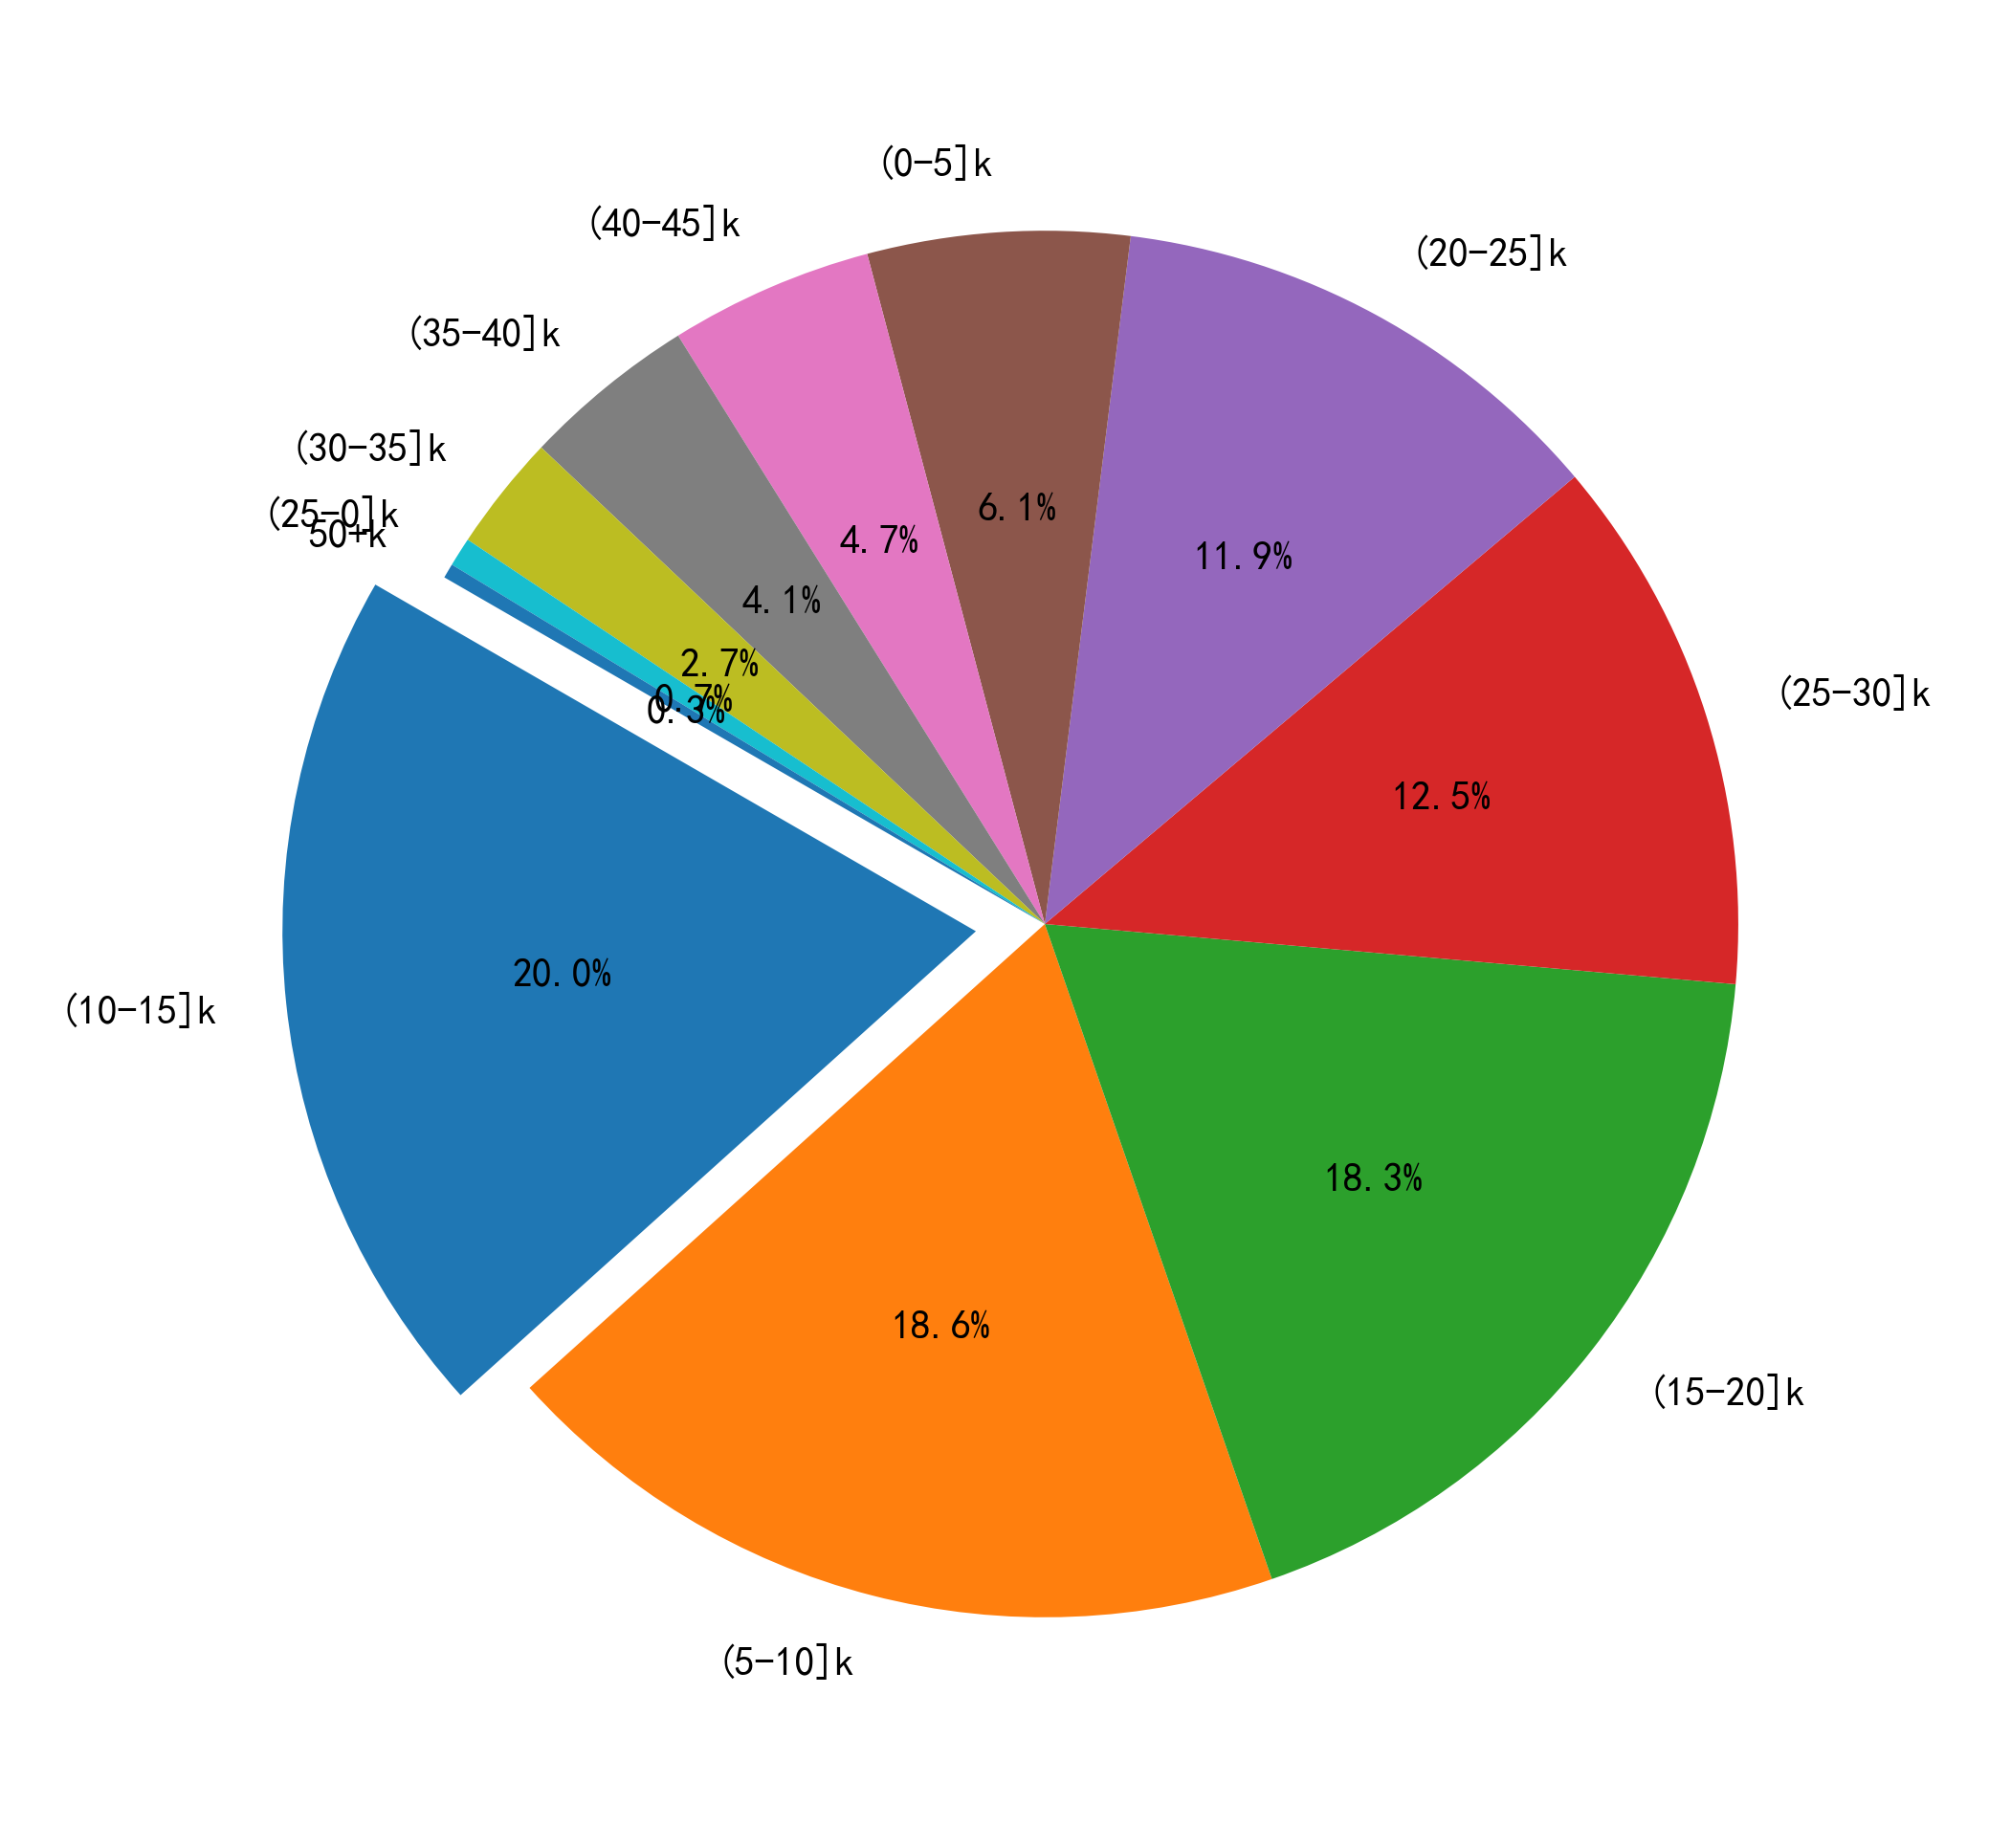

In [164]:
plt.figure(dpi=600)
x=list(data_all['薪资分层'].value_counts().index)
y=list(data_all['薪资分层'].value_counts().values)
a = '薪资分层'+"占比图"
path_file = "D:\\githubProject\\bosszhipin\\data\\"+str(a)+".png"
font2 = {
    'weight' : 'normal',
    'size'   :5}
explot = (0.1,0,0,0,0,0,0,0,0,0,0)
plt.pie(y,explode=explode,labels=x,autopct='%1.1f%%',shadow=False,startangle=150,textprops=font2)
plt.savefig(path_file)

# 工作地点

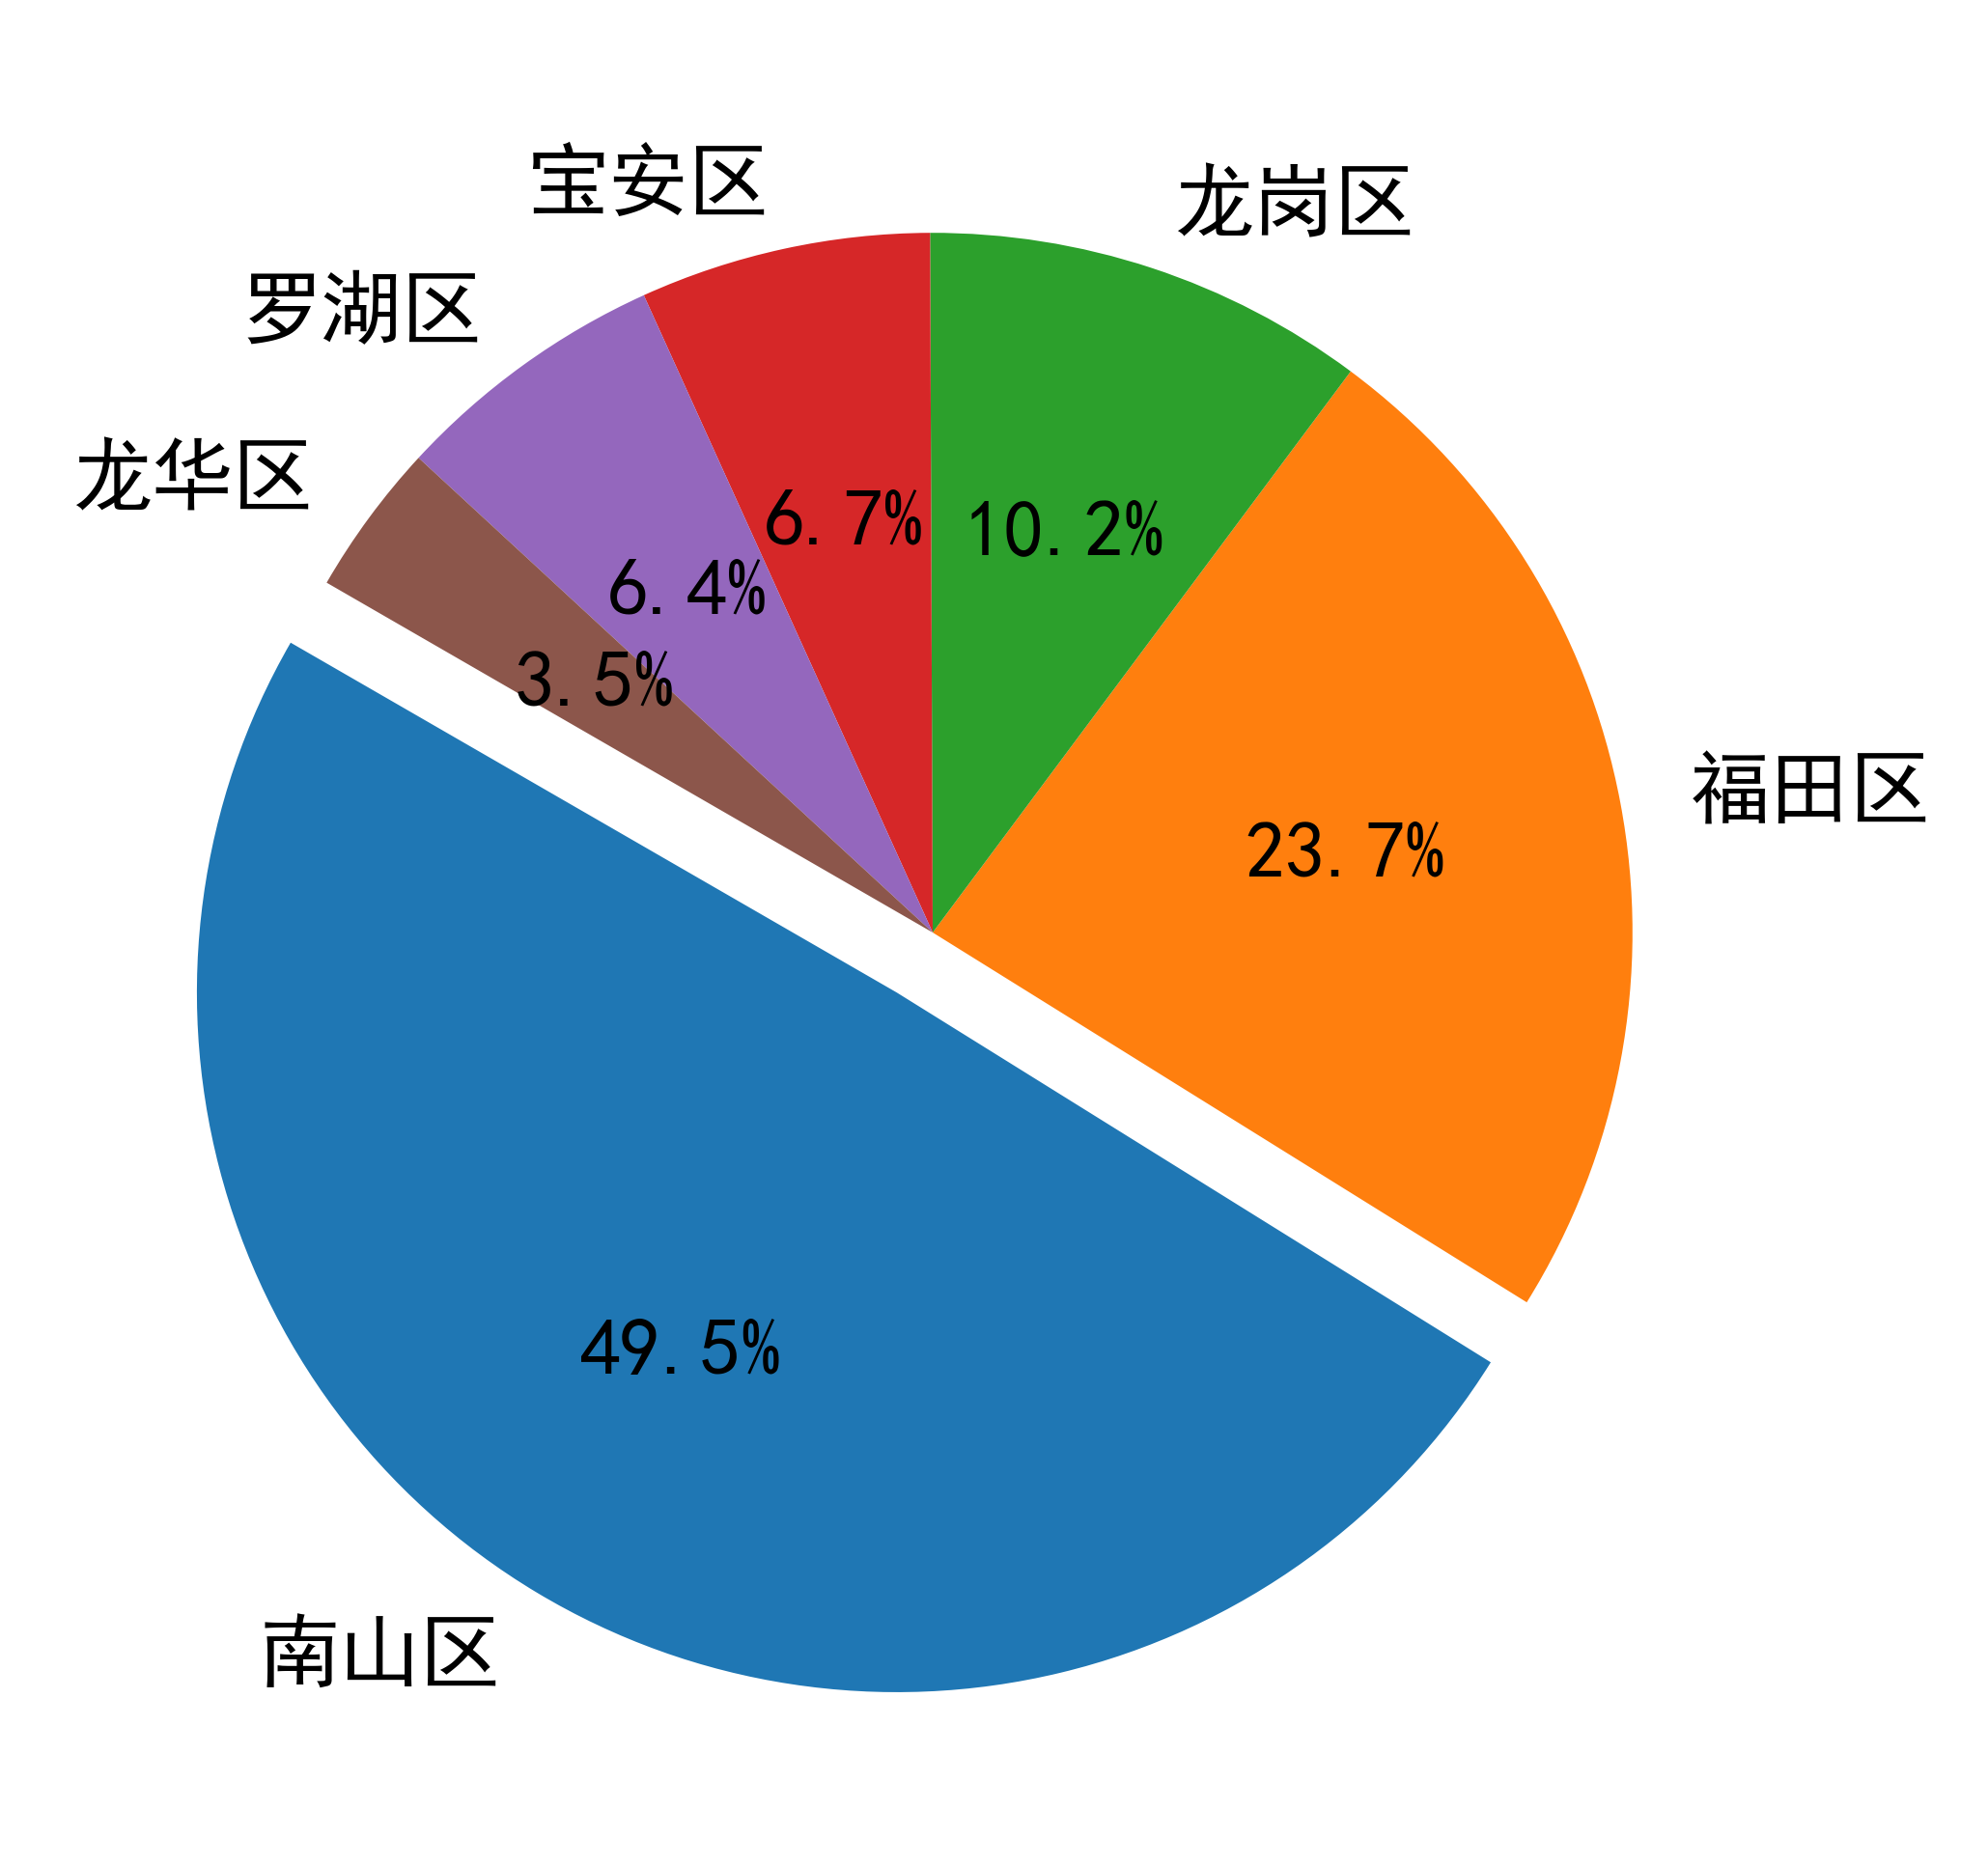

In [169]:
data_all['工作区域'].value_counts()
bar_plot('工作区域')
pie_plot('工作区域',(0.1,0,0,0,0,0))


  工作区域    公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求  薪资水平  薪资上限  \
0  宝安区    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  45.0  60.0   
1  福田区    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  37.5  50.0   
2  罗湖区  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  24.0  30.0   
3  南山区      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  30.0  35.0   
4  宝安区    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  33.0  44.0   

   薪资下限         工作地点      薪资分层  
0  30.0  深圳 宝安区 宝安中心  (40-45]k  
1  25.0    深圳 福田区 梅林  (35-40]k  
2  18.0    深圳 罗湖区 国贸  (20-25]k  
3  25.0   深圳 南山区 科技园  (25-30]k  
4  22.0  深圳 宝安区 宝安中心  (30-35]k  


In [292]:
print(data_all.head())
data_all['具体工作地点'] = data_all['工作地点'].str.extract(r'区 (.*)')
print(data_all.head())

  具体工作地点 工作区域    公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求  薪资水平  \
0   宝安中心  宝安区    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  45.0   
1     梅林  福田区    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  37.5   
2     国贸  罗湖区  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  24.0   
3    科技园  南山区      腾讯    已上市    10000人以上    互联网   数据分析师  5-10年   本科  30.0   
4   宝安中心  宝安区    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  33.0   

   薪资上限  薪资下限         工作地点      薪资分层  
0  60.0  30.0  深圳 宝安区 宝安中心  (40-45]k  
1  50.0  25.0    深圳 福田区 梅林  (35-40]k  
2  30.0  18.0    深圳 罗湖区 国贸  (20-25]k  
3  35.0  25.0   深圳 南山区 科技园  (25-30]k  
4  44.0  22.0  深圳 宝安区 宝安中心  (30-35]k  
  具体工作地点 工作区域    公司名称   融资情况        公司规模   所属行业    岗位名称   经验年限 学历要求  薪资水平  \
0   宝安中心  宝安区    vivo  不需要融资    10000人以上  移动互联网  数据分析经理  5-10年   本科  45.0   
1     梅林  福田区    vivo  不需要融资    10000人以上  移动互联网   数据分析师   3-5年   本科  37.5   
2     国贸  罗湖区  阿卡索外教网     C轮  1000-9999人   在线教育   数据分析师   3-5年   本科  24.

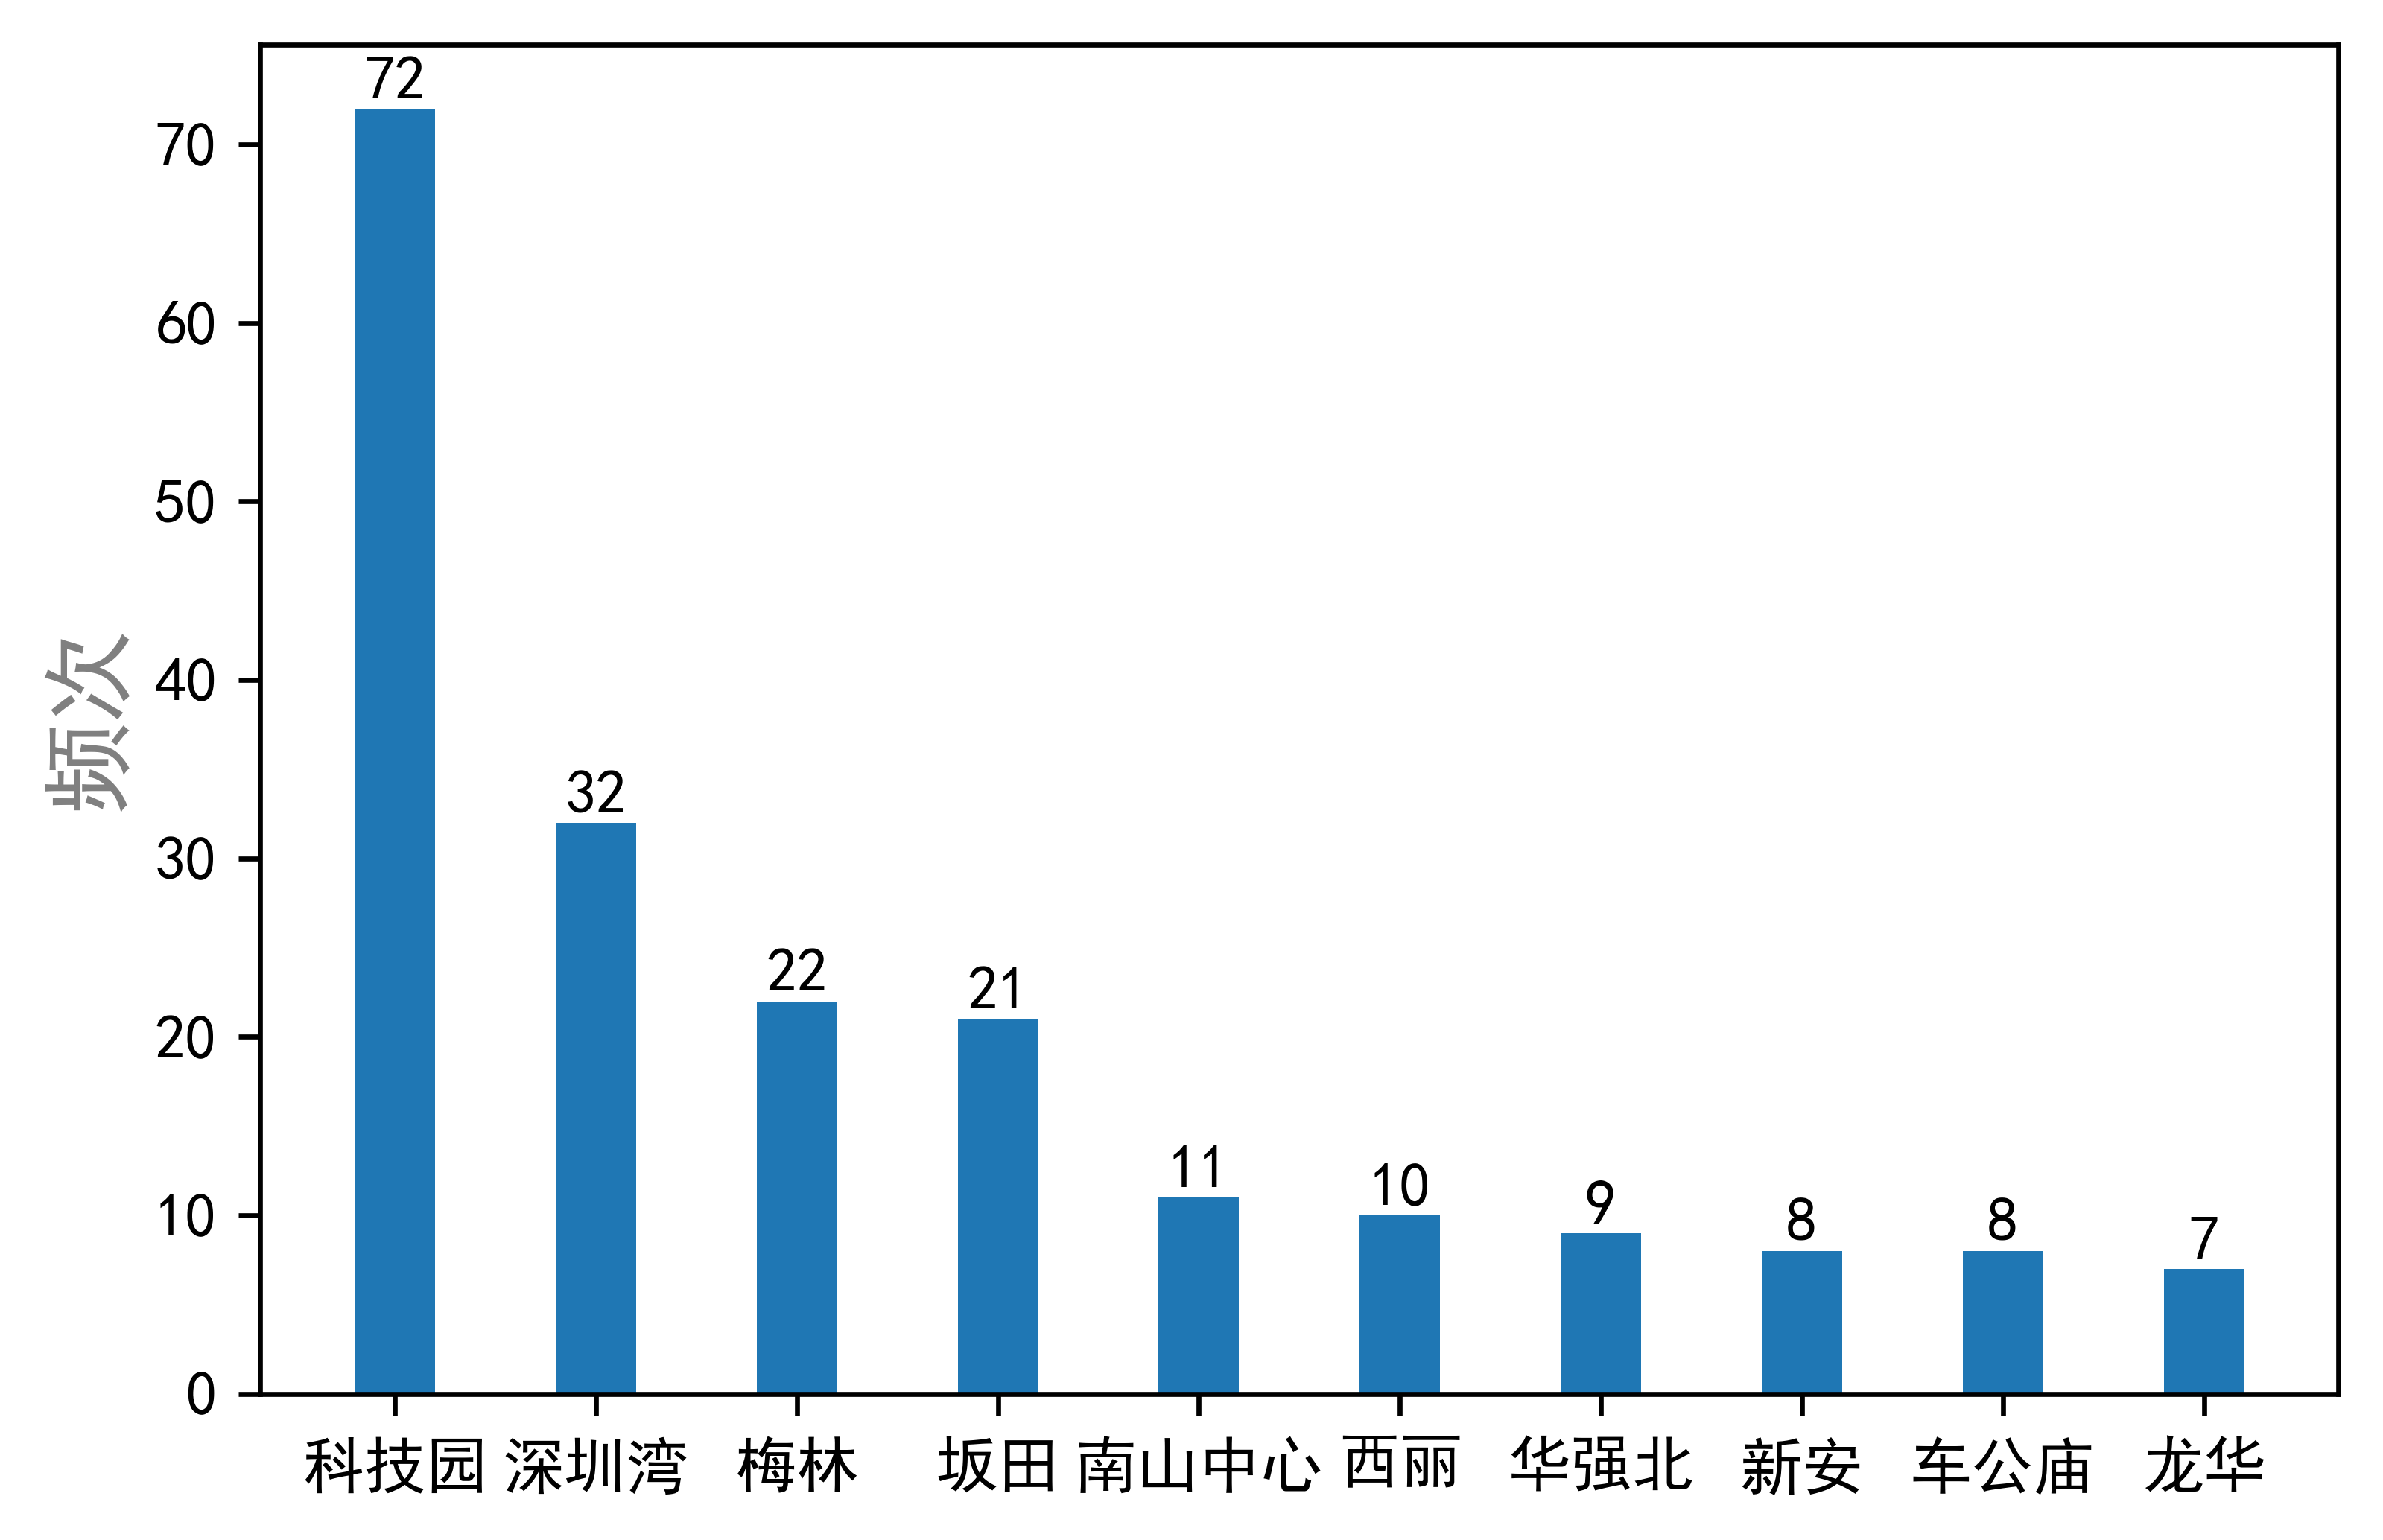

In [187]:
plt.figure(dpi=600)
x4=list(data_all['具体工作地点'].value_counts().index[0:10])
y4=list(data_all['具体工作地点'].value_counts().values[0:10])
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.ylabel('频次',font2)
plt.bar(x4,y4,width=0.4)
for x4,y4 in zip(x4,y4):
    plt.text(x4,y4+0.1,y4, ha='center',va='bottom')
plt.savefig(r"D:\githubProject\bosszhipin\data\具体工作地点排行分布图.png")

KeyError: "None of [Int64Index([72, 32, 11, 10, 6, 2, 2, 2, 2, 1], dtype='int64')] are in the [columns]"

<Figure size 3600x2400 with 0 Axes>

In [183]:
a = pd.DataFrame(data_all.loc[data_all['工作区域']=='南山区'])

科技园     72
深圳湾     32
南山中心    11
西丽      10
南头       6
南油       2
后海       2
新安       2
龙华       2
华侨城      1
Name: 具体工作地点, dtype: int64


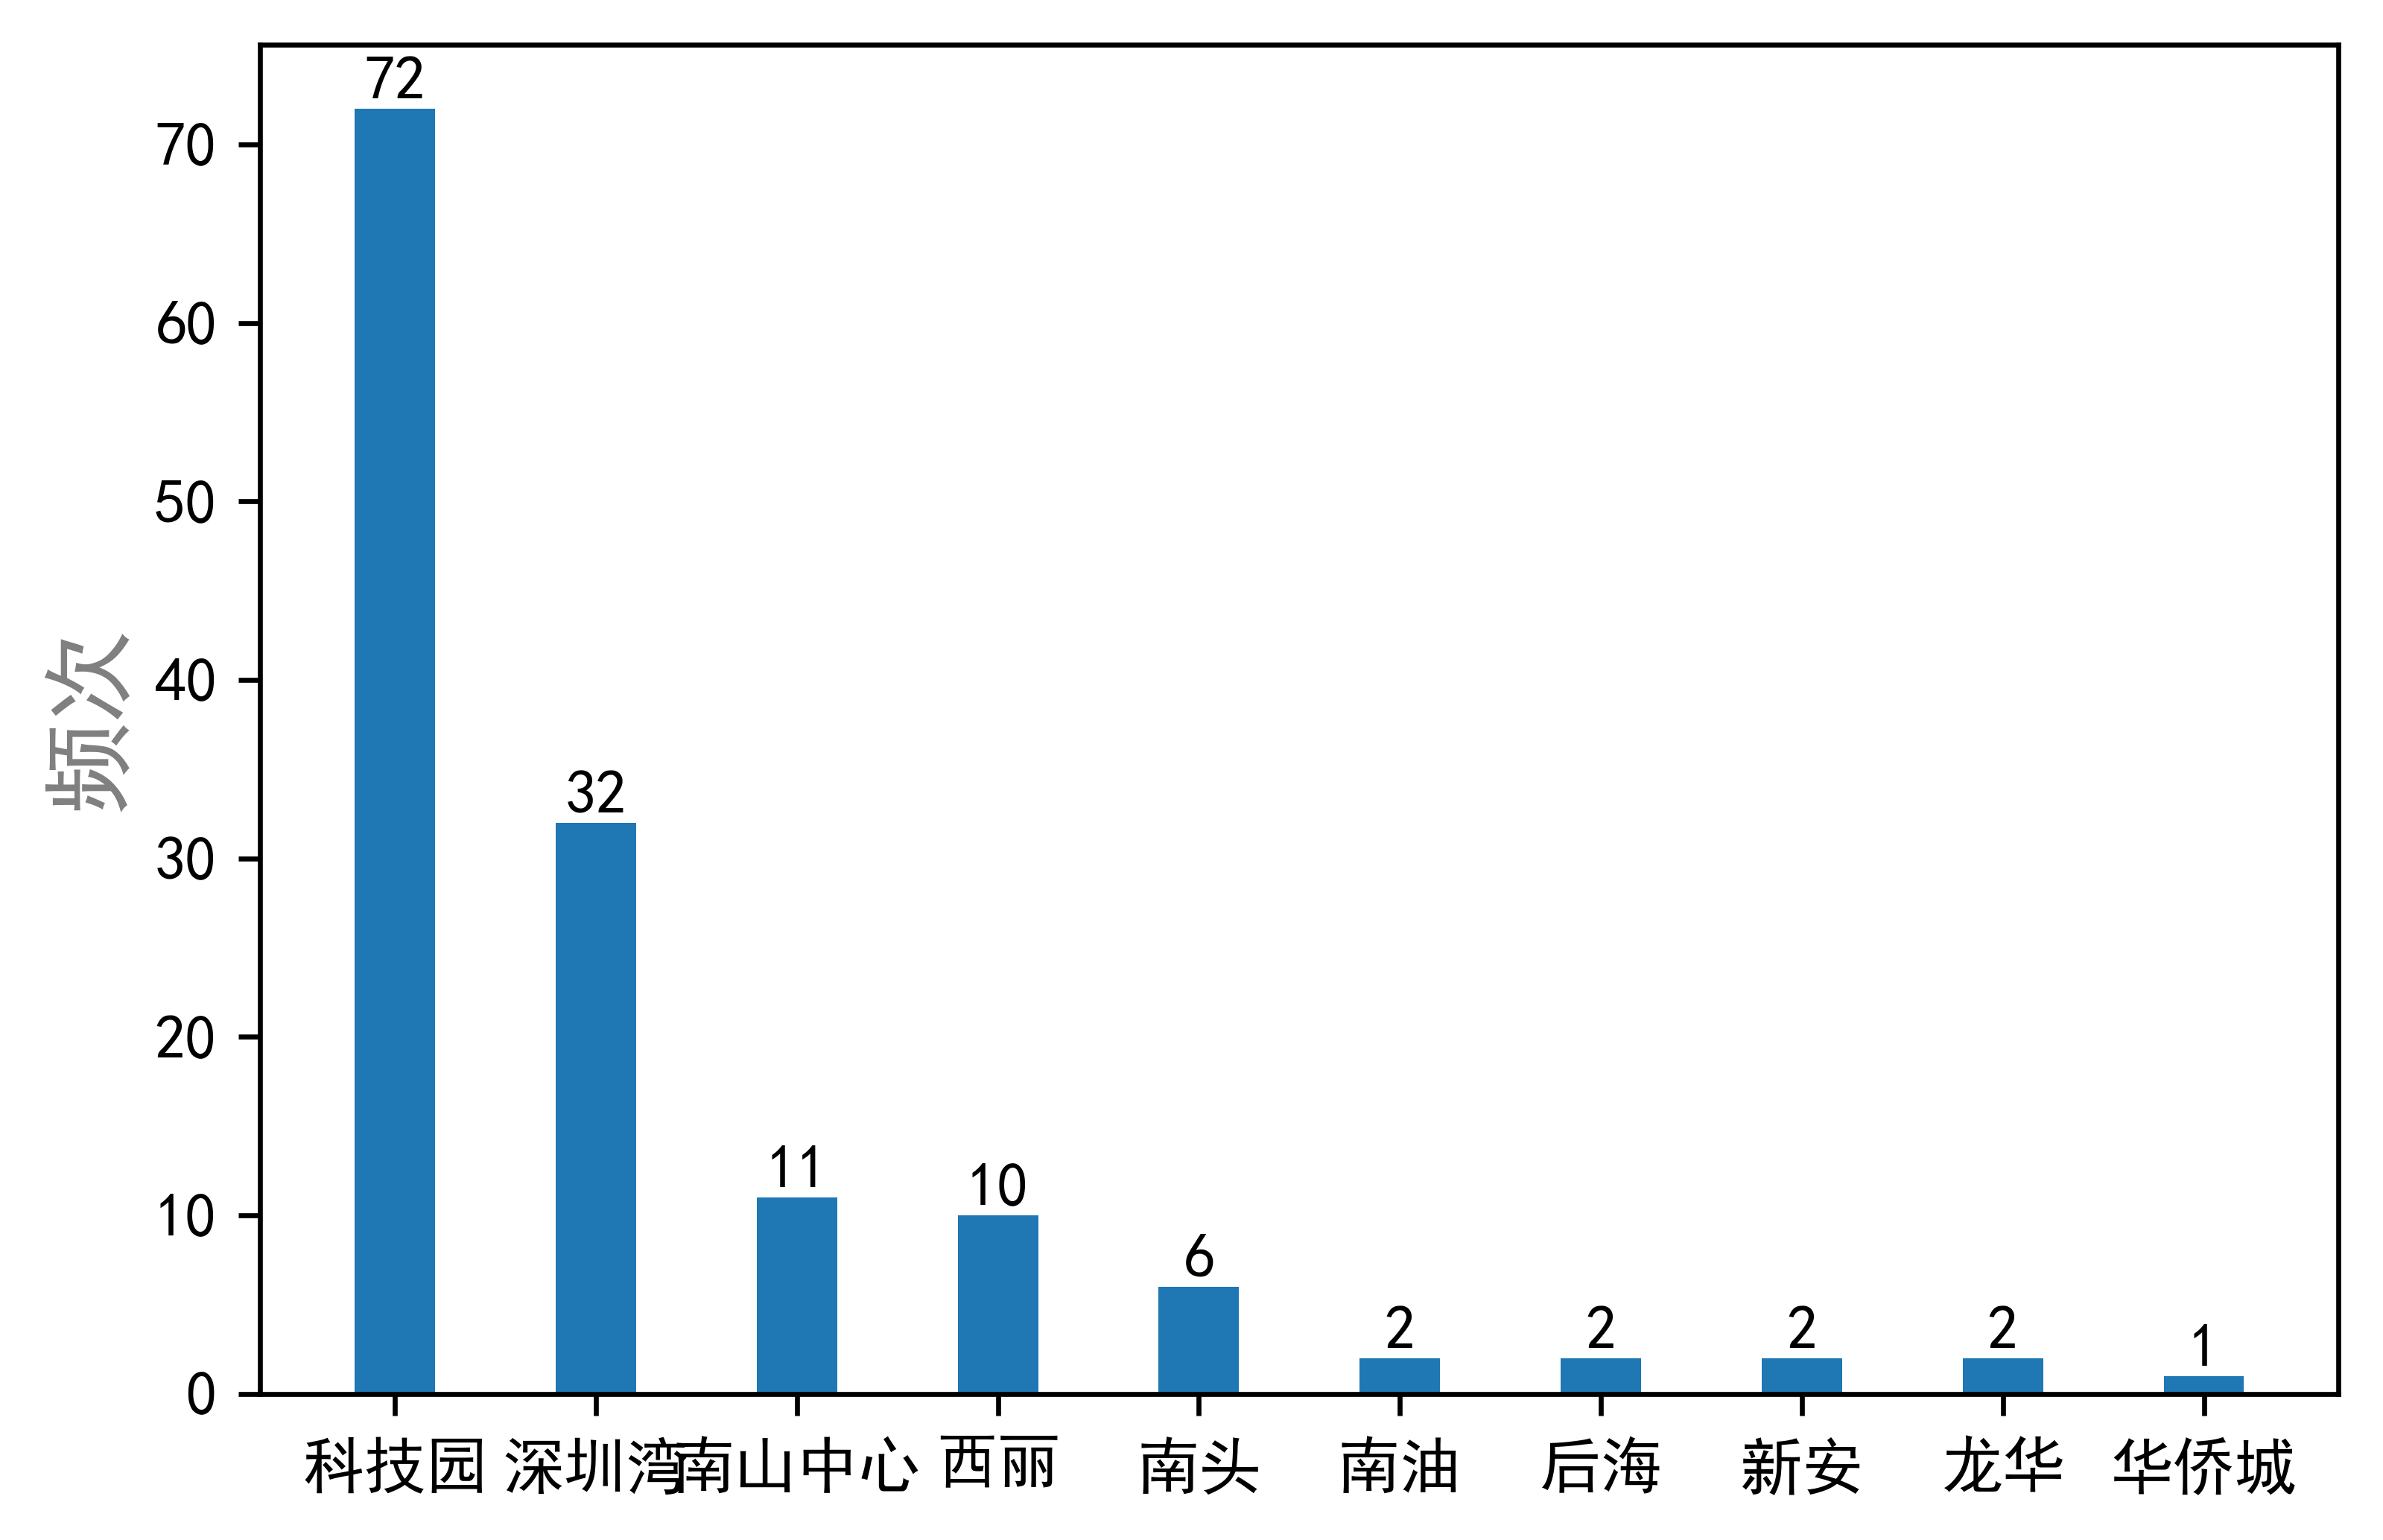

In [188]:
plt.figure(dpi=600)
x4=list(a['具体工作地点'].value_counts().index)
y4=list(a['具体工作地点'].value_counts().values)
print(a['具体工作地点'].value_counts())
font2 = {
'weight' : 'normal',
'color':'#808080',
'size'   : 15}
plt.ylabel('频次',font2)
plt.bar(x4,y4,width=0.4)
for x4,y4 in zip(x4,y4):
    plt.text(x4,y4+0.1,y4, ha='center',va='bottom')
plt.savefig(r"D:\githubProject\bosszhipin\data\南山区具体工作地点分布图.png")

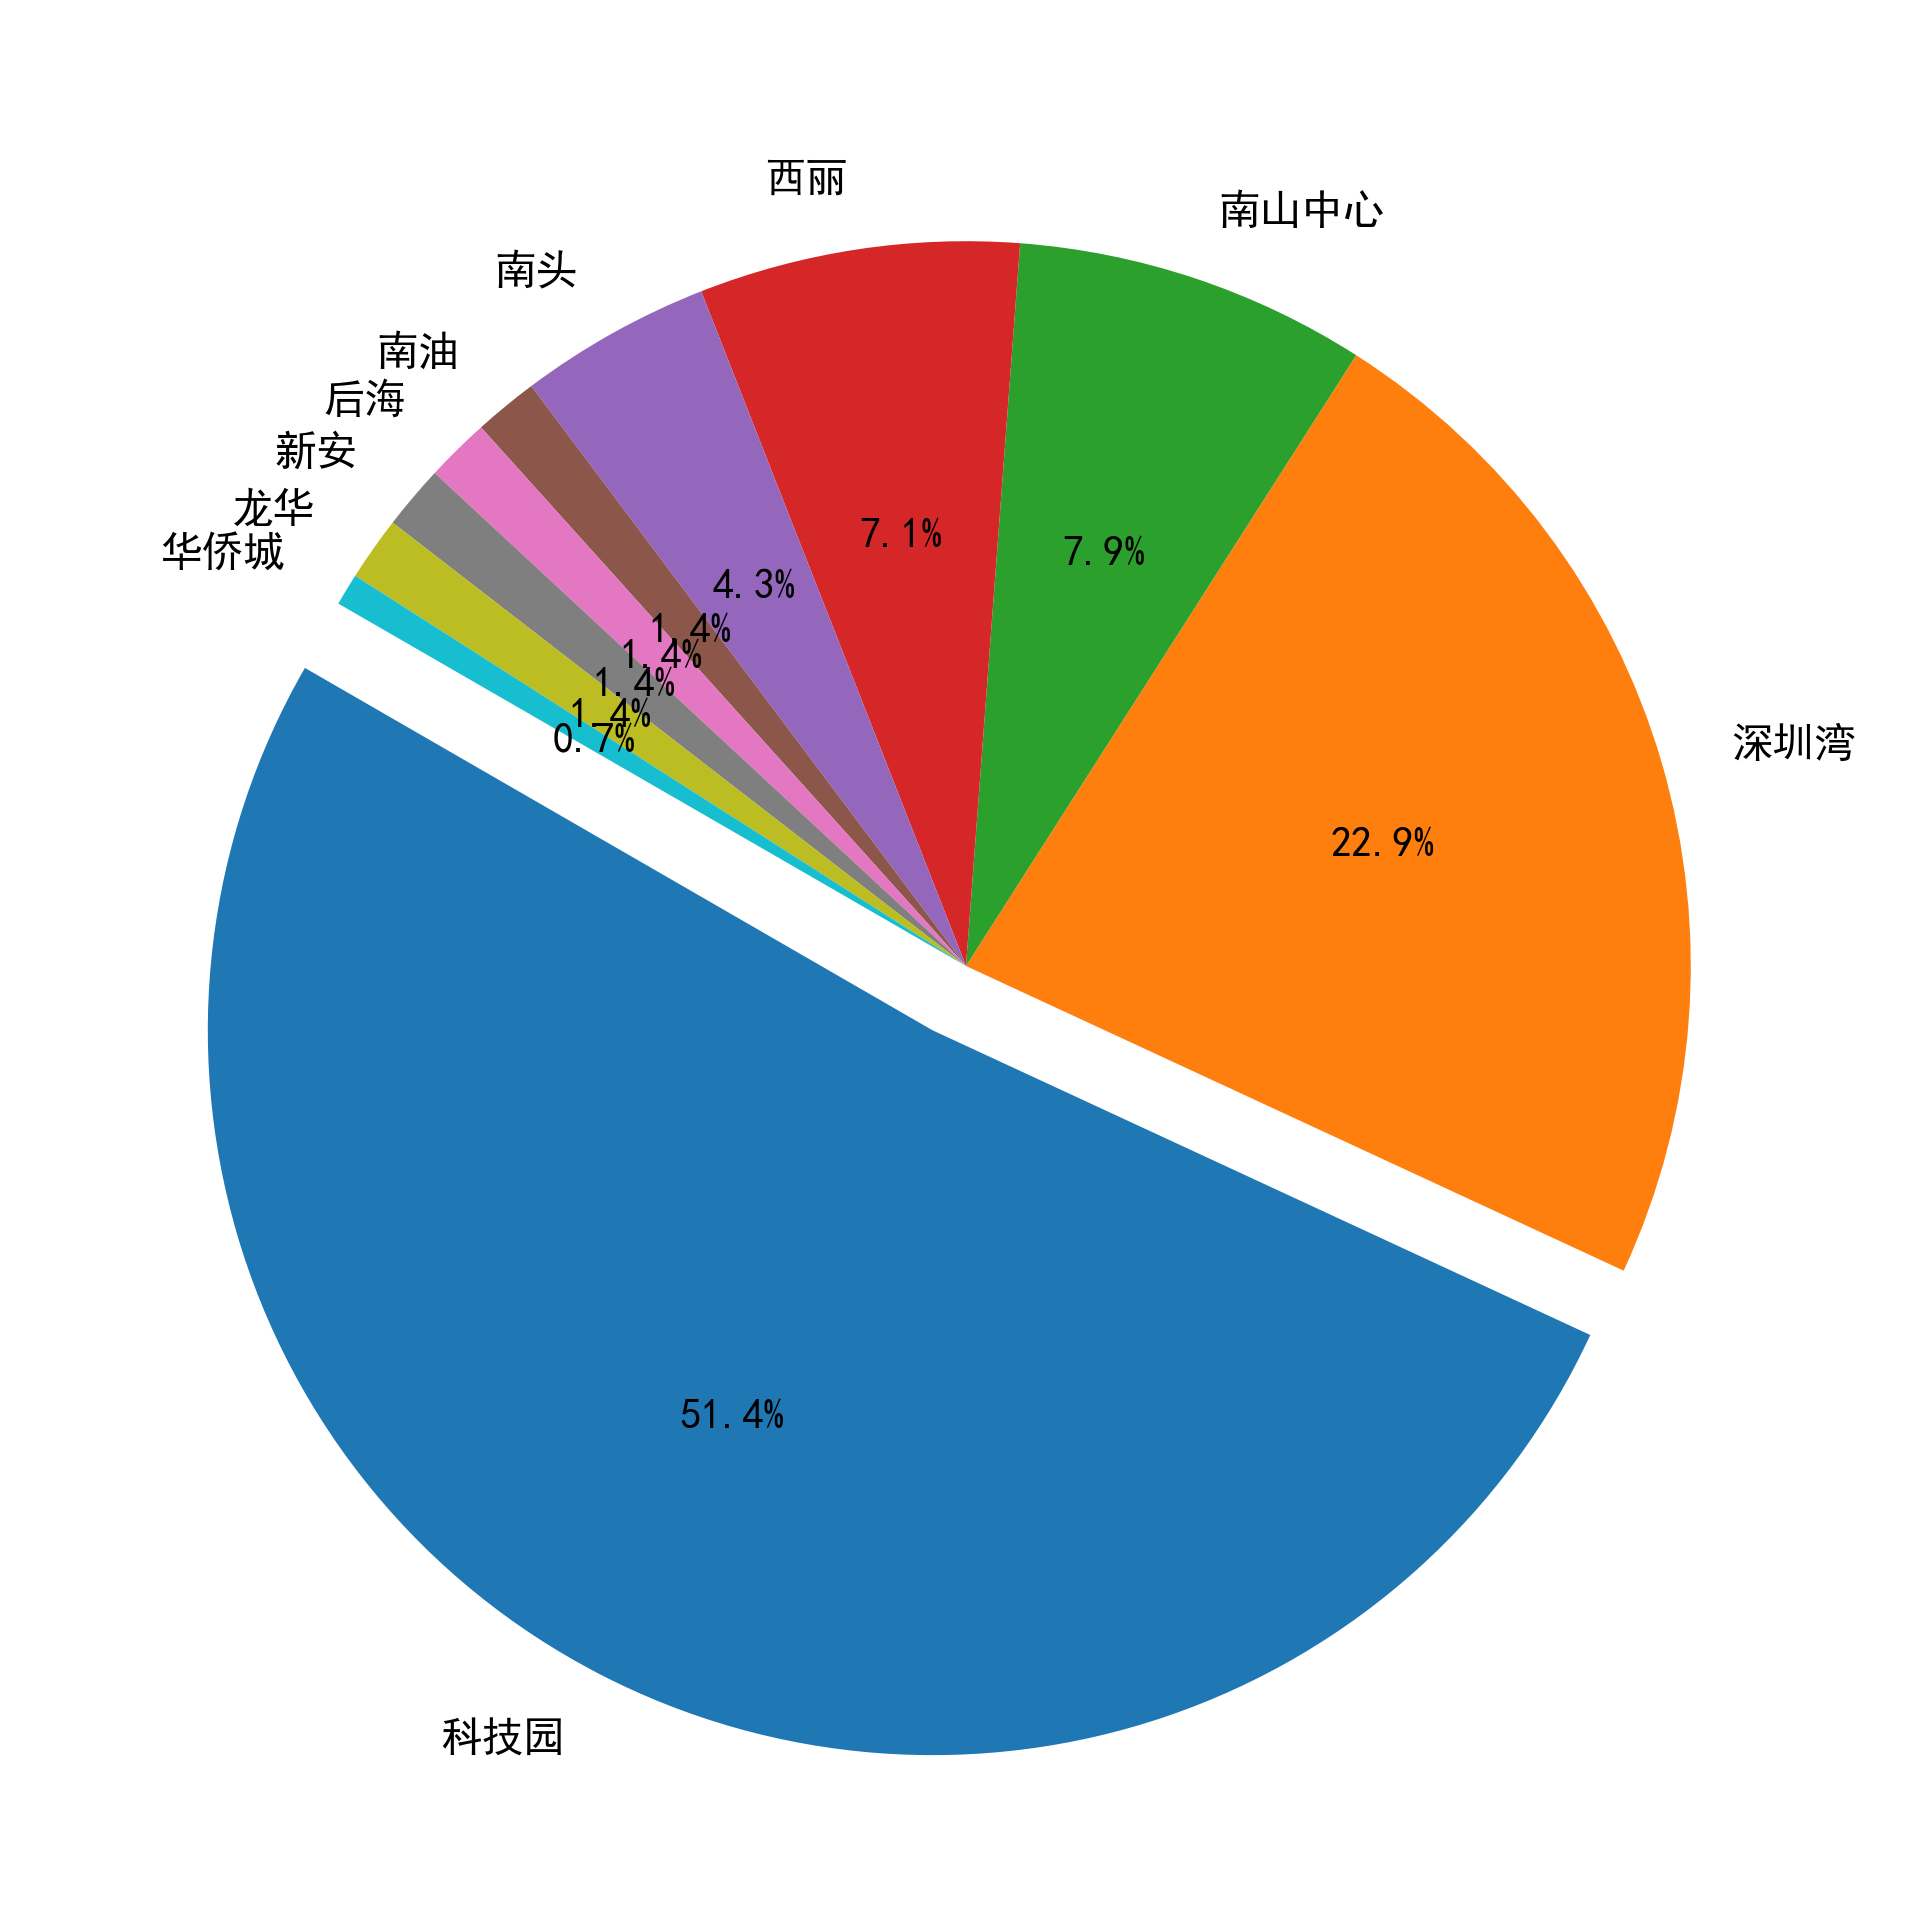

In [185]:
plt.close()

plt.figure(dpi=600)
x4=list(a['具体工作地点'].value_counts().index)
y4=list(a['具体工作地点'].value_counts().values)
font2 = {
'weight' : 'normal',
'size'   : 5}
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(y4,explode=explode,labels=x4,autopct='%1.1f%%',shadow=False,startangle=150,textprops=font2)
plt.savefig(r"D:\githubProject\bosszhipin\data\具体工作地点占比图-饼图.png")

薪资水平        薪资上限        薪资下限
count  299.000000  299.000000  299.000000
mean    19.319398   24.608696   14.030100
std     11.087623   14.483874    7.948392
min      4.000000    5.000000    2.000000
25%     10.500000   13.000000    8.000000
50%     17.500000   20.000000   14.000000
75%     26.500000   30.000000   20.000000
max     60.000000   70.000000   50.000000

In [304]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
具体工作地点    287 non-null object
工作区域      287 non-null object
公司名称      300 non-null object
融资情况      291 non-null object
公司规模      300 non-null object
所属行业      291 non-null object
岗位名称      300 non-null object
经验年限      299 non-null object
学历要求      298 non-null object
薪资水平      299 non-null float64
薪资上限      299 non-null float64
薪资下限      299 non-null float64
工作地点      299 non-null object
薪资分层      299 non-null category
dtypes: category(1), float64(3), object(10)
memory usage: 31.2+ KB


In [195]:
data = pd.read_csv(r"D:\githubProject\bosszhipin\save_page_3.csv")
data['岗位职责']=data['岗位职责'].map(str.strip)
a = list(data['岗位职责'])
content = "".join(a)
print(content[0:1000],type(content[:]),type(content))


技能要求：Word，Excel，数据报表1. 依据收集范围定期进行各类数据资料的收集，并进行统计、整理；2. 根据数据分析汇总情况制作相应的数据分析报表；3. 根据平台不同时期规划，对现有数据进行更新优化；4. 临时数据分析需求的调研、分析及实现。任职资格1.大专以上，统计学等相关专业优先考虑；2.对数据敏感，逻辑思维能力较强；3.优秀的数据分析能力；精通excel、ppt，能独立完成数据统计以及ppt分析报告。社会保险：五险入职即购买，公积金转正后购买；餐费补贴：每天餐费补贴；带薪休假：员工依法享有带薪年假、带薪假期；员工生日：精美的生日礼物+浓浓情谊的贺卡祝福；团建活动：下午茶（有吃不完的零食，各种提神功能的饮料任你来撸）、各种文娱活动：如趣味运动会、聚餐、K歌、登山、野炊、拓展和旅游等；传统节日：三八女神节、端午、中秋、冬至、元宵等传统节日，公司会对应有专属的惊喜礼物:可口的粽子、遥寄家乡浓情的月饼和贺卡、美味热气腾腾的饺子和汤圆。1、本科及以上学历，计算机、数学、统计学及相关专业；2、两年以上数据分析相关工作经验，有互联网行业数据分析经验者优先；3、熟练掌握SQL，PL/SQL，数量使用Excel，PowerPoint等工具；会帆软和tableau4、工作细致、责任心强，具备较强的学习能力及理解能力；腾讯数据分析师【外包岗】岗位要求：1.能熟练使用数据分析软件（R/PYTHON等其中之一）进行数据的清洗、重塑、分析等，了解常用的数据挖掘方法及模型，有KPI核算方面的经验；2.能熟练使用excel，如常用函数、数据透视表、切片器、Power Pivot、power query等；3.熟悉SQL查询语句；4.业务理解能力强，学习能力强，能快速适应环境；5.具有数理统计、经济学、数据库原理以及相关知识、统计、数学、计算机、财务等相关专业，大学本科及以上学历优先；6.2年以上数据分析工作经验。岗位职责：1）通过数据驱动业务为目标，为管理层和业务层提供决策支持；2）根据业务部门的客户上线情况、消耗完成等数据指标进行整合汇总、综合分析，建立相应数据分析报表，按时向上司汇报，提供准确的分析报告；3）参与业务部门临时数据分析需求的调研、分析，及时发现业务开展过程中出现的问题，为业务发展提供改进建议及决策支持；4）熟悉公司运作，对各部门的数据统计分析工作给予支持配合，协调开展